# 따릉이 과제3(피드백 반영해 다시 EDA & 1차 전처리)

- 1주차, 2주차에서 EDA와 1차 전처리를 진행했음.
- 피드백을 반영해, 이번 주차에서는 이전 과제에서 부족했던 부분을 보완하는 과정을 먼저 진행한 후, 2차 전처리와 모델링을 진행 할 예정임.

전에 진행했던 1차 전처리에서 계절 결측치는 해당하는 월에 넣어서 처리했고, 기온은 계절 별 평균 기온으로 대체, 풍속은 모델을 구축하고 예측하는 방법을 통해 결측치를 매꿨다.

그러나 피드백을 반영해, 계절 결측치는 잘못된 부분만 수정한 후 방식은 그대로 진행했고, 기온과 풍속 결측치를 채우는 작업은 방법을 바꿔서 다시 할 예정이다.

## 1. 모든 변수 EDA 진행

**변수 설명**

- Date : 날짜(년,월,일)
- Rented Bike Count : 자전거 대여량
- Hour : 대여한 시각(0시는 24시)
- Temperature(°C) : 기온
- Humidity(%) : 상대습도
- Wind speed (m/s) : 풍속
- Visibility (10m) : 가시거리
- Dew point temperature(°C) : 이슬점
- Solar Radiation (MJ/m2) : 일사량
- Rainfall(mm) : 강우량
- Snowfall (cm) : 강설량
- Seasons : 계절
- Holiday : 공휴일
- Functioning Day : 운영일

라이브러리 설치 및 환경 설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

In [2]:
import koreanize_matplotlib

In [3]:
# 결측치 확인하는 라이브러리
import missingno as msno

import seaborn.objects as so

# Warning 메세지를 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

In [4]:
#기본 라이브러리 설치
import os

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [7]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ------------------- -------------------- 0.9/1.8 MB 28.7 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 23.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.1
    Uninstalling pip-24.1.1:
      Successfully uninstalled pip-24.1.1
Note: you may need to restart the kernel to use updated packages.


데이터 불러오기

In [79]:
file_path='C:/Users/조현서/Desktop/train.csv'
data=pd.read_csv(file_path,encoding='euc-kr')
df=data.copy()
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     24/10/2018               1492    16              NaN           42   
1     01/05/2018               1536    14             23.0           64   
2     14/11/2018                327     2              6.2           59   
3     31/08/2018                170     4             23.2           83   
4     26/06/2018                 45     5             23.7           64   
...          ...                ...   ...              ...          ...   
7003  08/02/2018                255     7             -9.6           67   
7004  28/03/2018                104     4             10.6           77   
7005  30/04/2018                569     0             14.7           54   
7006  29/05/2018               2234     8             20.5           66   
7007  20/09/2018               1290    17             19.3           76   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  1.3              1976                        5.0   
1                  2.8               520                       15.8   
2                  0.6              1584                       -1.2   
3                  1.6              1102                       20.1   
4                  0.9               876                       16.4   
...                ...               ...                        ...   
7003               1.0              1503                      -14.5   
7004               0.9               422                        6.7   
7005               1.3               718                        5.4   
7006               1.7              1062                       13.9   
7007               2.1              2000                       14.9   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                        1.22           0.0            0.0     NaN   
1                        1.59           0.0            0.0  Spring   
2                        0.00           0.0            0.0  Autumn   
3                        0.00           0.0            0.0  Summer   
4                        0.00           0.1            0.0  Summer   
...                       ...           ...            ...     ...   
7003                     0.00           0.0            0.0  Winter   
7004                     0.00           0.0            0.0  Spring   
7005                     0.00           0.0            0.0  Spring   
7006                     0.34           0.0            0.0  Spring   
7007                     0.21           0.0            0.0     NaN   

         Holiday Functioning Day  
0     No Holiday             Yes  
1        Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
7003  No Holiday             Yes  
7004  No Holiday             Yes  
7005  No Holiday             Yes  
7006  No Holiday             Yes  
7007  No Holiday             Yes  

[7008 rows x 14 columns]

In [97]:
df.info()
df.describe()
df.isna().sum(axis=0).sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7008 non-null   object 
 1   Rented Bike Count          7008 non-null   int64  
 2   Hour                       7008 non-null   int64  
 3   Temperature(°C)            6306 non-null   float64
 4   Humidity(%)                7008 non-null   int64  
 5   Wind speed (m/s)           6303 non-null   float64
 6   Visibility (10m)           7008 non-null   int64  
 7   Dew point temperature(°C)  7008 non-null   float64
 8   Solar Radiation (MJ/m2)    7008 non-null   float64
 9   Rainfall(mm)               7008 non-null   float64
 10  Snowfall (cm)              7008 non-null   float64
 11  Seasons                    6309 non-null   object 
 12  Holiday                    7008 non-null   object 
 13  Functioning Day            7008 non-null   objec

Date                           0
Rented Bike Count              0
Hour                           0
Humidity(%)                    0
Dew point temperature(°C)      0
Visibility (10m)               0
Rainfall(mm)                   0
Solar Radiation (MJ/m2)        0
Functioning Day                0
Holiday                        0
Snowfall (cm)                  0
Seasons                      699
Temperature(°C)              702
Wind speed (m/s)             705
dtype: int64

위를 통해, 각 변수의 타입과, 데이터 차원, 결측치 개수(Seasons, Temperature(°C), Wind speed (m/s)변수들만 결측치 존재)와 기술통계량을 확인함.

### 1 - (1) Date 변수 EDA 및 전처리
- 2017년 12월 1일 부터 2018년 11월 30일까지 측정된 데이터
- 2018년의 자전거 대여량의 평균값이 2017년보다 3배 가량 많음
- 그러나, 2018년도에 집계된 데이터 양 자체가 2017년보다 11배 가량 많음

In [100]:
df['Date'].value_counts()

Date
14/02/2018    24
23/04/2018    23
20/01/2018    23
08/07/2018    23
09/01/2018    23
              ..
23/10/2018    15
13/01/2018    14
19/05/2018    14
11/03/2018    13
04/05/2018    12
Name: count, Length: 365, dtype: int64

날짜 변수의 형식을 우선 분석에 적합하도록 'pandas'의 'datetime' 형식으로 변환한다.

In [80]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

print(df)

           Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2018-10-24               1492    16              NaN           42   
1    2018-05-01               1536    14             23.0           64   
2    2018-11-14                327     2              6.2           59   
3    2018-08-31                170     4             23.2           83   
4    2018-06-26                 45     5             23.7           64   
...         ...                ...   ...              ...          ...   
7003 2018-02-08                255     7             -9.6           67   
7004 2018-03-28                104     4             10.6           77   
7005 2018-04-30                569     0             14.7           54   
7006 2018-05-29               2234     8             20.5           66   
7007 2018-09-20               1290    17             19.3           76   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  1.3              1976

In [109]:
start_date = df['Date'].min()
end_date = df['Date'].max()

print(f"측정 범위: {start_date}부터 {end_date}까지")

측정 범위: 2017-12-01 00:00:00부터 2018-11-30 00:00:00까지


이를 통해, Date변수는 2017년 12월 1일 부터 2018년 11월 30일까지 측정된 데이터임을 알 수 있다.

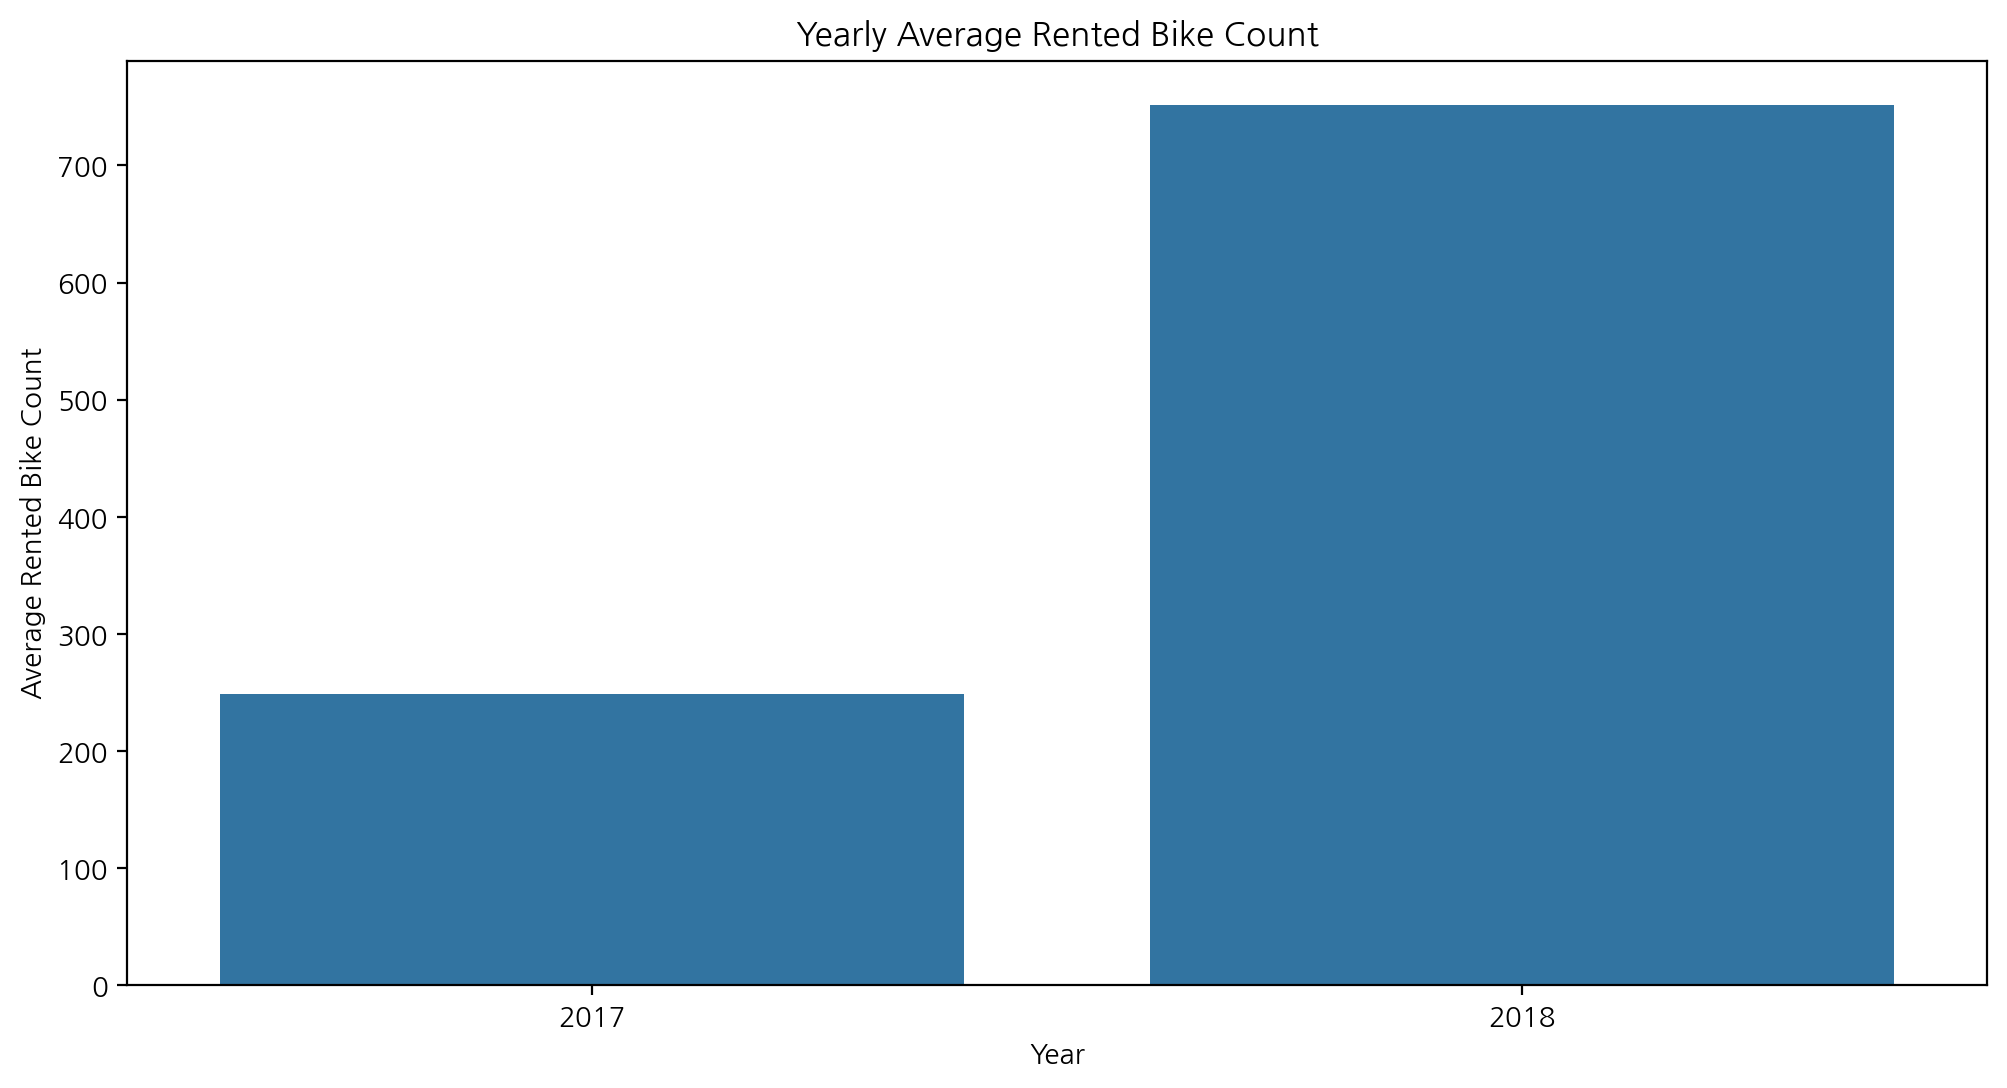

In [122]:
#년도별 평균 계산
yearly_mean = df.groupby(df['Date'].dt.year)['Rented Bike Count'].mean().reset_index()
yearly_mean.columns = ['Year', 'Rented Bike Count']

# 년도별 평균 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Rented Bike Count', data=yearly_mean)
plt.title('Yearly Average Rented Bike Count')
plt.xlabel('Year')
plt.ylabel('Average Rented Bike Count')
plt.show()

In [123]:
df.groupby(df['Date'].dt.year)['Rented Bike Count'].mean().reset_index()

Date  Rented Bike Count
0  2017         248.883838
1  2018         751.171656

년도별 자전거 대여량의 평균값을 확인해본 결과, 2017년에 비해 2018년은 그 값이 3배가량 많음.

그냥 2018년도의 데이터 양 자체가 많은 건 아닐까 하는 생각에, 각각의 데이터 개수를 추출해봄.

In [127]:
df.groupby(df['Date'].dt.year).size().reset_index(name='Count')

Date  Count
0  2017    594
1  2018   6414

그 결과, 2018년도에 집계된 데이터 양 자체가 많다는 사실을 확인함.

이제, 월별 계절을 살펴보겠다.

In [11]:
df[df['Date'].dt.month.between(3, 5)]

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
1    2018-05-01               1536    14             23.0           64   
10   2018-03-21                374    10              3.6           37   
11   2018-05-24               1390     7              NaN           61   
13   2018-04-16               2692    18             17.0           28   
15   2018-04-01                169     7             12.5           62   
...         ...                ...   ...              ...          ...   
6996 2018-05-08               1135    12             21.5           44   
7001 2018-04-15                223     7              5.8           83   
7004 2018-03-28                104     4             10.6           77   
7005 2018-04-30                569     0             14.7           54   
7006 2018-05-29               2234     8             20.5           66   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
1                  2.8               520                       15.8   
10                 NaN              2000                       -9.7   
11                 1.3              1818                        5.1   
13                 3.1              2000                       -1.6   
15                 0.4              1003                        5.4   
...                ...               ...                        ...   
6996               2.1              1986                        8.7   
7001               1.1               733                        3.1   
7004               0.9               422                        6.7   
7005               1.3               718                        5.4   
7006               1.7              1062                       13.9   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
1                        1.59           0.0            0.0  Spring   
10                       0.83           0.0            0.0  Spring   
11                       0.42           0.0            0.0  Spring   
13                       0.88           0.0            0.0  Spring   
15                       0.00           0.0            0.0  Spring   
...                       ...           ...            ...     ...   
6996                     3.15           0.0            0.0  Spring   
7001                     0.15           0.0            0.0  Spring   
7004                     0.00           0.0            0.0  Spring   
7005                     0.00           0.0            0.0  Spring   
7006                     0.34           0.0            0.0  Spring   

         Holiday Functioning Day  
1        Holiday             Yes  
10    No Holiday             Yes  
11    No Holiday             Yes  
13    No Holiday             Yes  
15    No Holiday             Yes  
...          ...             ...  
6996  No Holiday             Yes  
7001  No Holiday             Yes  
7004  No Holiday             Yes  
7005  No Holiday             Yes  
7006  No Holiday             Yes  

[1727 rows x 14 columns]

In [12]:
df[df['Date'].dt.month.between(6, 8)]

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
3    2018-08-31                170     4             23.2           83   
4    2018-06-26                 45     5             23.7           64   
5    2018-08-12               1127    22             28.8           79   
6    2018-07-04                941    11              NaN           60   
14   2018-07-28                248     5             28.1           84   
...         ...                ...   ...              ...          ...   
6973 2018-06-22               2103    22             23.3           32   
6988 2018-06-13               2088    14             26.6           50   
6992 2018-06-27               1084     7             19.3           98   
6998 2018-07-29                644    12             33.8           47   
7000 2018-07-01                 15    23             21.5           97   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
3                  1.6              1102                       20.1   
4                  0.9               876                       16.4   
5                  0.2              1604                       24.7   
6                  2.3              1861                       21.3   
14                 0.5               754                       25.1   
...                ...               ...                        ...   
6973               1.1              2000                        5.6   
6988               2.4              1119                       15.3   
6992               1.0               188                       18.9   
6998               NaN              1962                       20.9   
7000               1.5               523                       20.9   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
3                        0.00           0.0            0.0  Summer   
4                        0.00           0.1            0.0  Summer   
5                        0.00           0.0            0.0  Summer   
6                        2.61           0.0            0.0  Summer   
14                       0.00           0.0            0.0  Summer   
...                       ...           ...            ...     ...   
6973                     0.00           0.0            0.0  Summer   
6988                     2.95           0.0            0.0     NaN   
6992                     0.06           0.0            0.0  Summer   
6998                     1.92           0.0            0.0  Summer   
7000                     0.00           5.0            0.0  Summer   

         Holiday Functioning Day  
3     No Holiday             Yes  
4     No Holiday             Yes  
5     No Holiday             Yes  
6     No Holiday             Yes  
14    No Holiday             Yes  
...          ...             ...  
6973  No Holiday             Yes  
6988  No Holiday             Yes  
6992  No Holiday             Yes  
6998  No Holiday             Yes  
7000  No Holiday             Yes  

[1771 rows x 14 columns]

In [13]:
df[df['Date'].dt.month.between(9, 11)]

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2018-10-24               1492    16              NaN           42   
2    2018-11-14                327     2              6.2           59   
7    2018-09-02                255     4             21.1           62   
8    2018-09-10                332     2             20.0           59   
9    2018-10-17               2202     8              9.2           68   
...         ...                ...   ...              ...          ...   
6985 2018-10-01               1137    14             19.3           36   
6991 2018-10-18               2154     8              8.5           77   
6997 2018-11-21                118     5              6.8           86   
6999 2018-11-15               1416    17              NaN           38   
7007 2018-09-20               1290    17             19.3           76   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  1.3              1976                        5.0   
2                  0.6              1584                       -1.2   
7                  1.8              2000                       13.5   
8                  1.5              2000                       11.7   
9                  0.2               952                        3.5   
...                ...               ...                        ...   
6985               3.5              1986                        3.8   
6991               0.5              1995                        4.6   
6997               0.5               692                        4.6   
6999               1.4               884                       -0.3   
7007               2.1              2000                       14.9   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                        1.22           0.0            0.0     NaN   
2                        0.00           0.0            0.0  Autumn   
7                        0.00           0.0            0.0  Autumn   
8                        0.00           0.0            0.0  Autumn   
9                        0.28           0.0            0.0  Autumn   
...                       ...           ...            ...     ...   
6985                     2.28           0.0            0.0  Autumn   
6991                     0.21           0.0            0.0  Autumn   
6997                     0.00           0.0            0.0  Autumn   
6999                     0.29           0.0            0.0  Autumn   
7007                     0.21           0.0            0.0     NaN   

         Holiday Functioning Day  
0     No Holiday             Yes  
2     No Holiday             Yes  
7     No Holiday             Yes  
8     No Holiday             Yes  
9     No Holiday             Yes  
...          ...             ...  
6985  No Holiday             Yes  
6991  No Holiday             Yes  
6997  No Holiday             Yes  
6999  No Holiday             Yes  
7007  No Holiday             Yes  

[1760 rows x 14 columns]

In [14]:
df[df['Date'].dt.month.isin([12,1,2])]

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
12   2018-02-25                396    12              5.5           25   
20   2018-01-19                471    19              2.0           48   
21   2018-01-04                397    17             -2.1           37   
24   2018-02-05                 33     3            -11.3           54   
31   2018-01-20                356    13              6.3           55   
...         ...                ...   ...              ...          ...   
6982 2017-12-14                278    12             -4.9           34   
6987 2018-02-14                262    20              2.8           29   
6994 2018-01-03                137     6             -6.7           48   
7002 2018-01-18                261    11              NaN           75   
7003 2018-02-08                255     7             -9.6           67   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
12                 3.1              1652                      -13.0   
20                 1.8              1519                       -7.8   
21                 1.4              1591                      -14.8   
24                 0.6              2000                      -18.7   
31                 3.0               792                       -2.0   
...                ...               ...                        ...   
6982               1.3              1768                      -18.3   
6987               2.8              1473                      -13.5   
6994               2.4              1991                      -15.9   
7002               1.8               301                       -2.1   
7003               1.0              1503                      -14.5   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
12                       2.28           0.0            0.0  Winter   
20                       0.00           0.0            0.0  Winter   
21                       0.09           0.0            0.0  Winter   
24                       0.00           0.0            0.0  Winter   
31                       0.85           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
6982                     0.60           0.0            0.0  Winter   
6987                     0.00           0.0            0.0  Winter   
6994                     0.00           0.0            0.0  Winter   
7002                     0.35           0.0            0.0  Winter   
7003                     0.00           0.0            0.0  Winter   

         Holiday Functioning Day  
12    No Holiday             Yes  
20    No Holiday             Yes  
21    No Holiday             Yes  
24    No Holiday             Yes  
31    No Holiday             Yes  
...          ...             ...  
6982  No Holiday             Yes  
6987  No Holiday             Yes  
6994  No Holiday             Yes  
7002  No Holiday             Yes  
7003  No Holiday             Yes  

[1750 rows x 14 columns]

월별 계절을 확인해본 결과, 3,4,5월은 Spring, 6,7,8월은 Summer, 9,10,11월은 Autumn, 12,1,2월은 Winter로 분류하고 있다는 사실을 알 수 있음. 이에 맞춰서 Seasons의 결측값들을 매꿀 수 있음.

In [81]:
# 월을 추출하여 Season을 Spring으로 지정
df.loc[df['Date'].dt.month.between(3, 5), 'Seasons'] = 'Spring'

df.loc[df['Date'].dt.month.between(6, 8), 'Seasons'] = 'Summer'

df.loc[df['Date'].dt.month.between(9, 11), 'Seasons'] = 'Autumn'

df.loc[df['Date'].dt.month.isin([12,1,2]), 'Seasons'] = 'Winter'

In [52]:
df.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)              702
Humidity(%)                    0
Wind speed (m/s)             705
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                        0
Holiday                        0
Functioning Day                0
dtype: int64

Seasons변수의 결측치가 전부 매꿔진 것을 확인할 수 있음.

### 1 - (2) Rented Bike Count변수 EDA
- Temperature(°C)변수와 유의미한 상관관계가 있을거라 예상
- 20(°C) 근방의 데이터가 자주 발생
- 자전거 대여 수는 폭염보다는 한파에 큰 영향을 받을 것이다.(대여량 감소)

<Axes: ylabel='Rented Bike Count'>

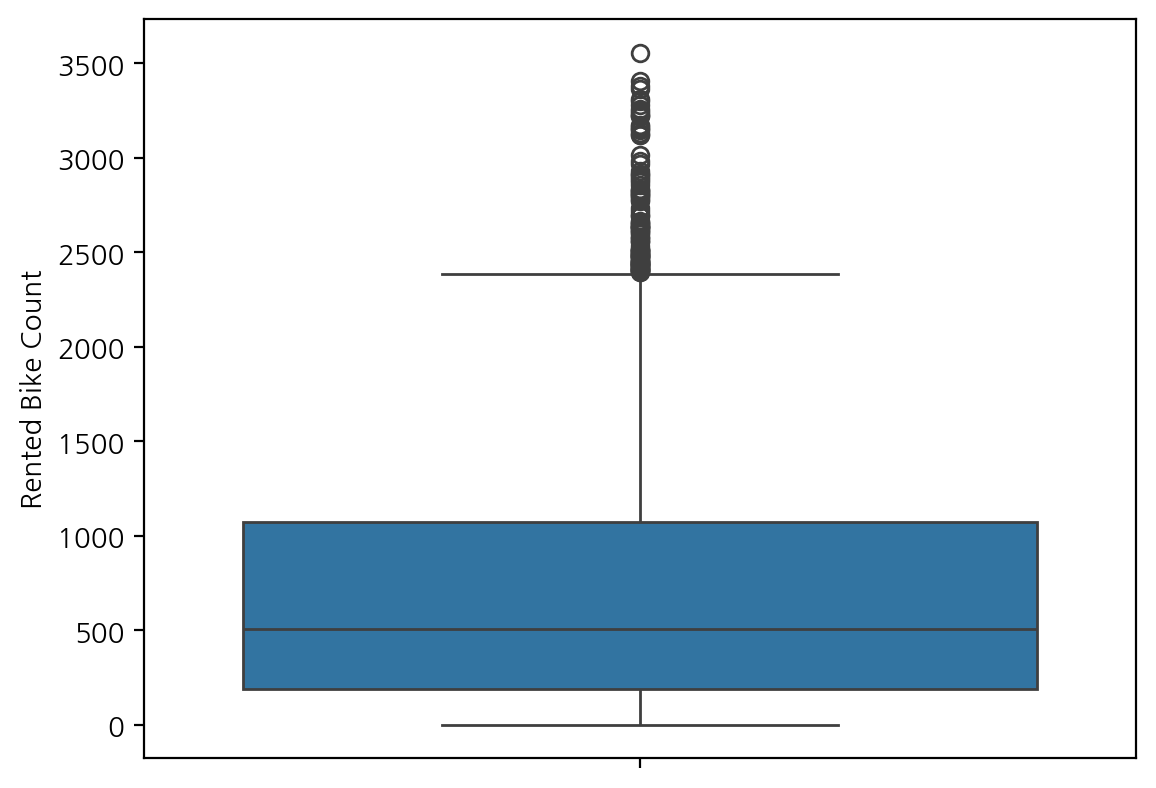

In [38]:
sns.boxplot(df['Rented Bike Count'])

이상치들 의심

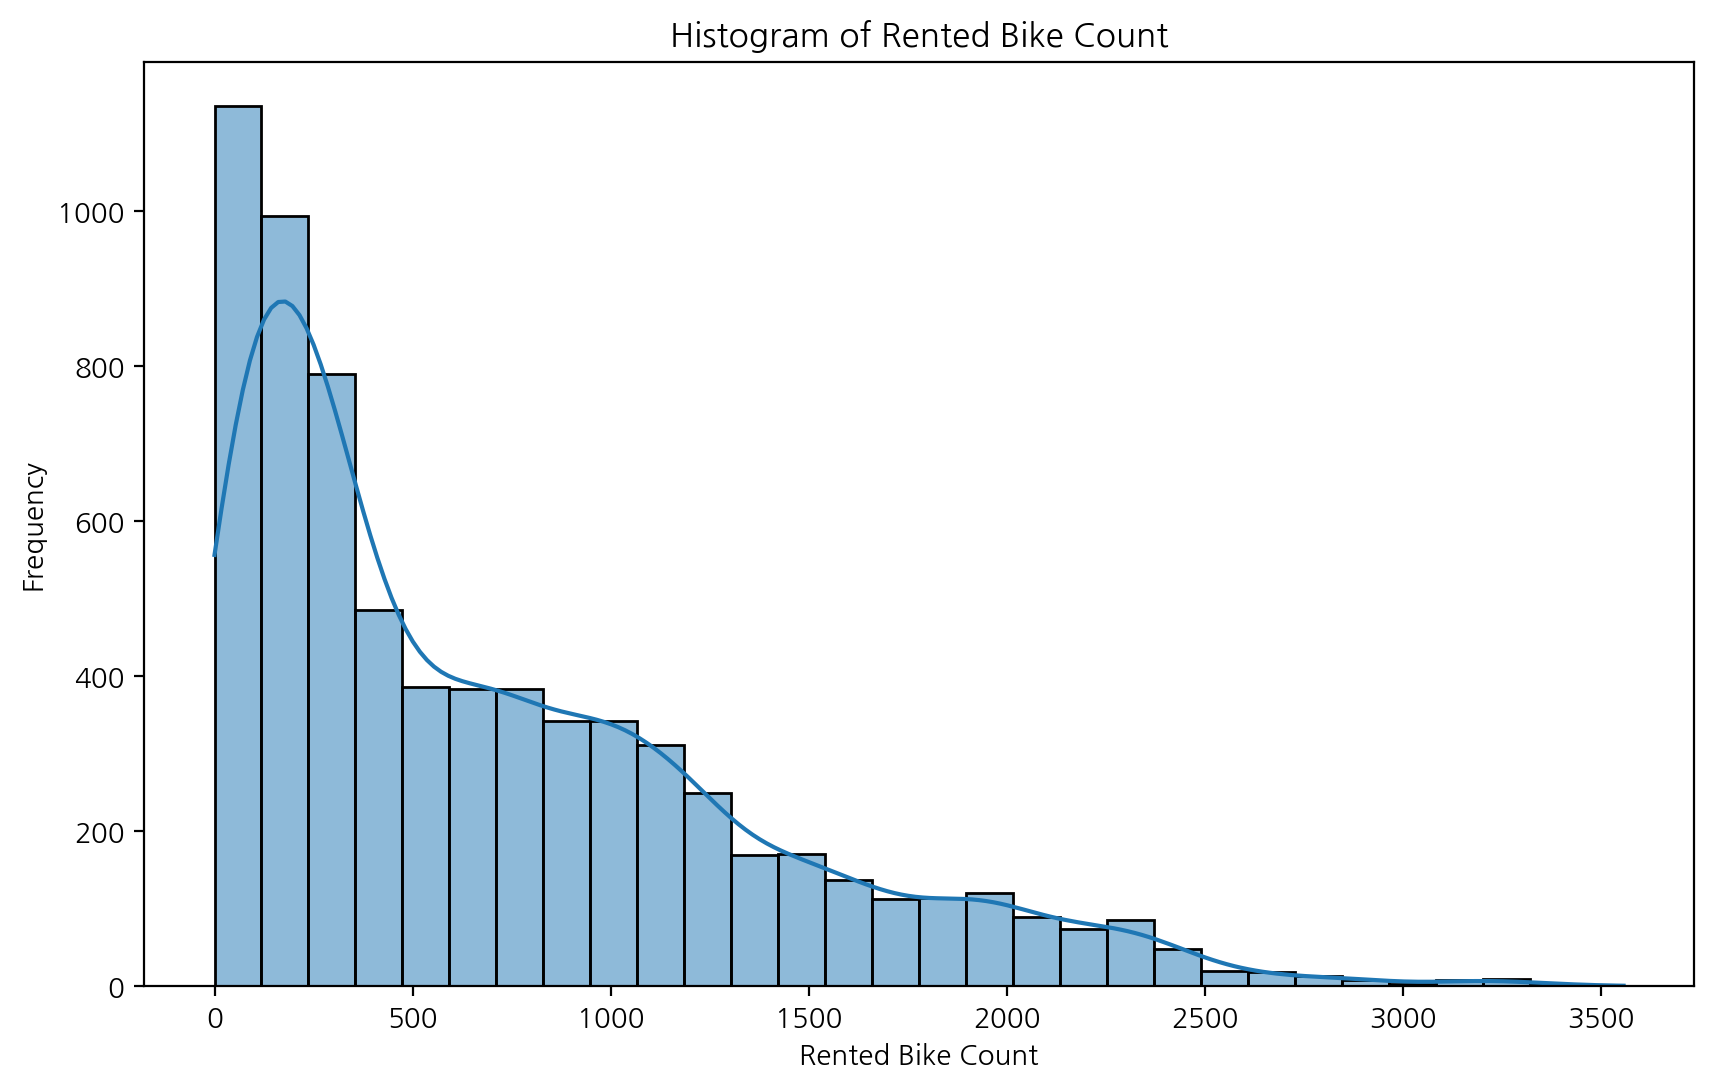

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rented Bike Count'], bins=30, kde=True)
plt.title('Histogram of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

히스토그램을 보니, 단순한 이상치로 분류하기는 힘듦. 

Text(0.5, 1.0, 'correalation heatmap')

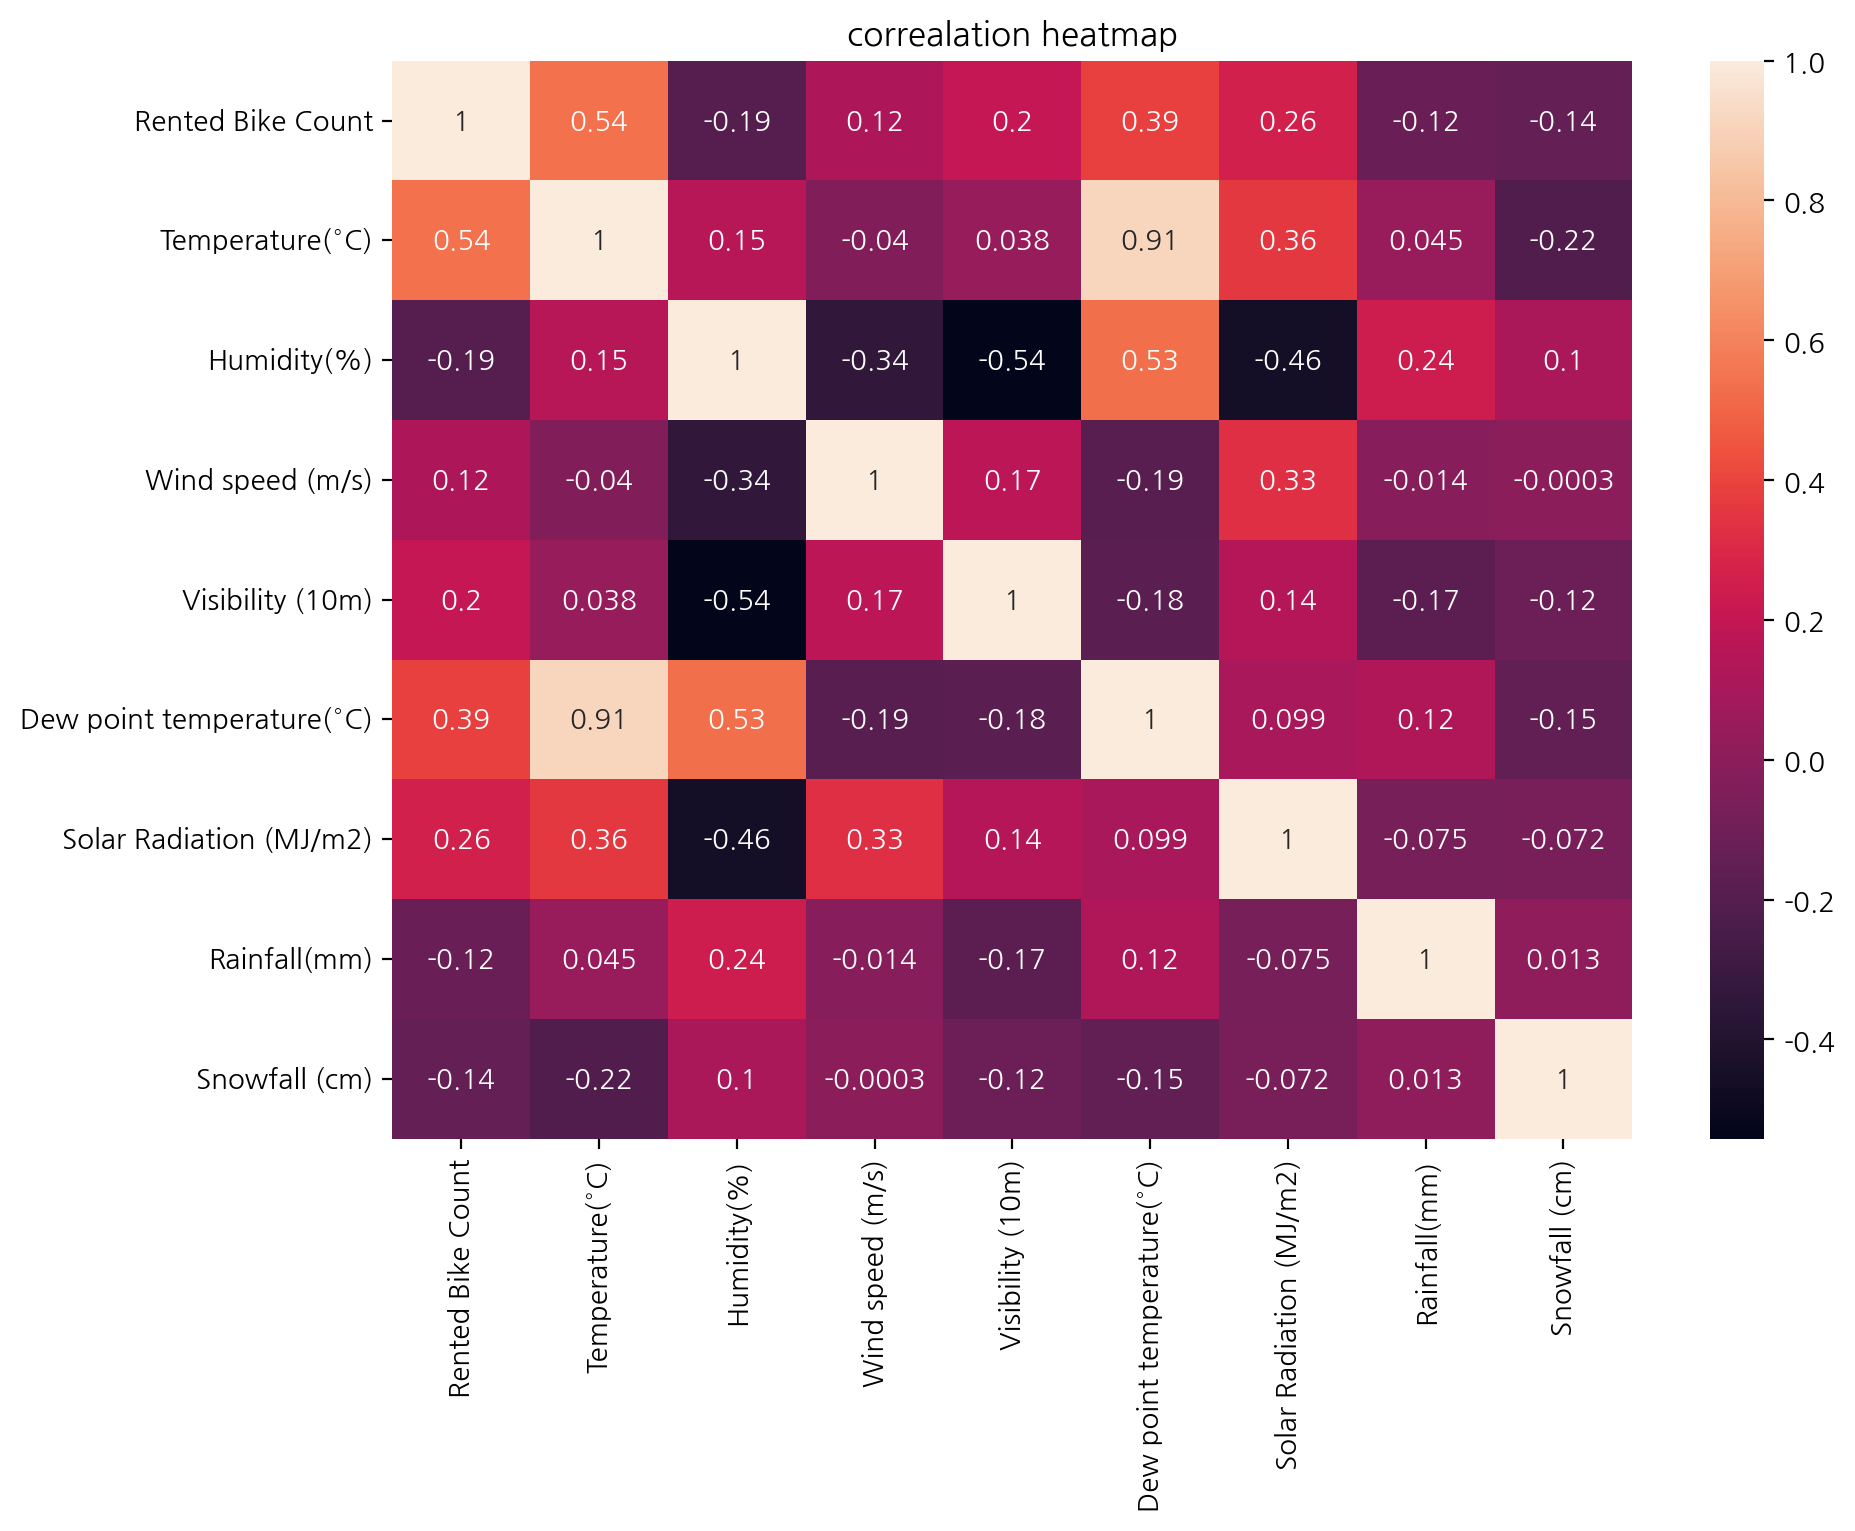

In [17]:
#상관계수 히트맵
plt.figure(figsize=(10,7))
sns.heatmap(data[['Rented Bike Count','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']].corr(),annot=True)
plt.title('correalation heatmap') #히트맵

Rented Bike Count변수와 Temperature(°C)변수가 비교적 높은 상관관계가 보임. 이를 더 탐구해본다.

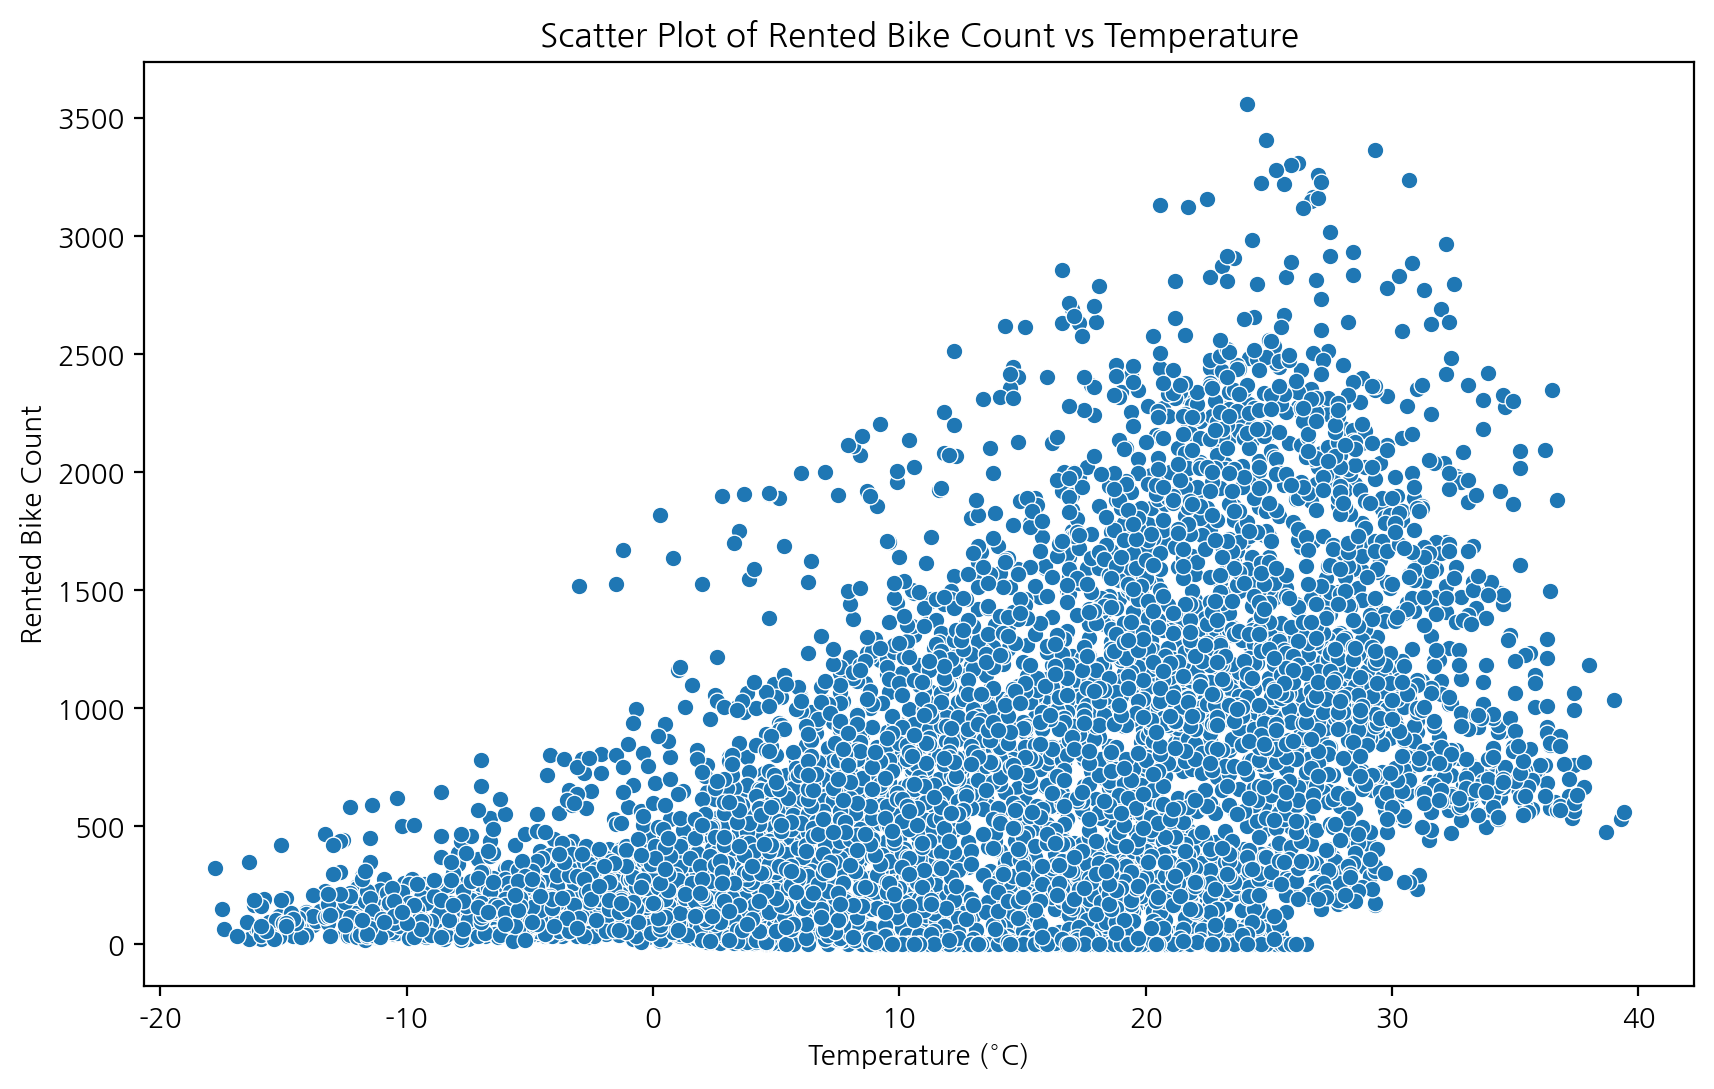

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=df)
plt.title('Scatter Plot of Rented Bike Count vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.show()

20(°C) 근방에서 자전거 대여 수가 가장 많음. 그러나, 이는 20(°C)근방에서 데이터가 가장 많이 집계됐기 때문에 나온 결과일 수 있음.

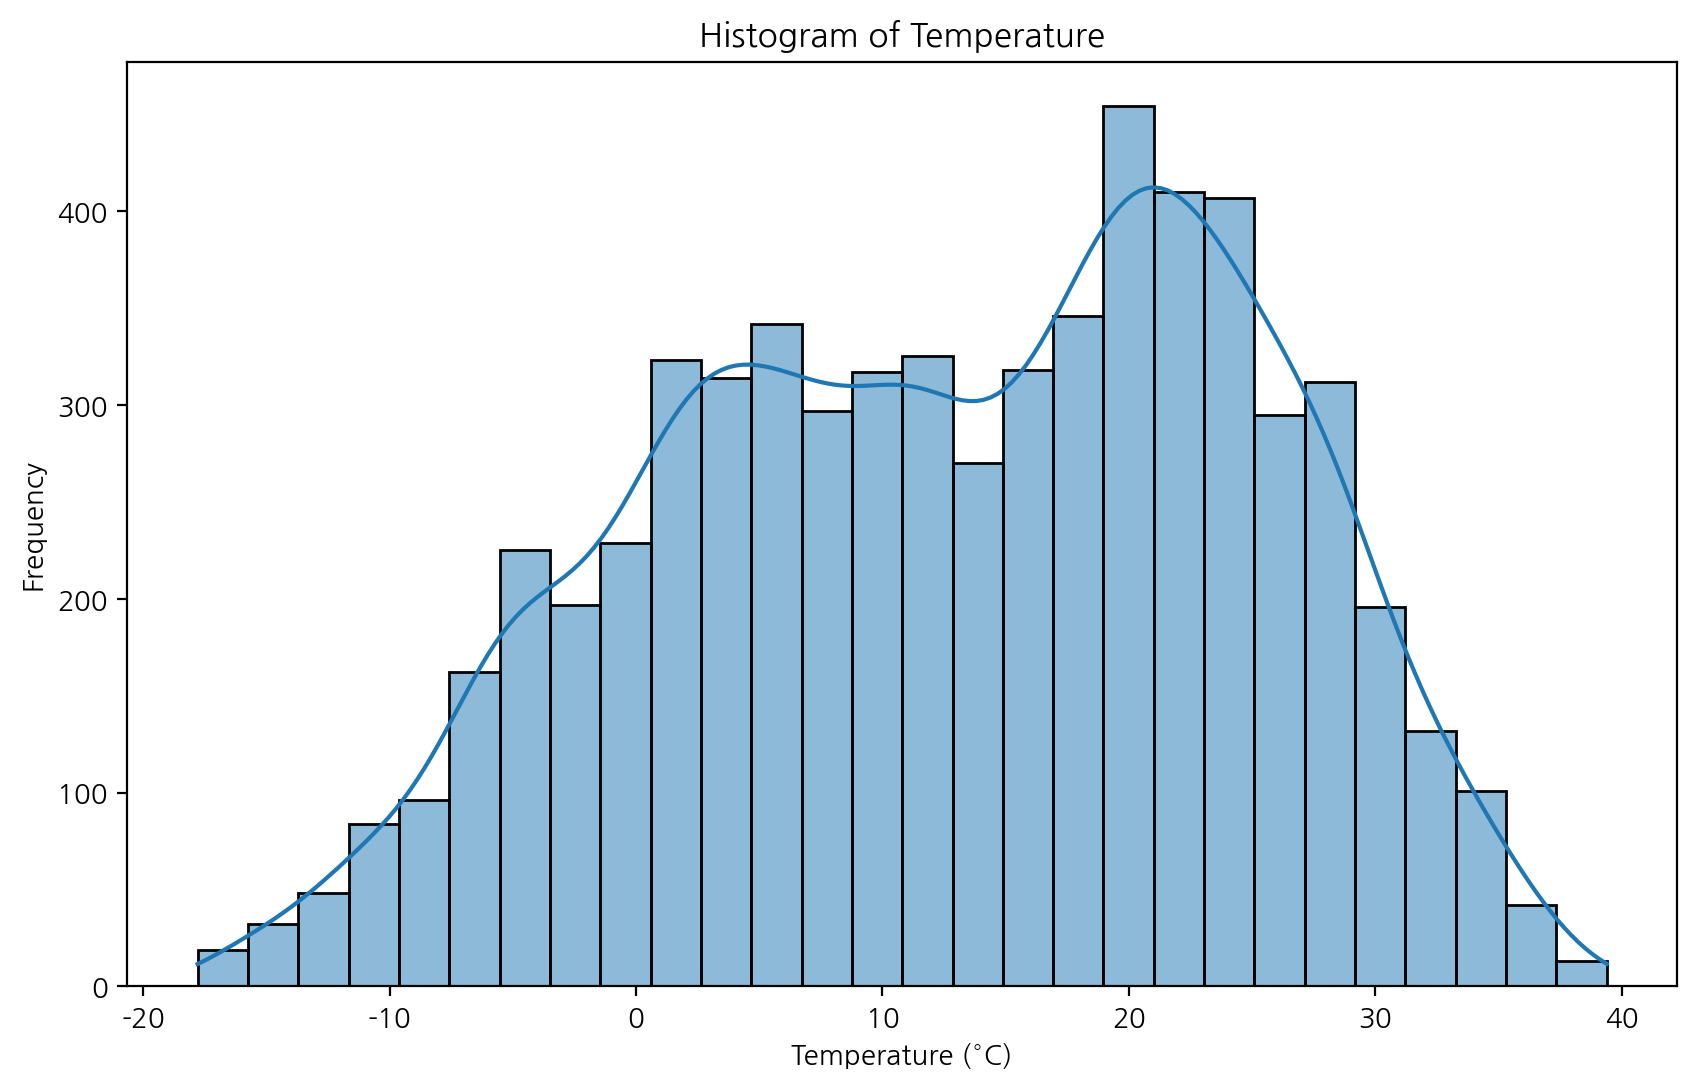

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature(°C)'], kde=True)
plt.title('Histogram of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

이를 통해, 20(°C)근방에서 데이터의 발생 빈도가 가장 높은 것을 알 수 있음. 비교적 데이터 양이 충분한 -5(°C)에서 30(°C)사이에서 다시 온도 구간별 자전거 대여 수의 분포를 확인해보자.

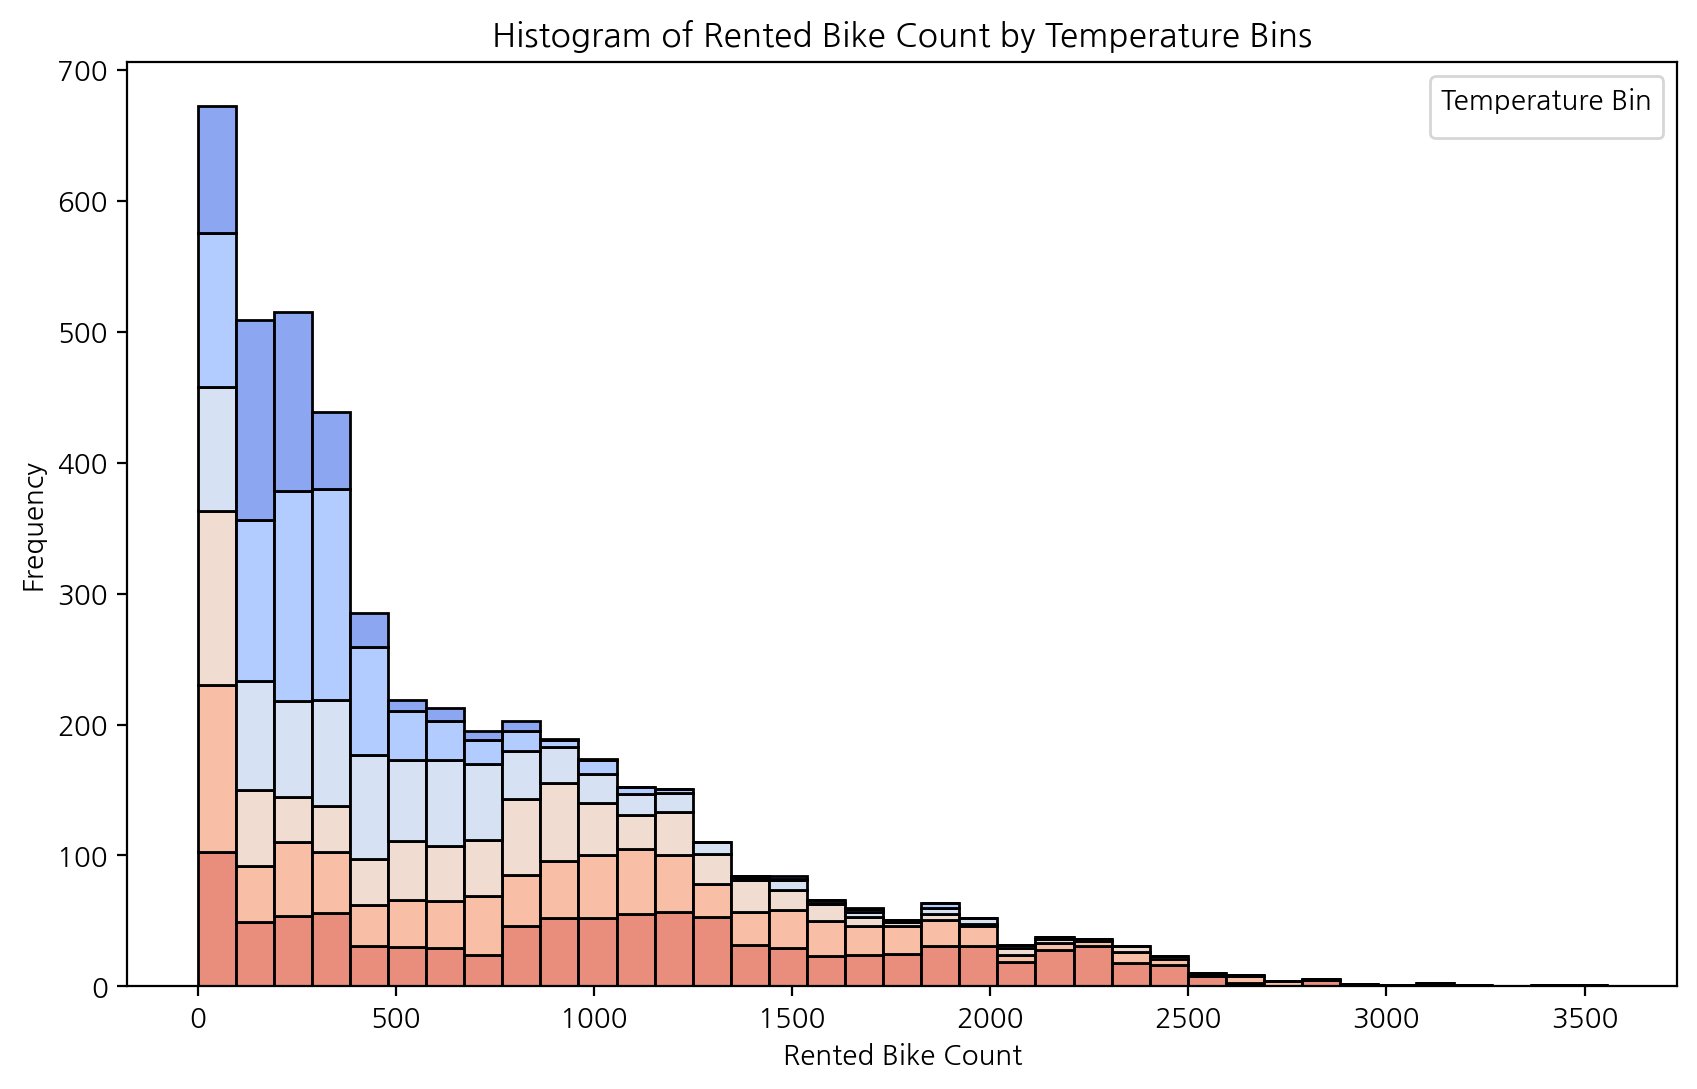

In [25]:
# 온도 구간 생성
df['Temperature Bin'] = pd.cut(df['Temperature(°C)'], bins=np.arange(-5, 30, 5))

# 온도 구간별 자전거 대여 수의 분포
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rented Bike Count', hue='Temperature Bin', multiple='stack', palette='coolwarm')
plt.title('Histogram of Rented Bike Count by Temperature Bins')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.legend(title='Temperature Bin')
plt.show()

이를 통해, 기온이 낮은 날보다는 높은 날이 자전거 대여 수가 많다는 사실을 확인할 수 있음.

**즉, 자전거 대여 수는 폭염보다는 한파에 영향을 많이 받는다는 결론을 도출할 수 있음.**

### 1 - (3) Hour 변수 EDA
- 자전거 대여 빈도는 모든 시간대가 비슷함
- 대여량 자제는 출근시간과 퇴근시간이 눈에 띄게 많음
- 전반적으로 오전보다 오후에 대여량이 많음

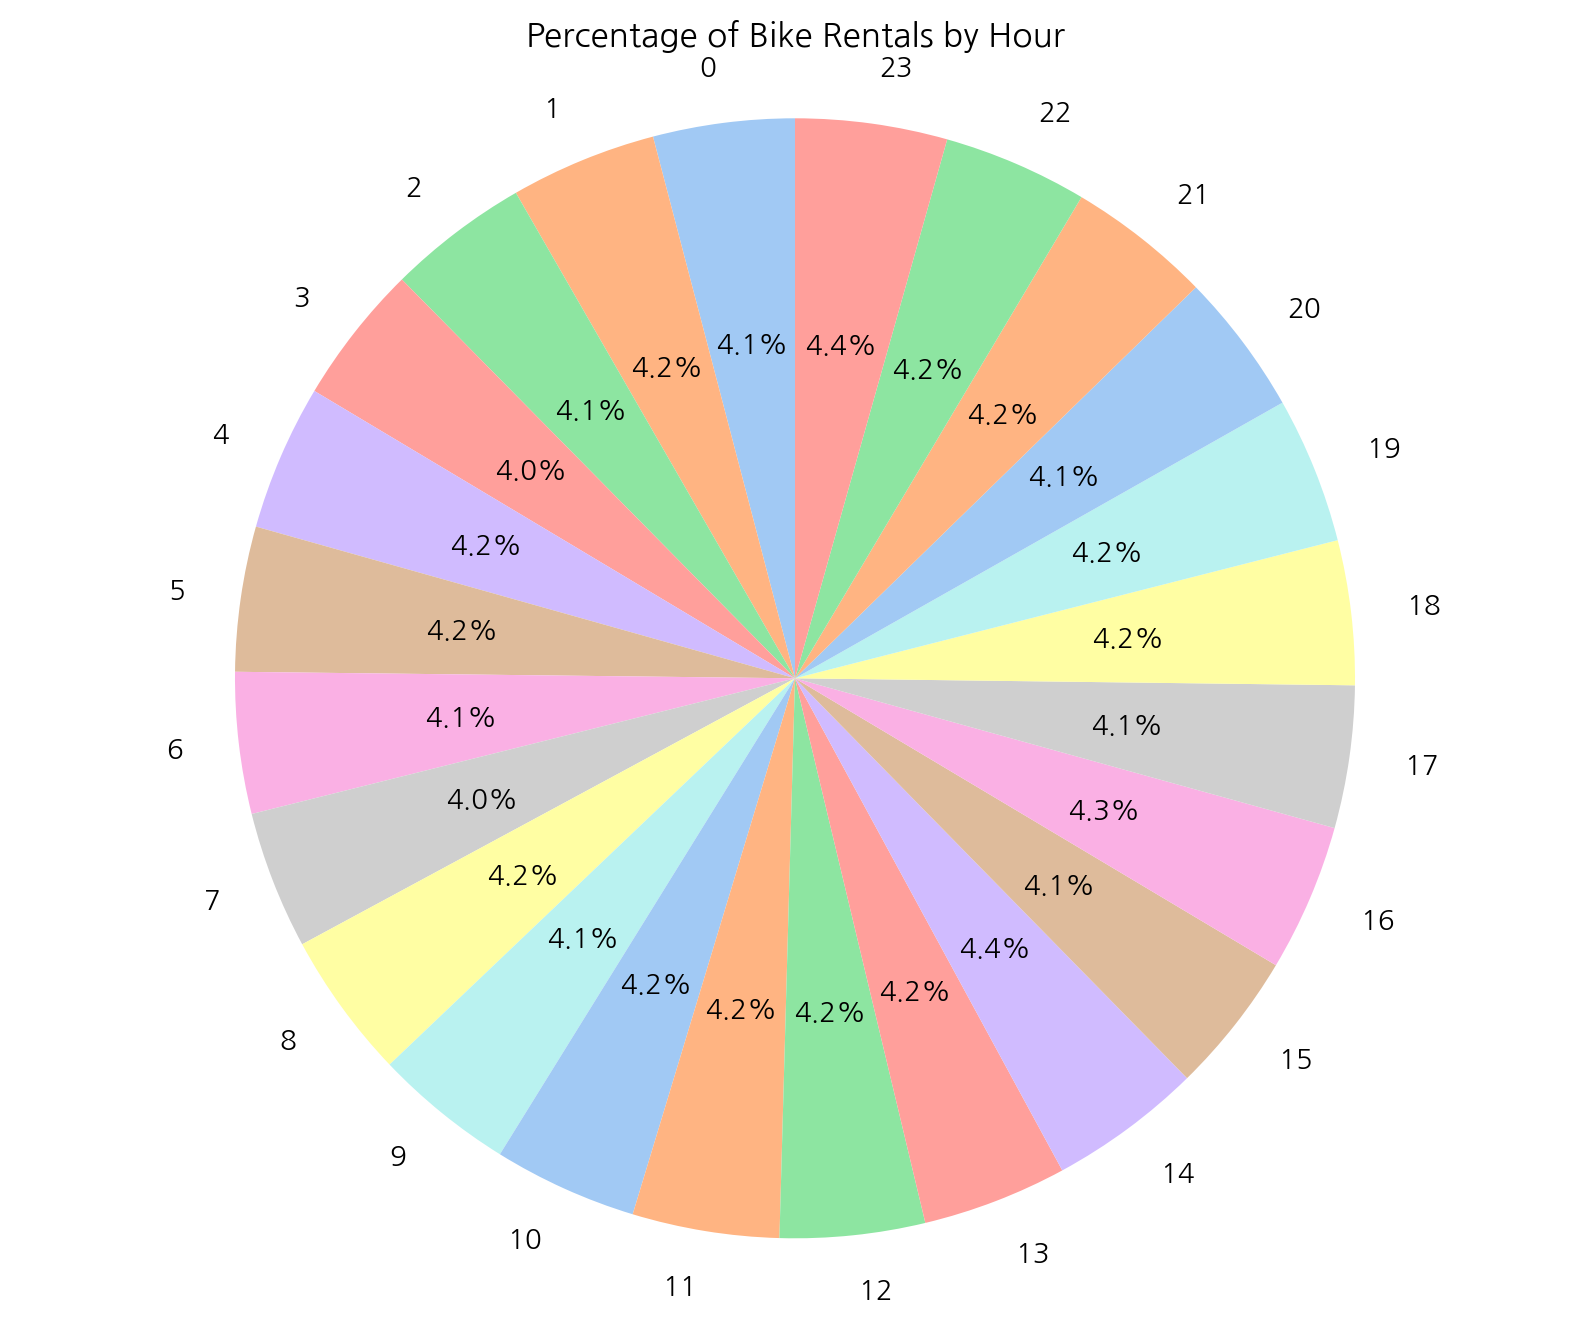

In [34]:
# 시간대별 자전거 대여 수 집계
hourly_counts = df.groupby('Hour').size()

colors = sns.color_palette('pastel', len(hourly_counts))

# 원그래프 그리기
plt.figure(figsize=(10, 8))
plt.pie(hourly_counts, labels=hourly_counts.index, autopct='%1.1f%%', startangle=90,colors=colors)
plt.title('Percentage of Bike Rentals by Hour')
plt.axis('equal')  
plt.show()

시간대별 자전거 대여 수의 빈도는 거의 비슷함.

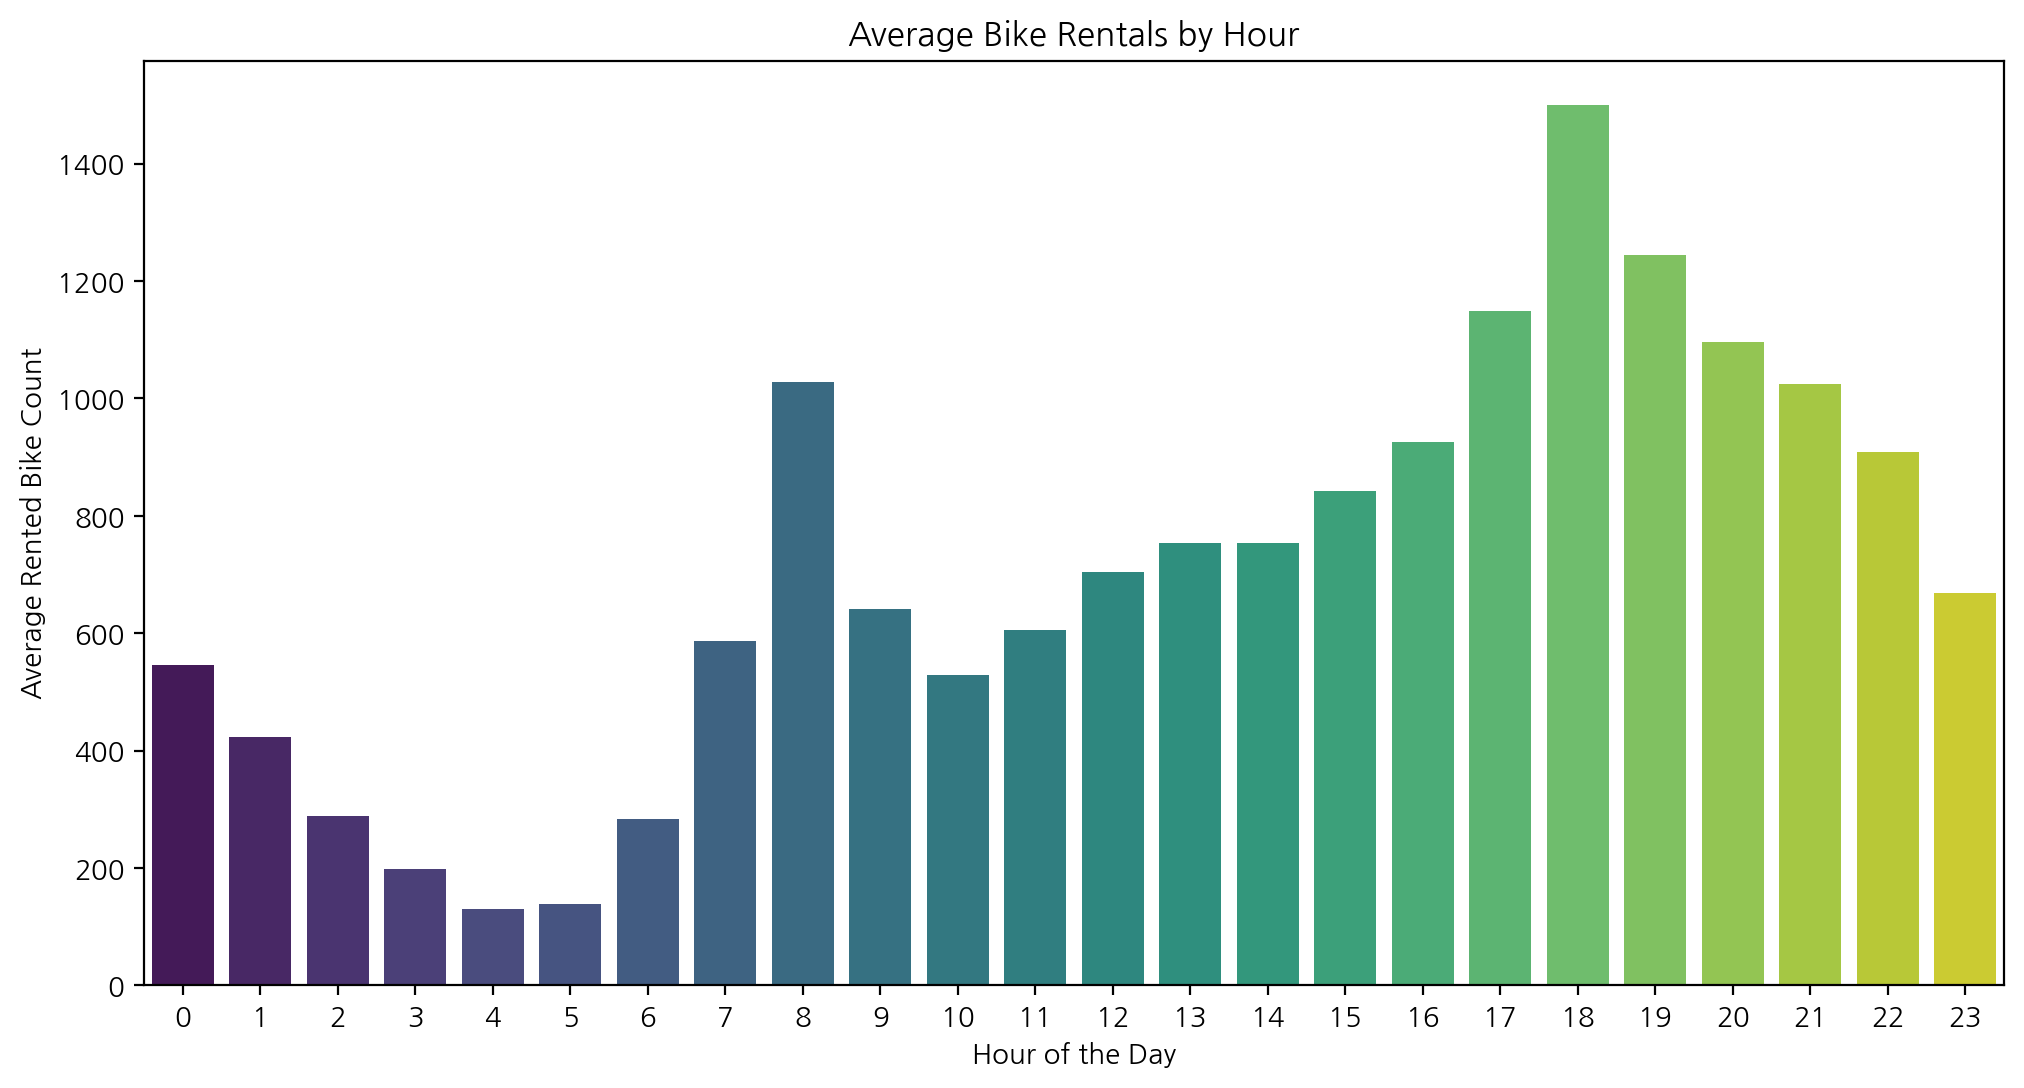

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Rented Bike Count', data=df, ci=None, palette='viridis')
plt.title('Average Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rented Bike Count')
plt.xticks(range(0, 24))
plt.show()

빈도수는 비슷하지만, 대여수 자체는 오전 8시(출근시간)과 18시(퇴근시간)이 특히 뛰고, 전반적으로 오전보단 오후에 대여량이 많음.

### 1 - (4) Temperature(°C), Humidity(%), Dew point temperature(°C) 변수 EDA 및 전처리
**Temperature(°C) 변수 EDA**
- 20(°C)근방에서 높은 밀도를 나타낸다
- 702개 결측치 존재
- 이슬점과 높은 상관계수 (0.91)
- 상대습도와 이슬점을 이용해면 관련 공식을 통해 결측치를 채울 수 있음

<Axes: ylabel='Temperature(°C)'>

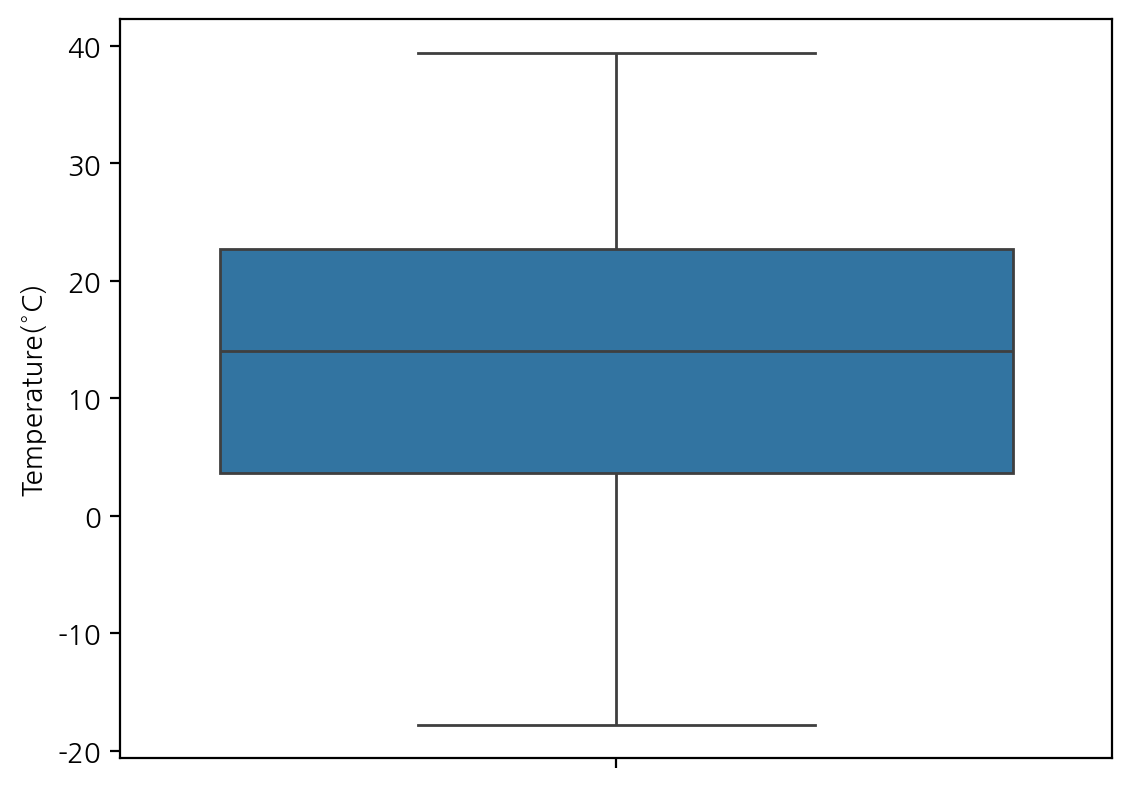

In [45]:
sns.boxplot(df['Temperature(°C)'])

In [46]:
df['Temperature(°C)'].sort_values().unique()

array([-17.8, -17.5, -17.4, -16.9, -16.5, -16.4, -16.2, -16.1, -16. ,
       -15.9, -15.8, -15.7, -15.6, -15.4, -15.3, -15.2, -15.1, -15. ,
       -14.9, -14.7, -14.6, -14.5, -14.4, -14.3, -14.1, -13.8, -13.7,
       -13.6, -13.5, -13.3, -13.2, -13.1, -13. , -12.9, -12.8, -12.7,
       -12.6, -12.5, -12.4, -12.3, -12.1, -12. , -11.9, -11.8, -11.7,
       -11.6, -11.5, -11.4, -11.3, -11.2, -11.1, -11. , -10.9, -10.8,
       -10.7, -10.6, -10.5, -10.4, -10.3, -10.2, -10.1, -10. ,  -9.9,
        -9.8,  -9.7,  -9.6,  -9.5,  -9.4,  -9.3,  -9.2,  -9.1,  -9. ,
        -8.9,  -8.8,  -8.7,  -8.6,  -8.5,  -8.4,  -8.3,  -8.2,  -8.1,
        -8. ,  -7.9,  -7.8,  -7.7,  -7.6,  -7.5,  -7.4,  -7.3,  -7.2,
        -7.1,  -7. ,  -6.9,  -6.8,  -6.7,  -6.6,  -6.5,  -6.4,  -6.3,
        -6.2,  -6.1,  -6. ,  -5.9,  -5.8,  -5.7,  -5.6,  -5.5,  -5.4,
        -5.3,  -5.2,  -5.1,  -5. ,  -4.9,  -4.8,  -4.7,  -4.6,  -4.5,
        -4.4,  -4.3,  -4.2,  -4.1,  -4. ,  -3.9,  -3.8,  -3.7,  -3.6,
        -3.5,  -3.4,

눈에 띄는 이상치는 없음.

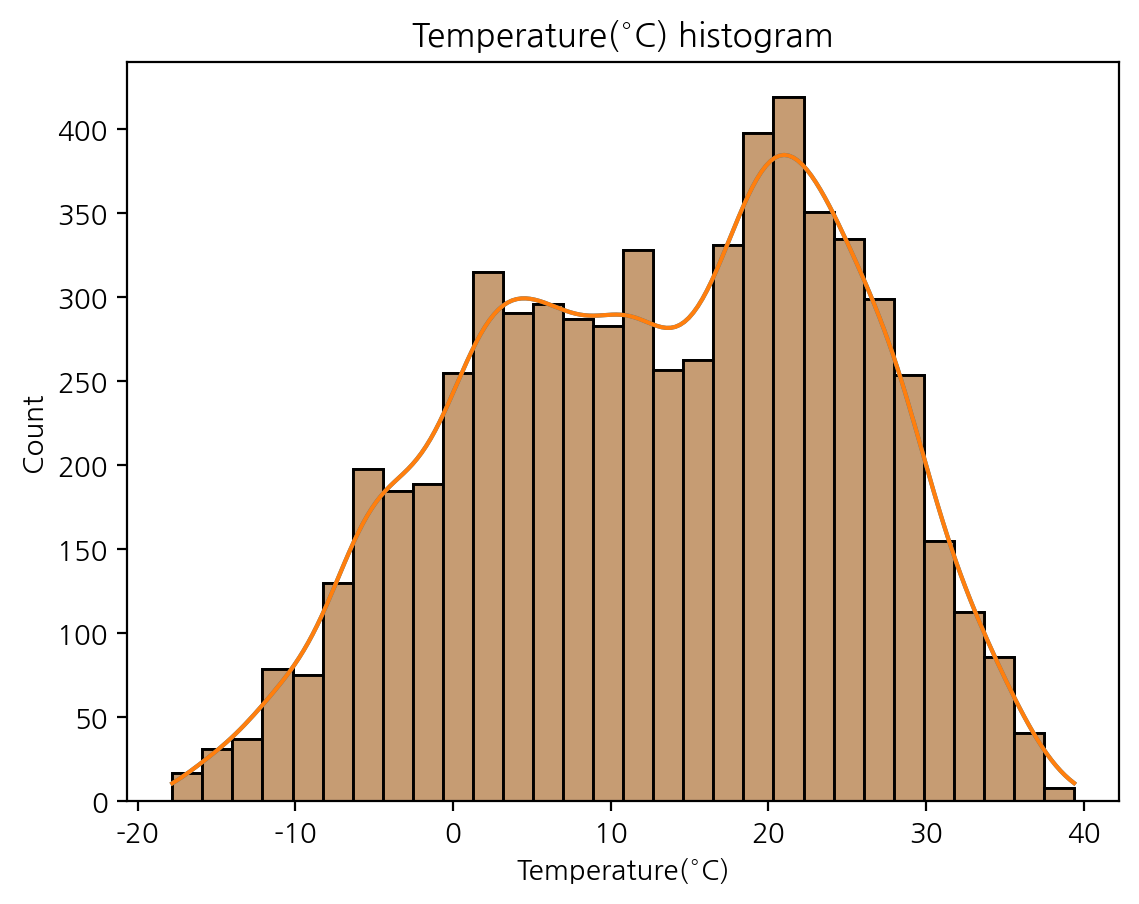

In [47]:
sns.histplot(data['Temperature(°C)'], bins=30, kde=True)
sns.histplot(x='Temperature(°C)',bins=30,kde=True,data=data)
plt.title('Temperature(°C) histogram',fontsize=12)
plt.show()

In [53]:
df.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)              702
Humidity(%)                    0
Wind speed (m/s)             705
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                        0
Holiday                        0
Functioning Day                0
dtype: int64

702개의 결측치가 존재한다.

1-(2)의 상관계수 히트맵을 보면, Temperature(°C)변수는 Dew point temperature(°C)변수와 상당한 연관성이 있음. (상관계수 0.91)

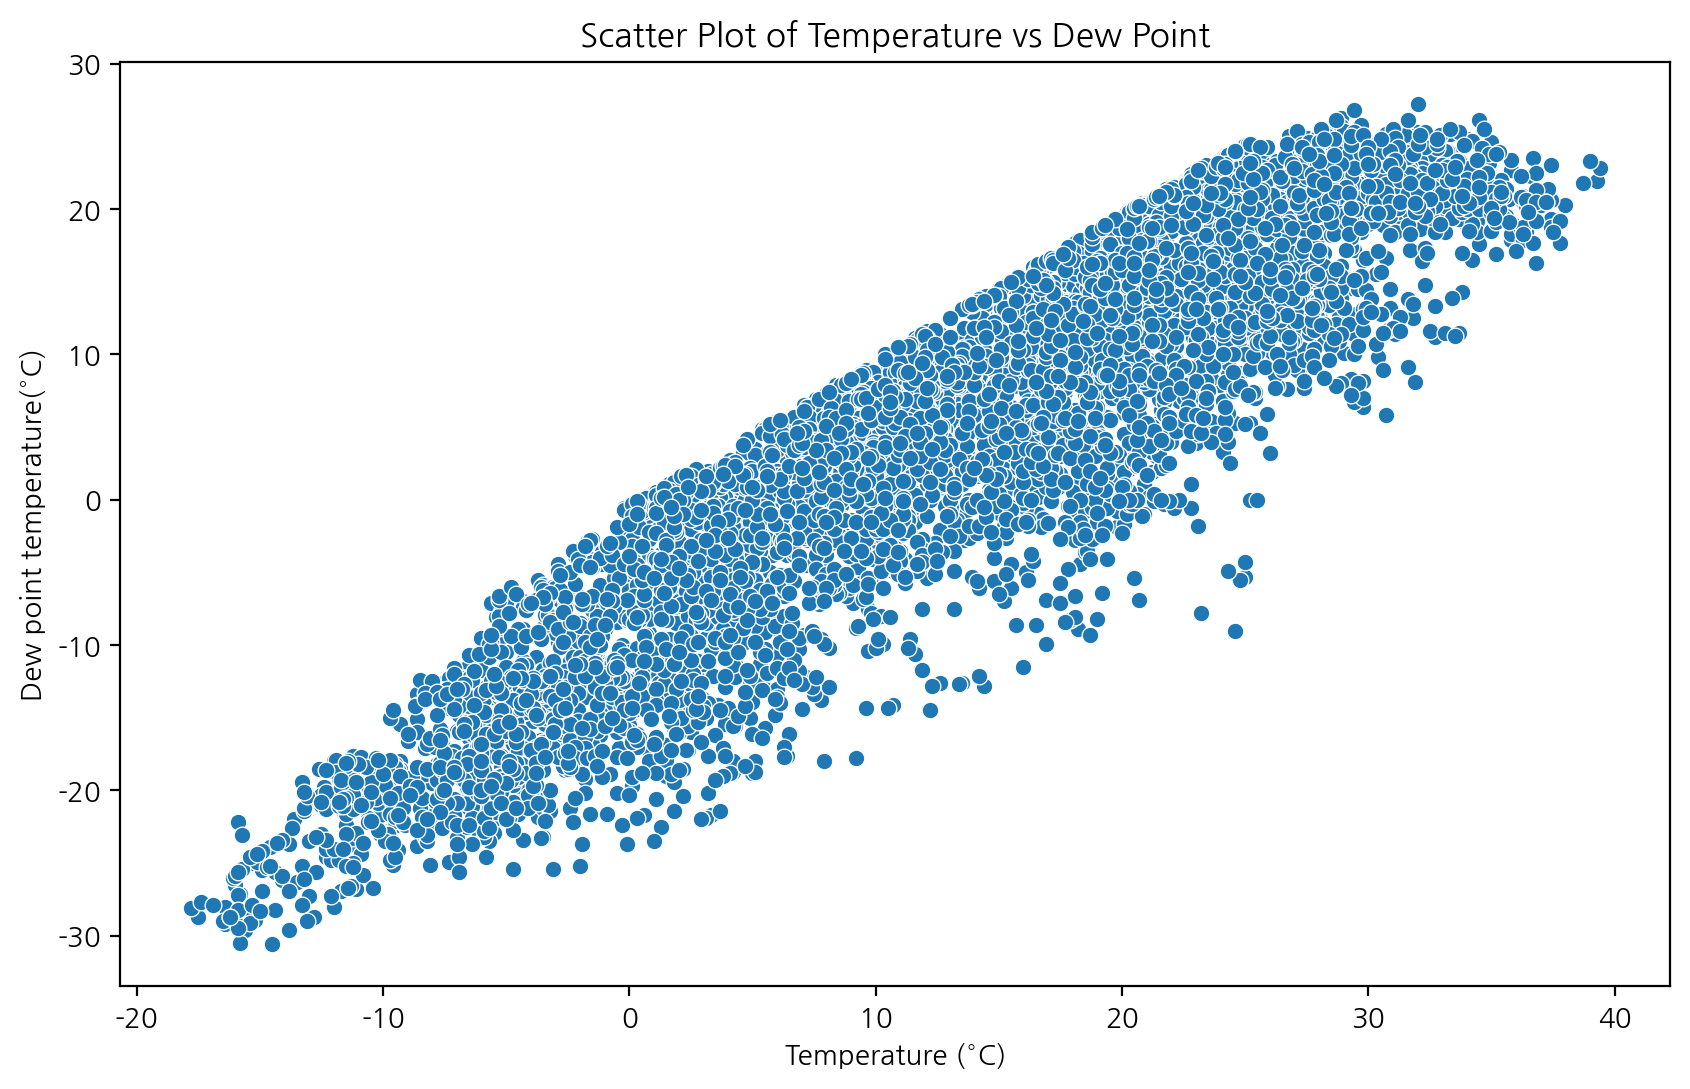

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature(°C)', y='Dew point temperature(°C)', data=df)
plt.title('Scatter Plot of Temperature vs Dew Point')
plt.xlabel('Temperature (°C)')
plt.ylabel('Dew point temperature(°C)')
plt.show()

실제로 온도, 이슬점, 상대습도가 있으면 이슬점(Dew Point) 공식을 이용해 Temperature(°C)변수의 결측치를 완벽하게 매꿀 수 있다.

결측치 작업 전에 상대습도와 이슬점 변수의 EDA 먼저 진행한다.

**상대습도(Humidity(%)) 변수 EDA**
- 박스플롯에는 보이지 않는 이상치가 존재

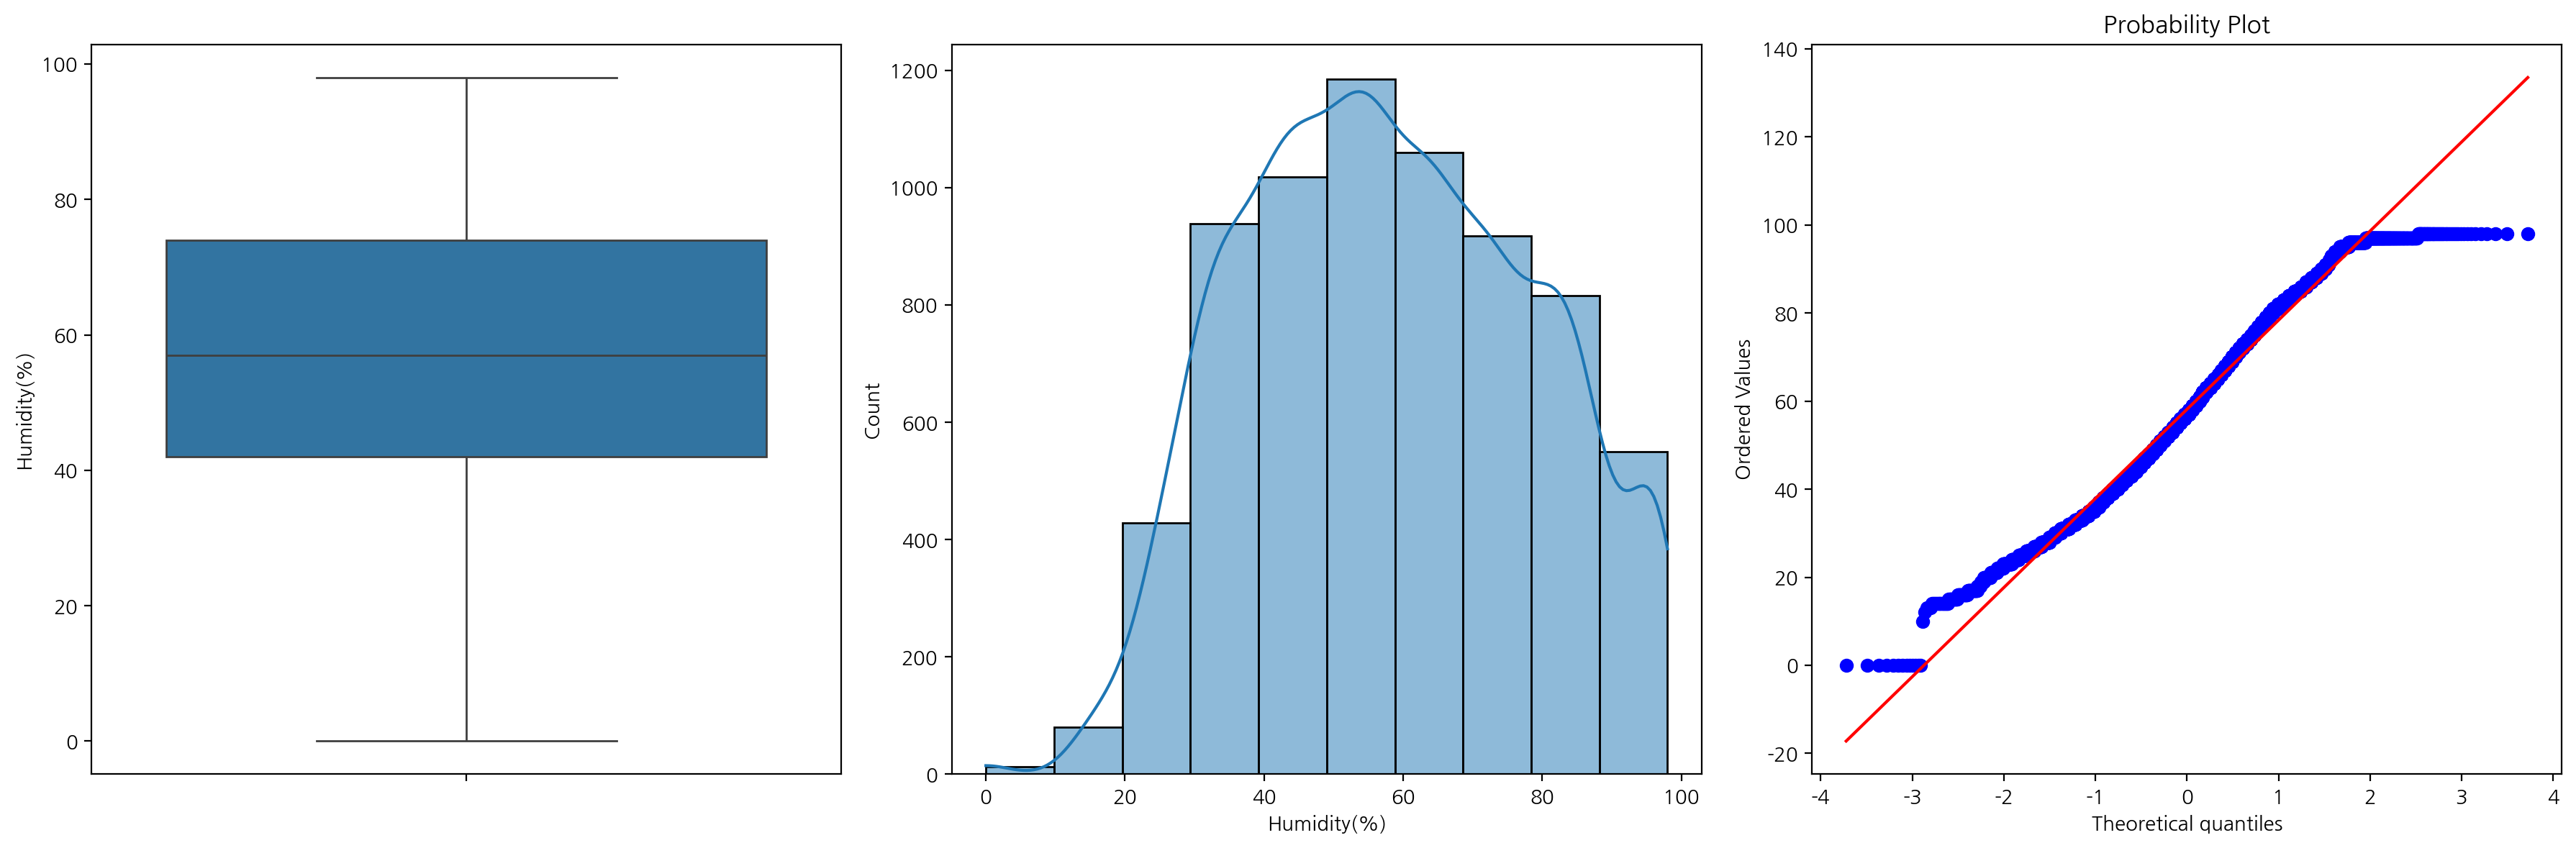

In [38]:
import scipy.stats as stats

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.boxplot(df['Humidity(%)'])

plt.subplot(1,3,2)
sns.histplot(df['Humidity(%)'], bins=10, kde=True)

plt.subplot(1, 3, 3)  # 1행 3열의 세 번째 서브플롯
stats.probplot(df['Humidity(%)'], dist="norm", plot=plt)

plt.tight_layout()
plt.show()

- 위 시각화 자료 1행 3열의 그래프를 보면, 상대습도가 0%인 데이터들은 다른 데이터들과 원만하게 이어지지 않고, 비정상적으로 뚝 끊겨있는 것을 볼 수 있다.
- 일반적으로 상대습도는 100%에 가까운 값은 자주 나타나지만, 0%에 가까운 값은 기상학적으로 관찰되기 어렵다.

이 두 가지 근거를 통해, 상대습도가 0%인 데이터들은 이상치로 판단하고 삭제할 수 있다.

In [82]:
df2 = df[df['Humidity(%)'] != 0] #결측지 삭제

**Dew point temperature(°C) 변수 EDA**

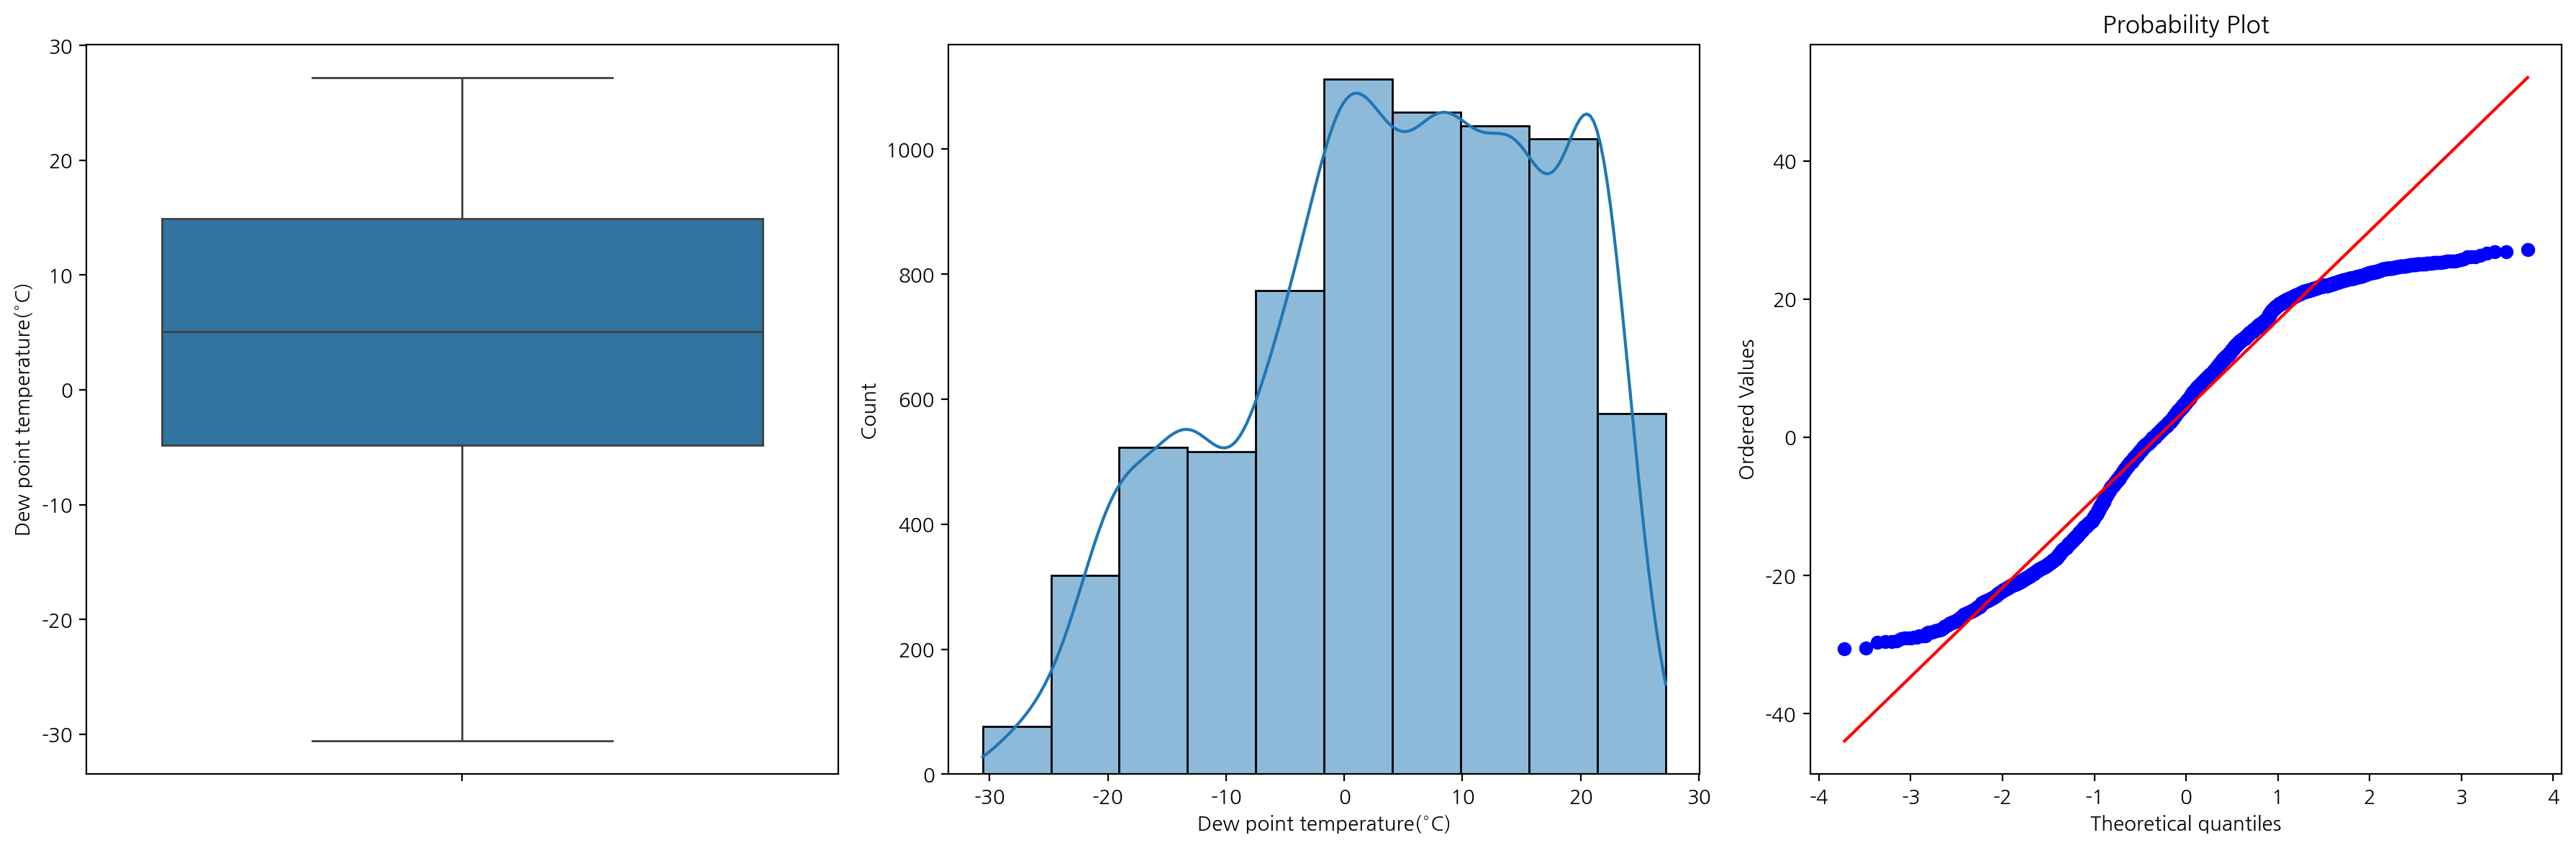

In [55]:
import scipy.stats as stats

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.boxplot(df['Dew point temperature(°C)'])

plt.subplot(1,3,2)
sns.histplot(df['Dew point temperature(°C)'], bins=10, kde=True)

plt.subplot(1, 3, 3)  # 1행 3열의 세 번째 서브플롯
stats.probplot(df['Dew point temperature(°C)'], dist="norm", plot=plt)

plt.tight_layout()
plt.show()

이슬점 데이터에서 눈에 띄는 이상치는 존재하지 않는다. 물론, 대한민국의 일반적인 기후에서 이슬점이 -30°C에 도달하는 것은 드문 일이기에 이상치로 판단할 수 있지만, 극단적인 기온 조건에 따라서 발생할 수도 있는 현상이다.

그럼 이제 이슬점 공식을 이용해 결측치를 매꿔보자.

In [48]:
pip install metpy

Note: you may need to restart the kernel to use updated packages.


In [60]:
from metpy.calc import dewpoint_from_relative_humidity
from metpy.units import units

In [83]:
def fill_temperature(row):
    if pd.isnull(row['Temperature(°C)']):
        dew_point_temp = row['Dew point temperature(°C)'] * units.degC
        relative_humidity = row['Humidity(%)'] * units.percent
        temperature = dewpoint_from_relative_humidity(dew_point_temp, relative_humidity)
        return temperature.magnitude  # 단위 제거하고 값만 반환
    else:
        return row['Temperature(°C)']
#결측치 채우기
df2['Temperature(°C)']=df2.apply(fill_temperature,axis=1)

print(df2)

           Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2018-10-24               1492    16        -6.856467           42   
1    2018-05-01               1536    14        23.000000           64   
2    2018-11-14                327     2         6.200000           59   
3    2018-08-31                170     4        23.200000           83   
4    2018-06-26                 45     5        23.700000           64   
...         ...                ...   ...              ...          ...   
7003 2018-02-08                255     7        -9.600000           67   
7004 2018-03-28                104     4        10.600000           77   
7005 2018-04-30                569     0        14.700000           54   
7006 2018-05-29               2234     8        20.500000           66   
7007 2018-09-20               1290    17        19.300000           76   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  1.3              1976

In [84]:
df2.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)                0
Humidity(%)                    0
Wind speed (m/s)             704
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                        0
Holiday                        0
Functioning Day                0
dtype: int64

결측치가 잘 매꿔졌다. 그러나, 문제가 하나 생긴다. 'Temperature(°C)'변수에 이상치가 생겨버린다.

<Axes: ylabel='Temperature(°C)'>

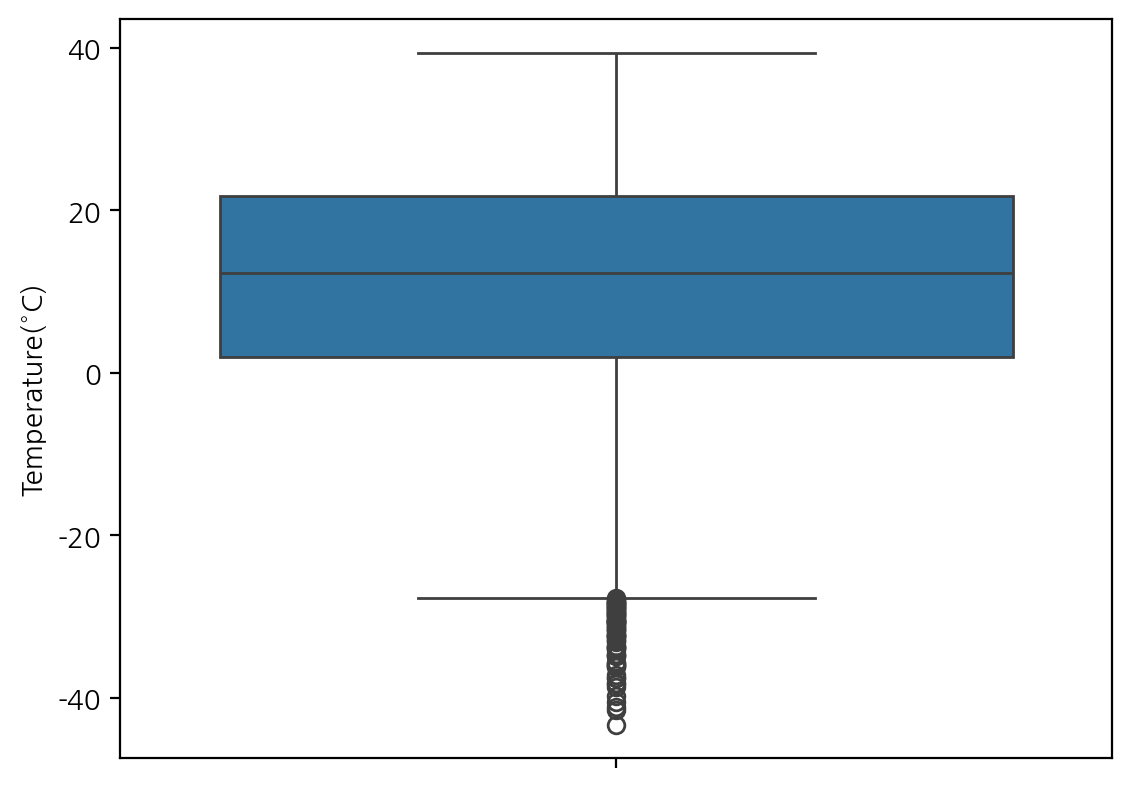

In [63]:
sns.boxplot(df2['Temperature(°C)'])

다소 극단적인 이슬점 데이터들 때문에 기온변수에서 이상치가 생겼다. 그러나, 이슬점 데이터 안에서 이상치를 판단하고 제거하기에는 그 기준이 모호하다. 따라서, 공식에 따라 구해진 기온 데이터에서 이상치를 따로 삭제하는 편이 훨씬 더 논리적이라고 판단하고, 기온의 이상치를 삭제한다.

<Axes: ylabel='Temperature(°C)'>

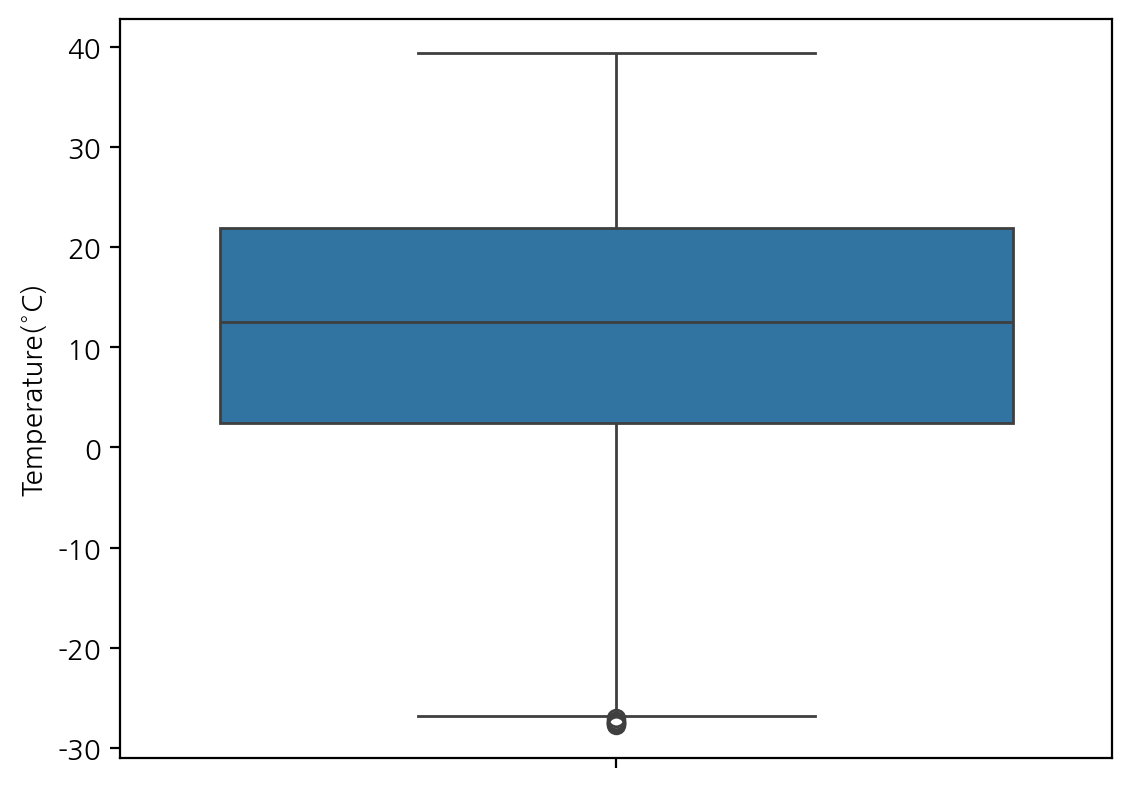

In [85]:
Q1 = df2['Temperature(°C)'].quantile(0.25)
Q3 = df2['Temperature(°C)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#이상치 제거
df3=df2[(df2['Temperature(°C)']<upper_bound)&(df2['Temperature(°C)']>lower_bound)]
#제거 후 확인
sns.boxplot(df3['Temperature(°C)'])

In [65]:
df3.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)                0
Humidity(%)                    0
Wind speed (m/s)             694
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                        0
Holiday                        0
Functioning Day                0
dtype: int64

다량의 기온 이상치를 처리했다.

### 1 - (5) Wind speed (m/s) 변수 EDA 및 전처리

In [97]:
data[['Rented Bike Count','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']].corr()

Rented Bike Count  Temperature(°C)  Humidity(%)  \
Rented Bike Count                   1.000000         0.541908    -0.194577   
Temperature(°C)                     0.541908         1.000000     0.152777   
Humidity(%)                        -0.194577         0.152777     1.000000   
Wind speed (m/s)                    0.116835        -0.040290    -0.342188   
Visibility (10m)                    0.199378         0.038039    -0.542005   
Dew point temperature(°C)           0.386236         0.911766     0.534907   
Solar Radiation (MJ/m2)             0.262888         0.360516    -0.461830   
Rainfall(mm)                       -0.124764         0.045058     0.237836   
Snowfall (cm)                      -0.140378        -0.218021     0.103439   

                           Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count                  0.116835          0.199378   
Temperature(°C)                   -0.040290          0.038039   
Humidity(%)                       -0.342188         -0.542005   
Wind speed (m/s)                   1.000000          0.173654   
Visibility (10m)                   0.173654          1.000000   
Dew point temperature(°C)         -0.186479         -0.178756   
Solar Radiation (MJ/m2)            0.330813          0.144465   
Rainfall(mm)                      -0.013948         -0.172910   
Snowfall (cm)                     -0.000302         -0.117725   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.386236                 0.262888   
Temperature(°C)                             0.911766                 0.360516   
Humidity(%)                                 0.534907                -0.461830   
Wind speed (m/s)                           -0.186479                 0.330813   
Visibility (10m)                           -0.178756                 0.144465   
Dew point temperature(°C)                   1.000000                 0.099315   
Solar Radiation (MJ/m2)                     0.099315                 1.000000   
Rainfall(mm)                                0.121872                -0.074714   
Snowfall (cm)                              -0.151745                -0.071934   

                           Rainfall(mm)  Snowfall (cm)  
Rented Bike Count             -0.124764      -0.140378  
Temperature(°C)                0.045058      -0.218021  
Humidity(%)                    0.237836       0.103439  
Wind speed (m/s)              -0.013948      -0.000302  
Visibility (10m)              -0.172910      -0.117725  
Dew point temperature(°C)      0.121872      -0.151745  
Solar Radiation (MJ/m2)       -0.074714      -0.071934  
Rainfall(mm)                   1.000000       0.013482  
Snowfall (cm)                  0.013482       1.000000

Wind speed (m/s)변수는 Hour, Humidity(%), Solar Radiation (MJ/m2)변수들과 관련이 있어보인다.

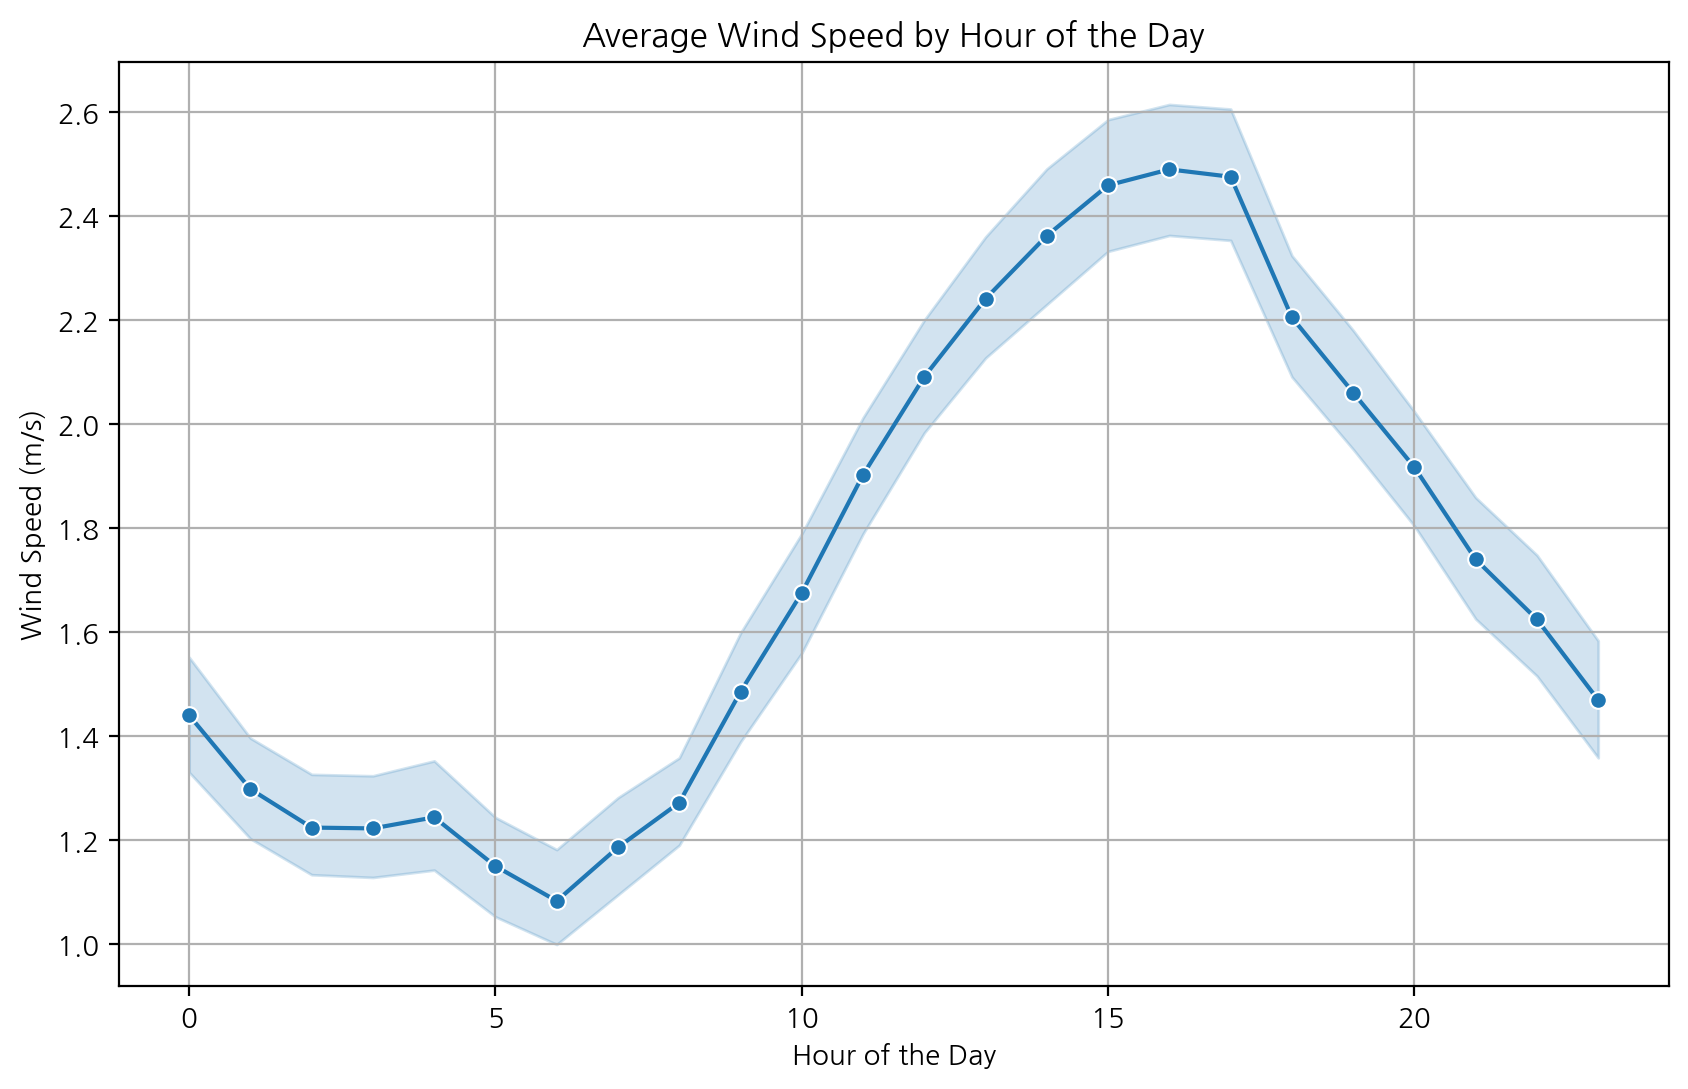

In [68]:
#Hour 변수와 그래프
plt.figure(figsize=(10, 6))
sns.lineplot(data=df3, x='Hour', y='Wind speed (m/s)', marker='o')
plt.title('Average Wind Speed by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

오후 2시~5시가 평균 풍속이 가장 높음

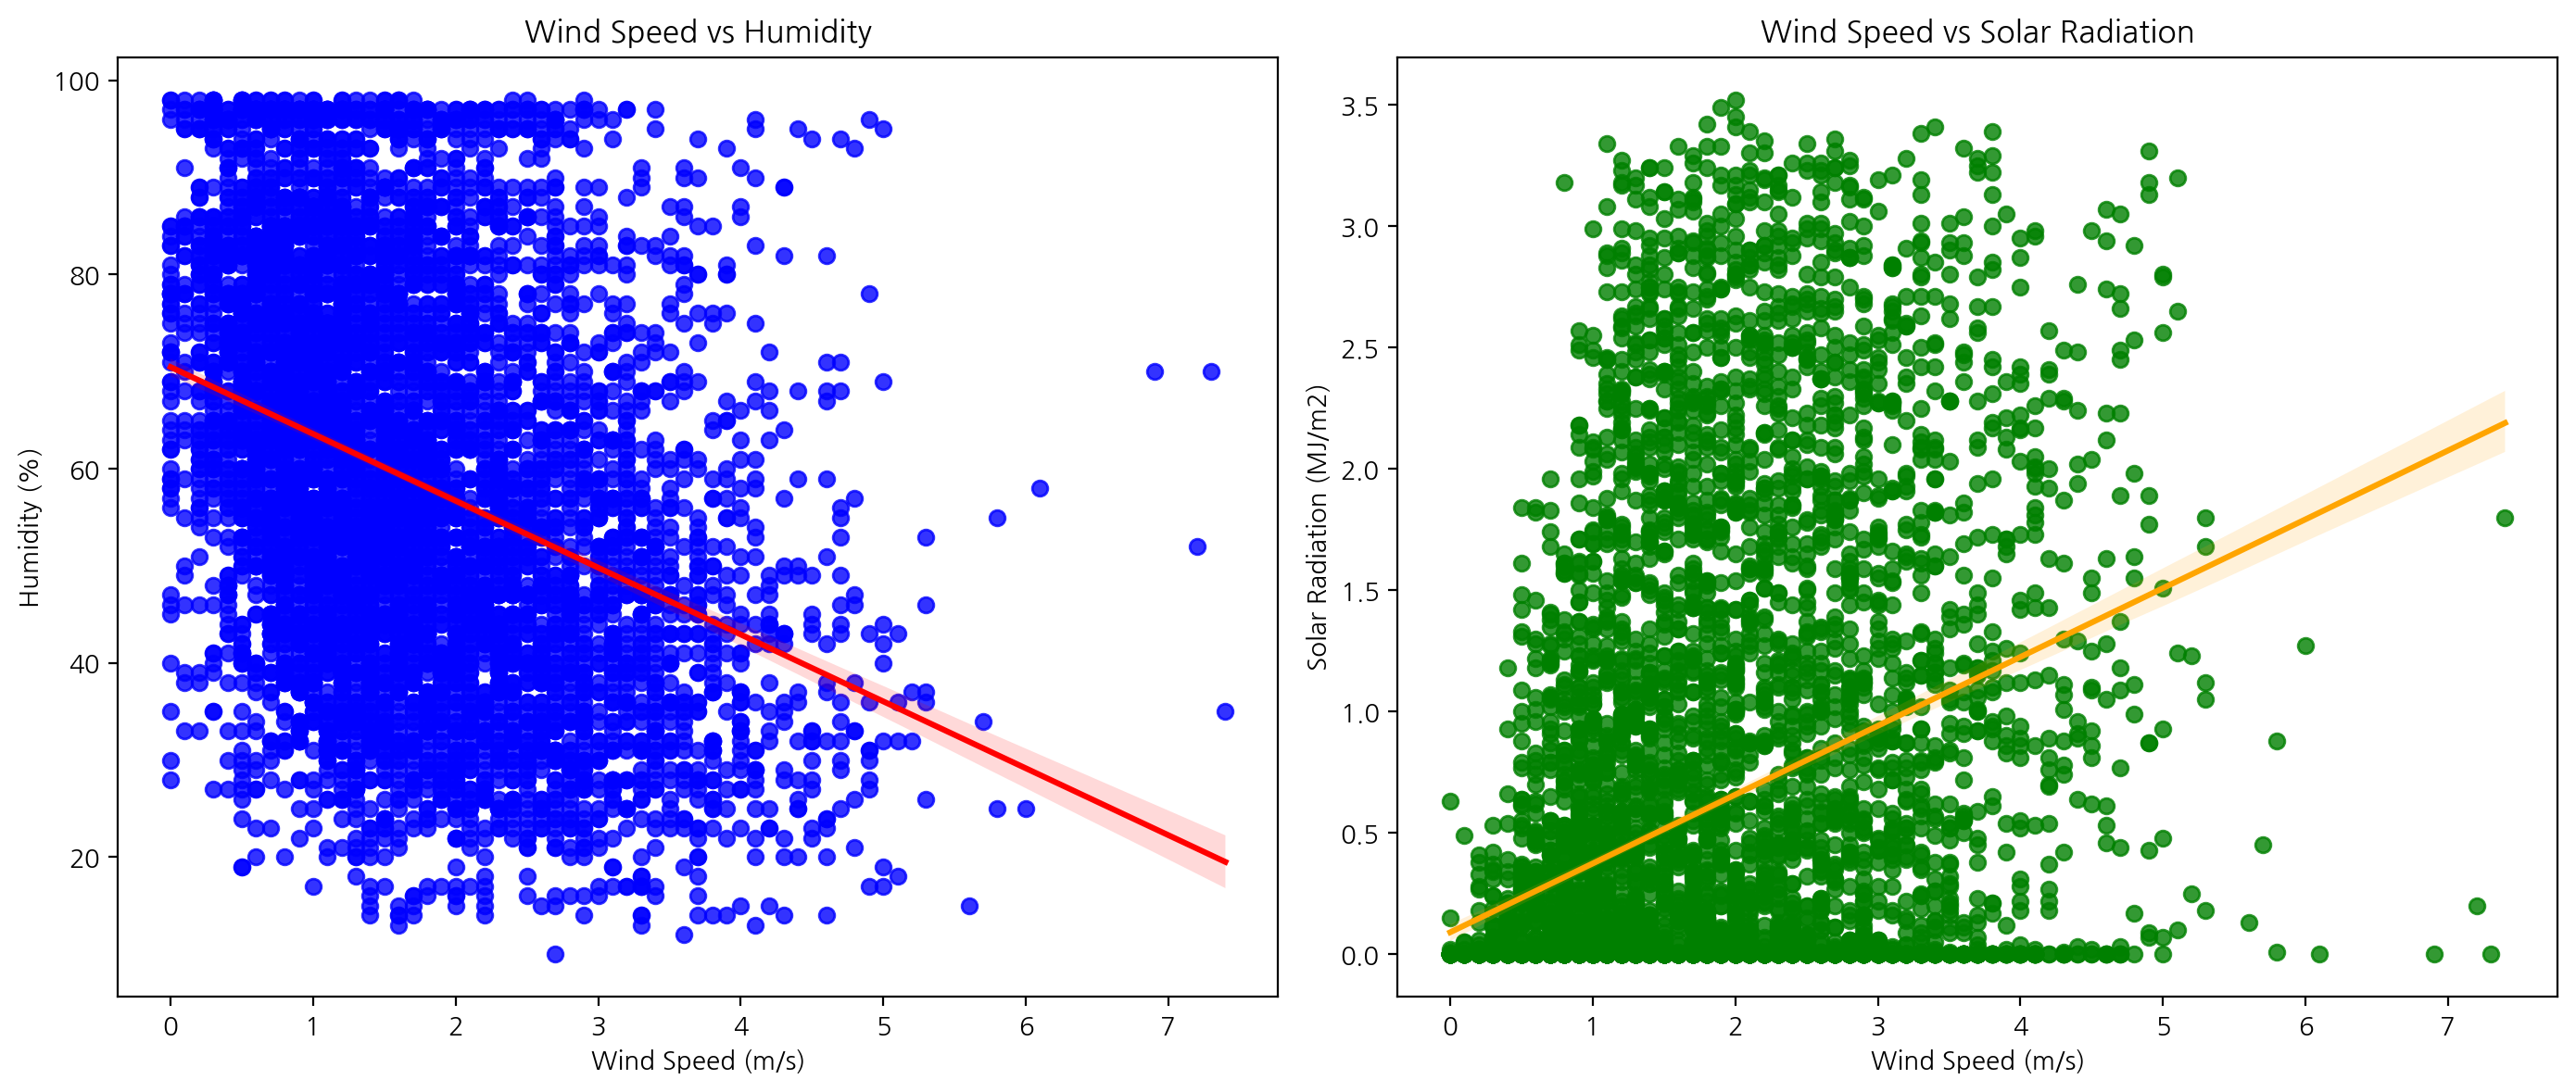

In [70]:
#Humidity(%), Solar Radiation (MJ/m2)변수들과의 그래프
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(data=df3, x='Wind speed (m/s)', y='Humidity(%)', scatter_kws={'color': 'b'}, line_kws={'color': 'r'})
plt.title('Wind Speed vs Humidity')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Humidity (%)')

plt.subplot(1, 2, 2)
sns.regplot(data=df3, x='Wind speed (m/s)', y='Solar Radiation (MJ/m2)', scatter_kws={'color': 'g'}, line_kws={'color': 'orange'})
plt.title('Wind Speed vs Solar Radiation')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Solar Radiation (MJ/m2)')

plt.tight_layout()
plt.show()

<Axes: ylabel='Wind speed (m/s)'>

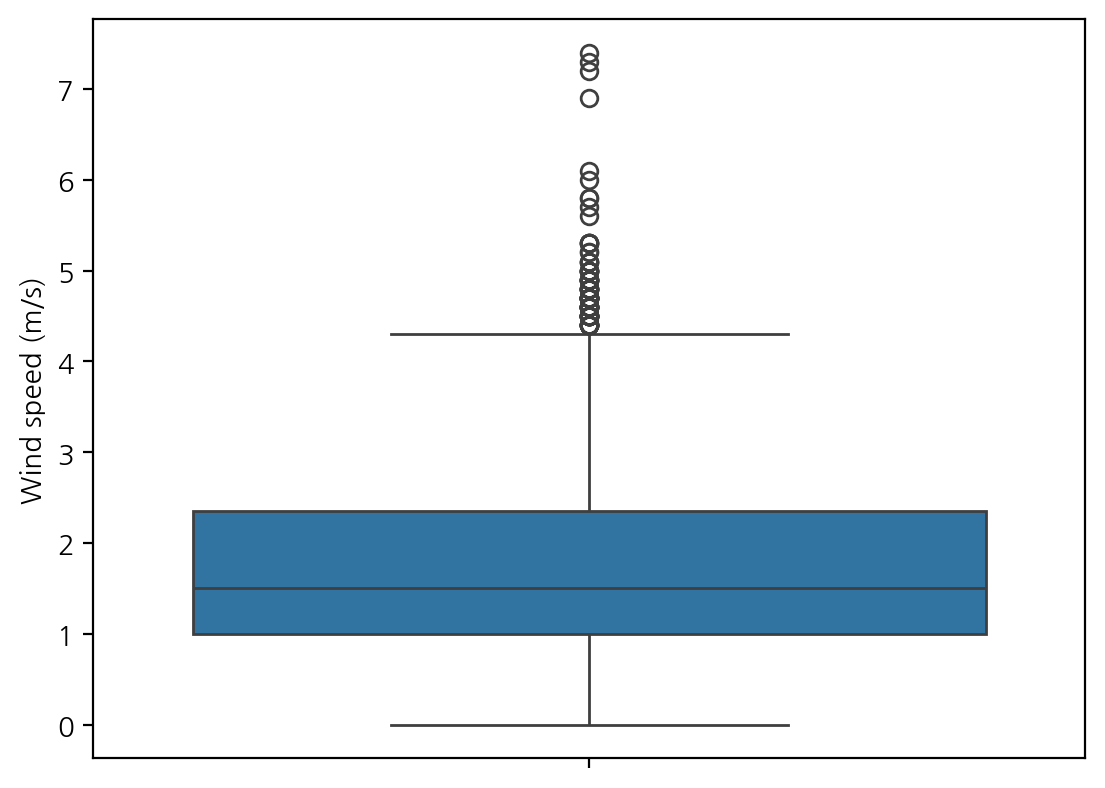

In [88]:
sns.boxplot(df['Wind speed (m/s)'])

Wind speed (m/s)변수의 박스플롯을 그려본 결과, 이상치로 의심되는 데이터가 존재함을 확인함.

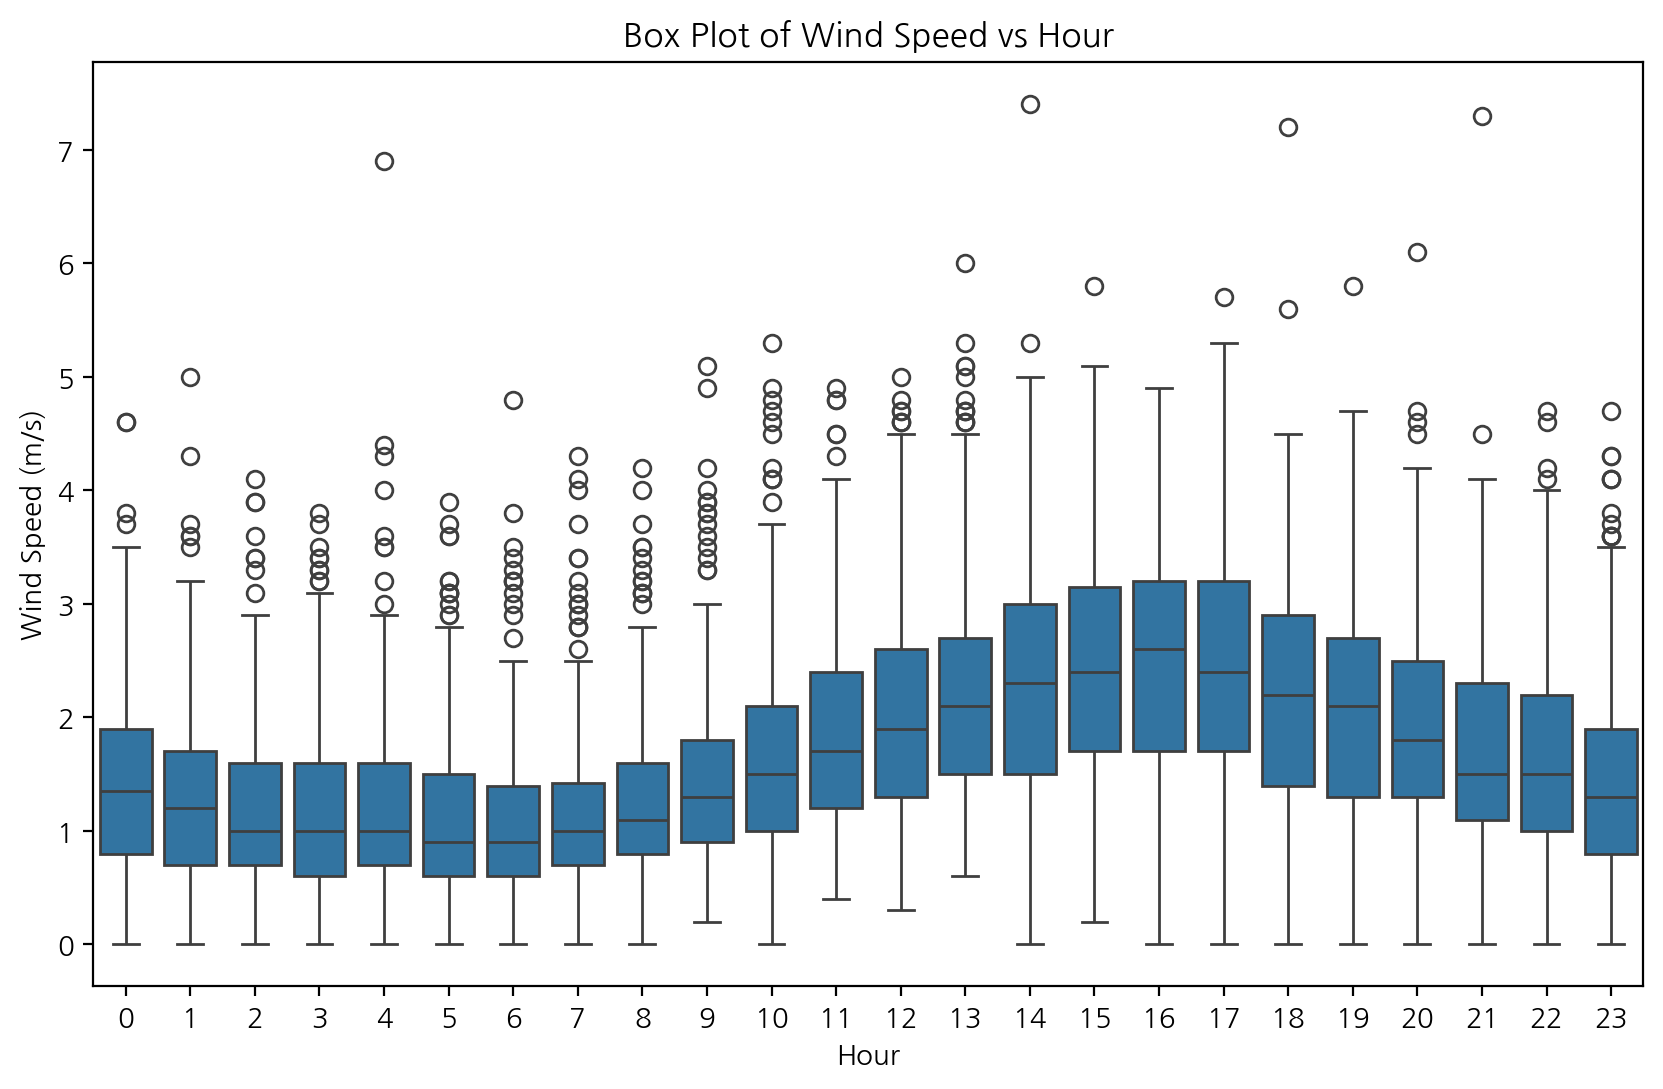

In [72]:
# 상자 그림 (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hour', y='Wind speed (m/s)', data=df3)
plt.title('Box Plot of Wind Speed vs Hour')
plt.xlabel('Hour')
plt.ylabel('Wind Speed (m/s)')
plt.show()

실제로 눈에 띄는 7(m/s) 근방의 이상치들도 존재하지만, 그 밑의 이상치들을 전부 제거하기에는 양이 너무 많아서 무리가 있어보임. 

In [74]:
Q1 = df3['Wind speed (m/s)'].quantile(0.25)
Q3 = df3['Wind speed (m/s)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

4.25


위와 같이 upper_bound가 4.25 이기 때문. (lower_bound보다 낮은 이상치는 존재X)

Wind speed (m/s)변수는 시계열 데이터이므로, 이에 적합한 스플라인 보간법으로 결측치를 처리할 것이다. 그렇기 때문에, 기계의 오작동이 의심되는 7(m/s)근처 이상치들만 제거하고 보간법을 진행한다.

In [86]:
df3[(df3['Wind speed (m/s)']>6.5)]

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
18   2018-04-10                133    21         6.604828           70   
510  2018-04-10                913    14        21.200000           35   
2316 2018-08-21                 49     4        25.300000           70   
4906 2018-04-10               1805    18        19.700000           52   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
18                 7.3              1634                       11.9   
510                7.4              1992                        5.1   
2316               6.9               925                       19.4   
4906               7.2              2000                        9.5   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
18                        0.0           0.5            0.0  Spring   
510                       1.8           0.0            0.0  Spring   
2316                      0.0           0.4            0.0  Summer   
4906                      0.2           0.0            0.0  Spring   

         Holiday Functioning Day  
18    No Holiday             Yes  
510   No Holiday             Yes  
2316  No Holiday             Yes  
4906  No Holiday             Yes

In [87]:
df4 = df3[(df3['Wind speed (m/s)']<6.5) | df['Wind speed (m/s)'].isna()]

# 이상치 제거 확인
df4.info()
df4.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 6909 entries, 0 to 7007
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       6909 non-null   datetime64[ns]
 1   Rented Bike Count          6909 non-null   int64         
 2   Hour                       6909 non-null   int64         
 3   Temperature(°C)            6909 non-null   float64       
 4   Humidity(%)                6909 non-null   int64         
 5   Wind speed (m/s)           6215 non-null   float64       
 6   Visibility (10m)           6909 non-null   int64         
 7   Dew point temperature(°C)  6909 non-null   float64       
 8   Solar Radiation (MJ/m2)    6909 non-null   float64       
 9   Rainfall(mm)               6909 non-null   float64       
 10  Snowfall (cm)              6909 non-null   float64       
 11  Seasons                    6909 non-null   object        
 12  Holiday    

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)                0
Humidity(%)                    0
Wind speed (m/s)             694
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                        0
Holiday                        0
Functioning Day                0
dtype: int64

In [90]:
#스플라인 보간법
df4['Wind speed (m/s)'] = df4['Wind speed (m/s)'].interpolate(method='spline', order=3)

In [91]:
df4.isna().sum() #결측치 확인

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: ylabel='Wind speed (m/s)'>

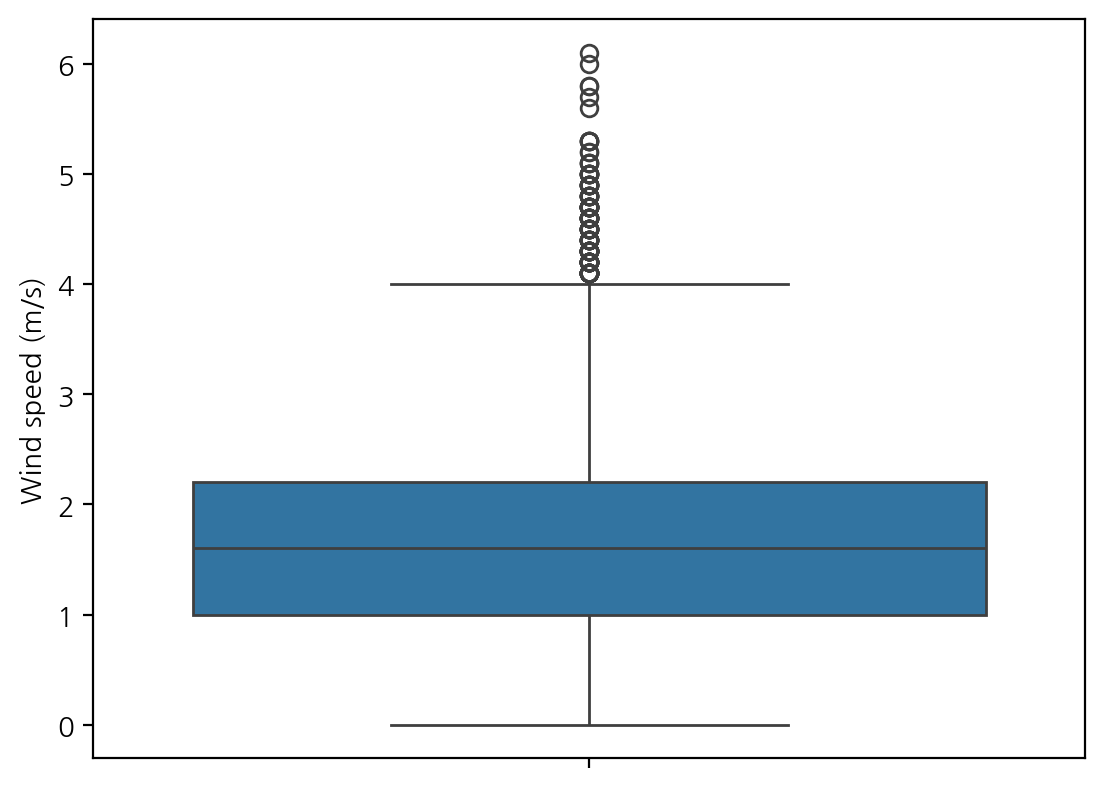

In [92]:
sns.boxplot(df4['Wind speed (m/s)'])

이상치의 범위가 다소 줄어들었음을 알 수 있다.

### 1 - (6) Visibility (10m) 변수 EDA
- 습도변수와 관계가 있어보임(상관계수 -0.542005)
- 습도가 높으면 날이 흐리고, 눈이나 비가 올 가능성이 높기 때문에 가시거리 또한 감소한다는 결론을 낼 수 있음
- 실제로 가시거리는 공기가 함유하고 있는 다른 입자들의 양에 의해 결정되며, 그 입자들의 종류는 수증기, 모래, 먼지, 물, 얼음 등이다. 즉 안개, 황사, 연무, 비, 눈 등에 의해 영향을 받는다.
- 가시거리가 확보되지 않으면 자전거를 타기 불편하기 때문에 자전거 대여 수가 감소할 것이라고 예측

<Axes: ylabel='Visibility (10m)'>

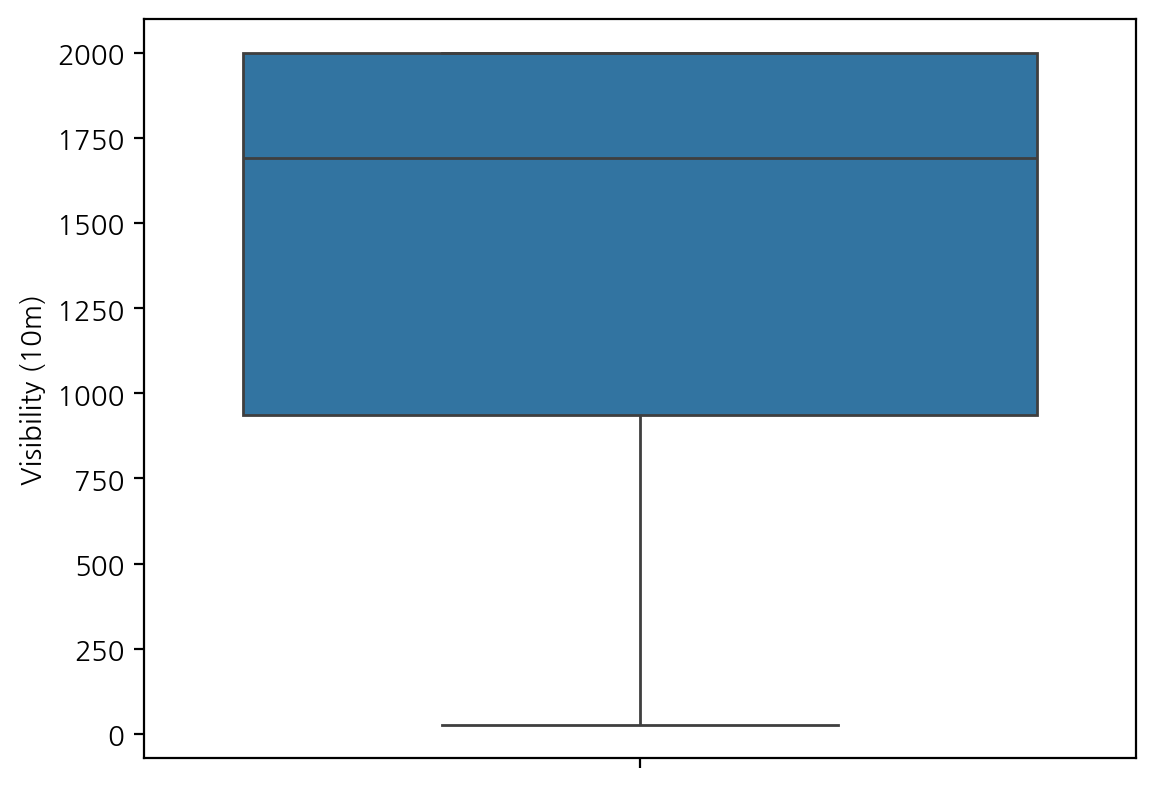

In [96]:
sns.boxplot(df4['Visibility (10m)'])

Text(0.5, 1.0, 'Histogram of Visibility (10m)')

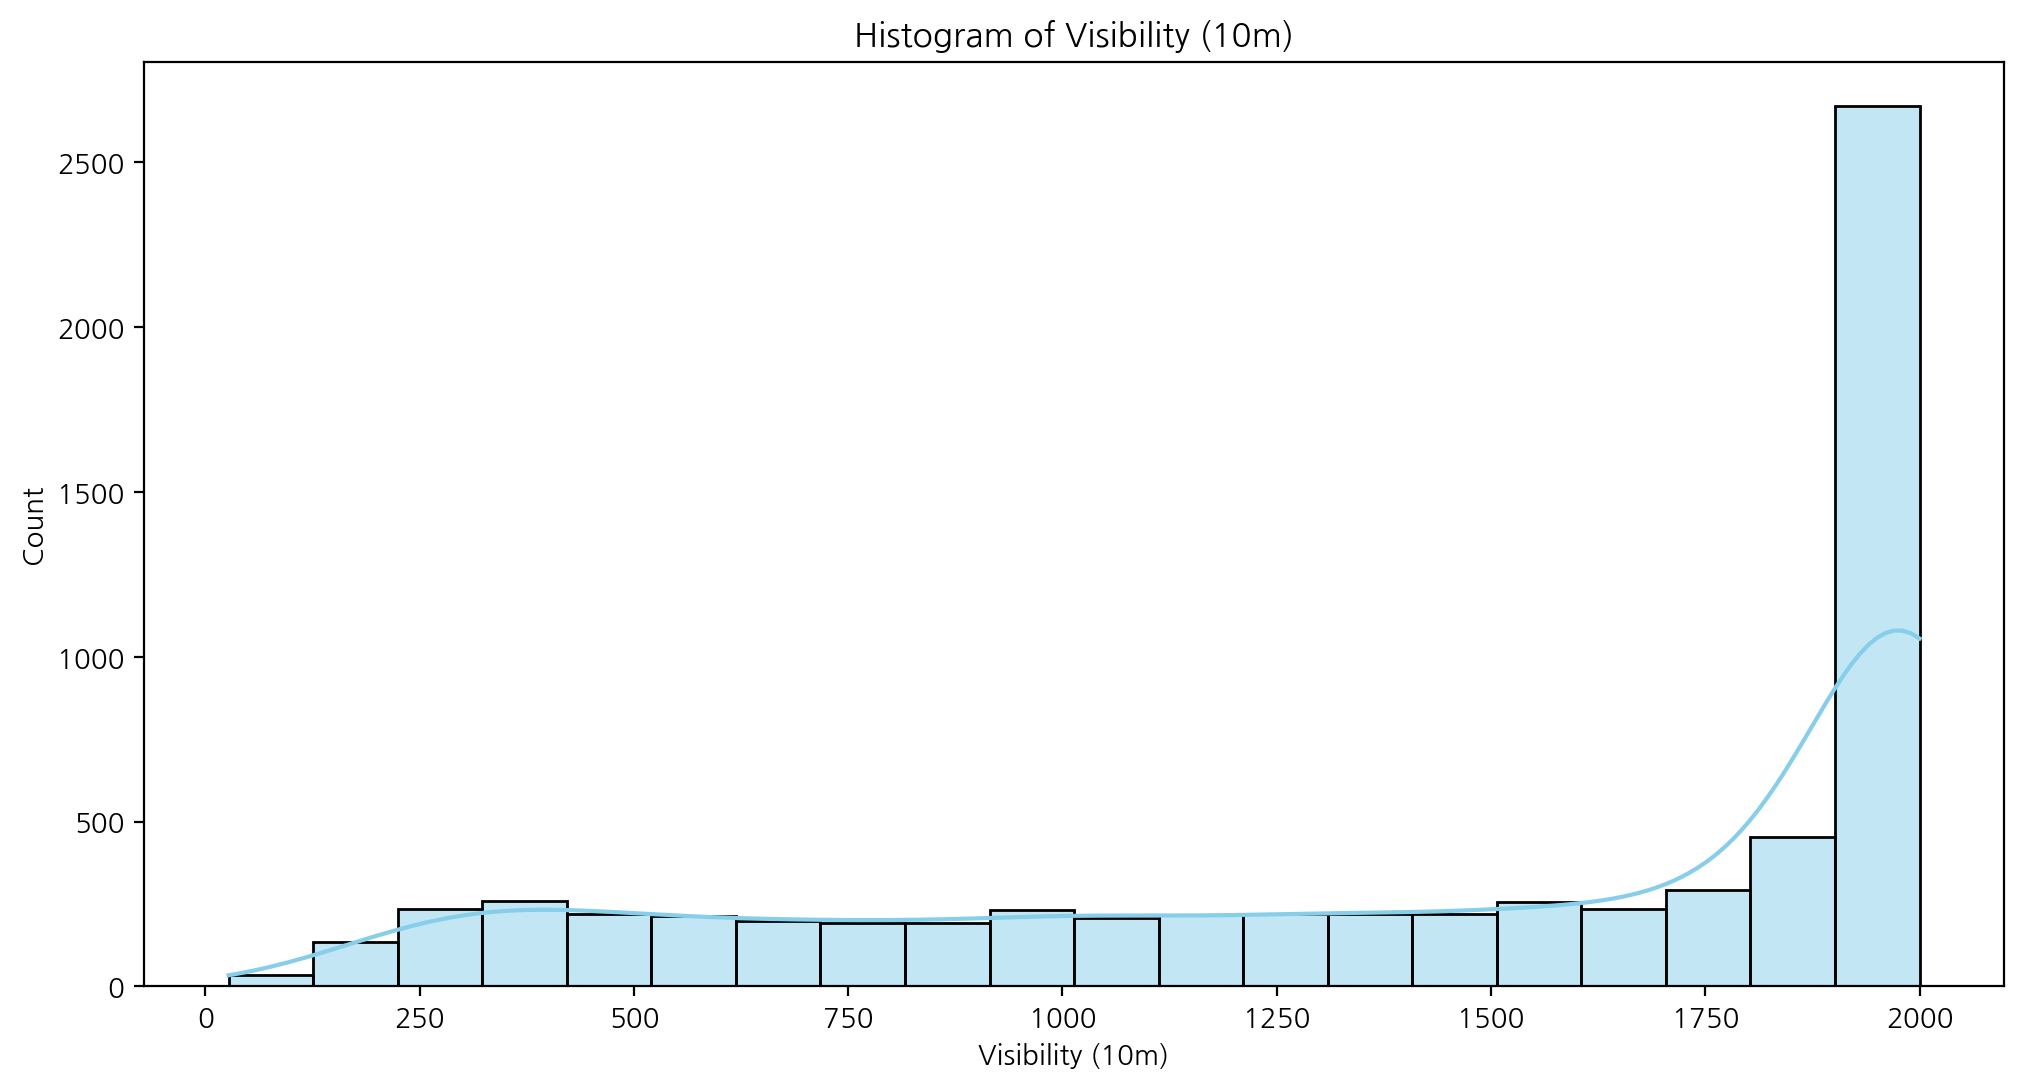

In [95]:
# 히스토그램
plt.figure(figsize=(12, 6))
sns.histplot(df4['Visibility (10m)'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Visibility (10m)')

위 자료들을 통해 가시거리는 보통 1875~2000 사이 수치의 데이터가 가장 많이 발생한다는 사실을 알 수 있다.

<Axes: xlabel='Visibility (10m)', ylabel='Rented Bike Count'>

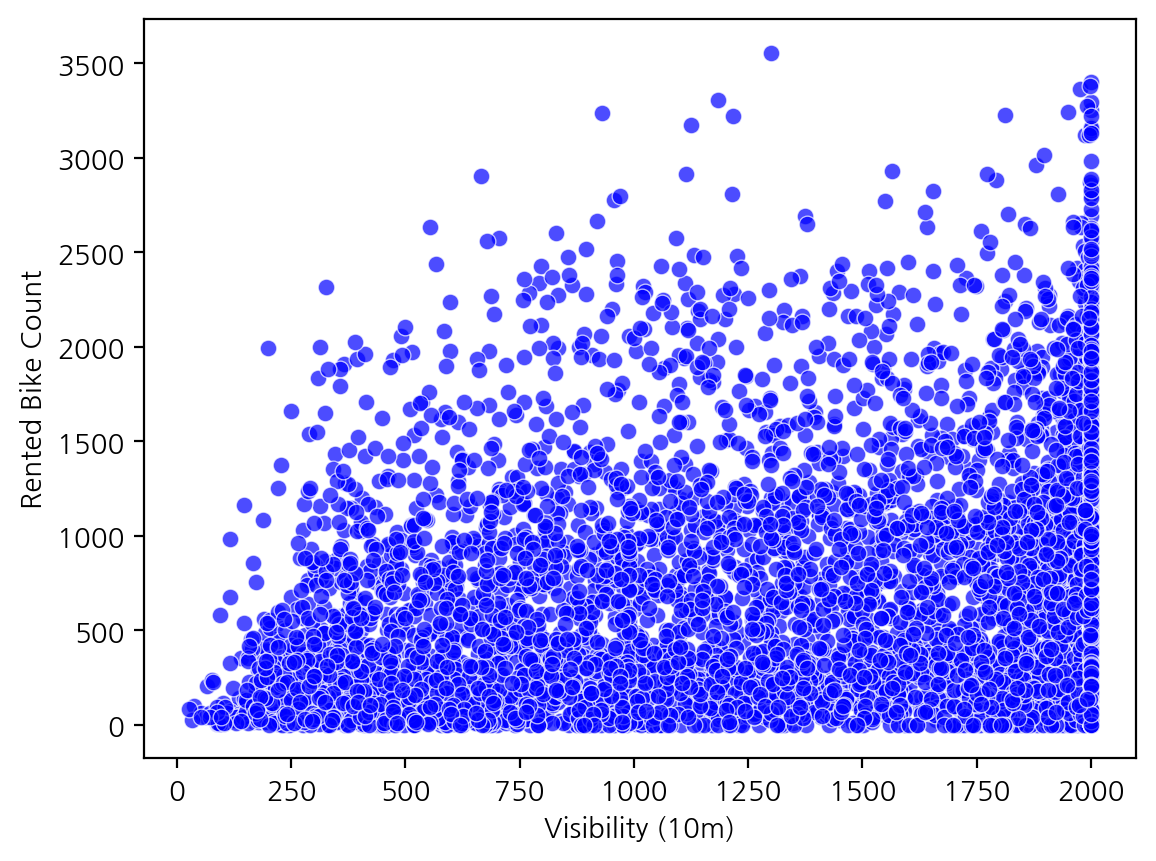

In [104]:
sns.scatterplot(x='Visibility (10m)', y='Rented Bike Count', data=df4, color='blue', alpha=0.7)

가시거리가 확보되지 않으면 자전거 대여 수가 감소할 것이라고 예측했으나, 가시거리 데이터가 1875~2000 수치에 몰려 있는 것에 비하면, 자전거 대여 수는 변동 폭이 크지 않음.

**둘은 유의미한 상관 관계가 없다는 사실 확인. 가설 기각**

### 1 -(7) Solar Radiation (MJ/m2) 변수 EDA

<Axes: ylabel='Solar Radiation (MJ/m2)'>

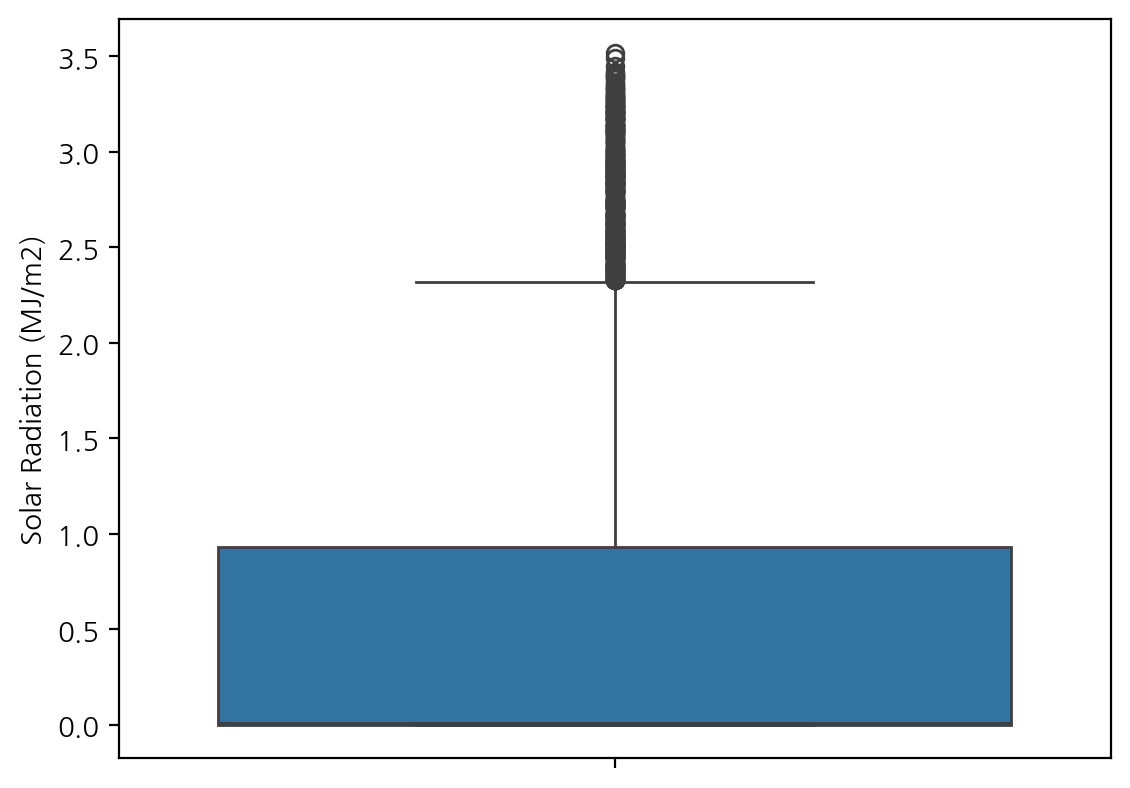

In [106]:
sns.boxplot(df4['Solar Radiation (MJ/m2)'])

이상치가 의심됨.

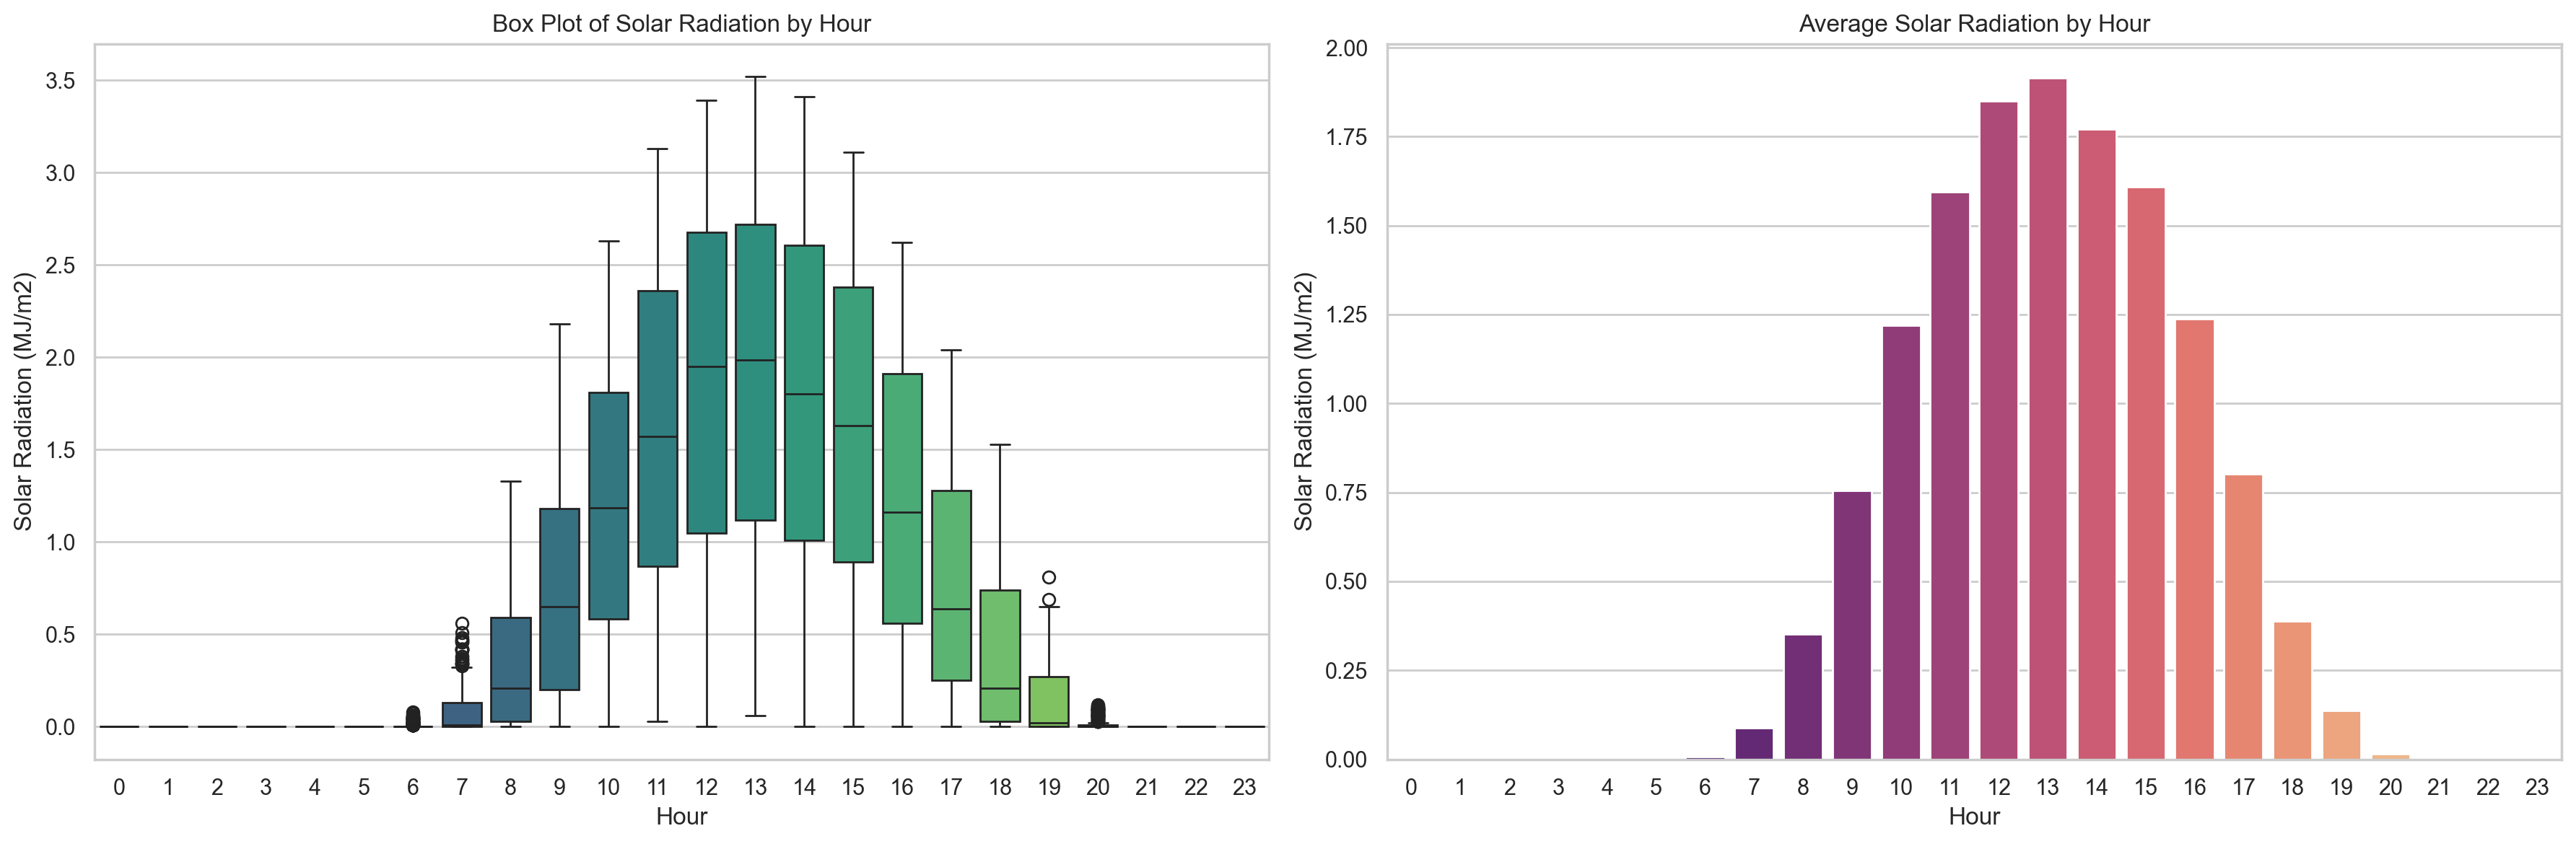

In [111]:
# 시간대별 평균 Solar Radiation 계산
hourly_avg = df4.groupby('Hour')['Solar Radiation (MJ/m2)'].mean().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))

# 박스 플롯
plt.subplot(1, 2, 1)
sns.boxplot(x='Hour', y='Solar Radiation (MJ/m2)', data=df4, palette='viridis')
plt.title('Box Plot of Solar Radiation by Hour')
plt.xlabel('Hour')
plt.ylabel('Solar Radiation (MJ/m2)')

# 바 차트
plt.subplot(1, 2, 2)
sns.barplot(x='Hour', y='Solar Radiation (MJ/m2)', data=hourly_avg, palette='magma')
plt.title('Average Solar Radiation by Hour')
plt.xlabel('Hour')
plt.ylabel('Solar Radiation (MJ/m2)')

plt.tight_layout()
plt.show()

주로 오전과 오후에 편차가 있음

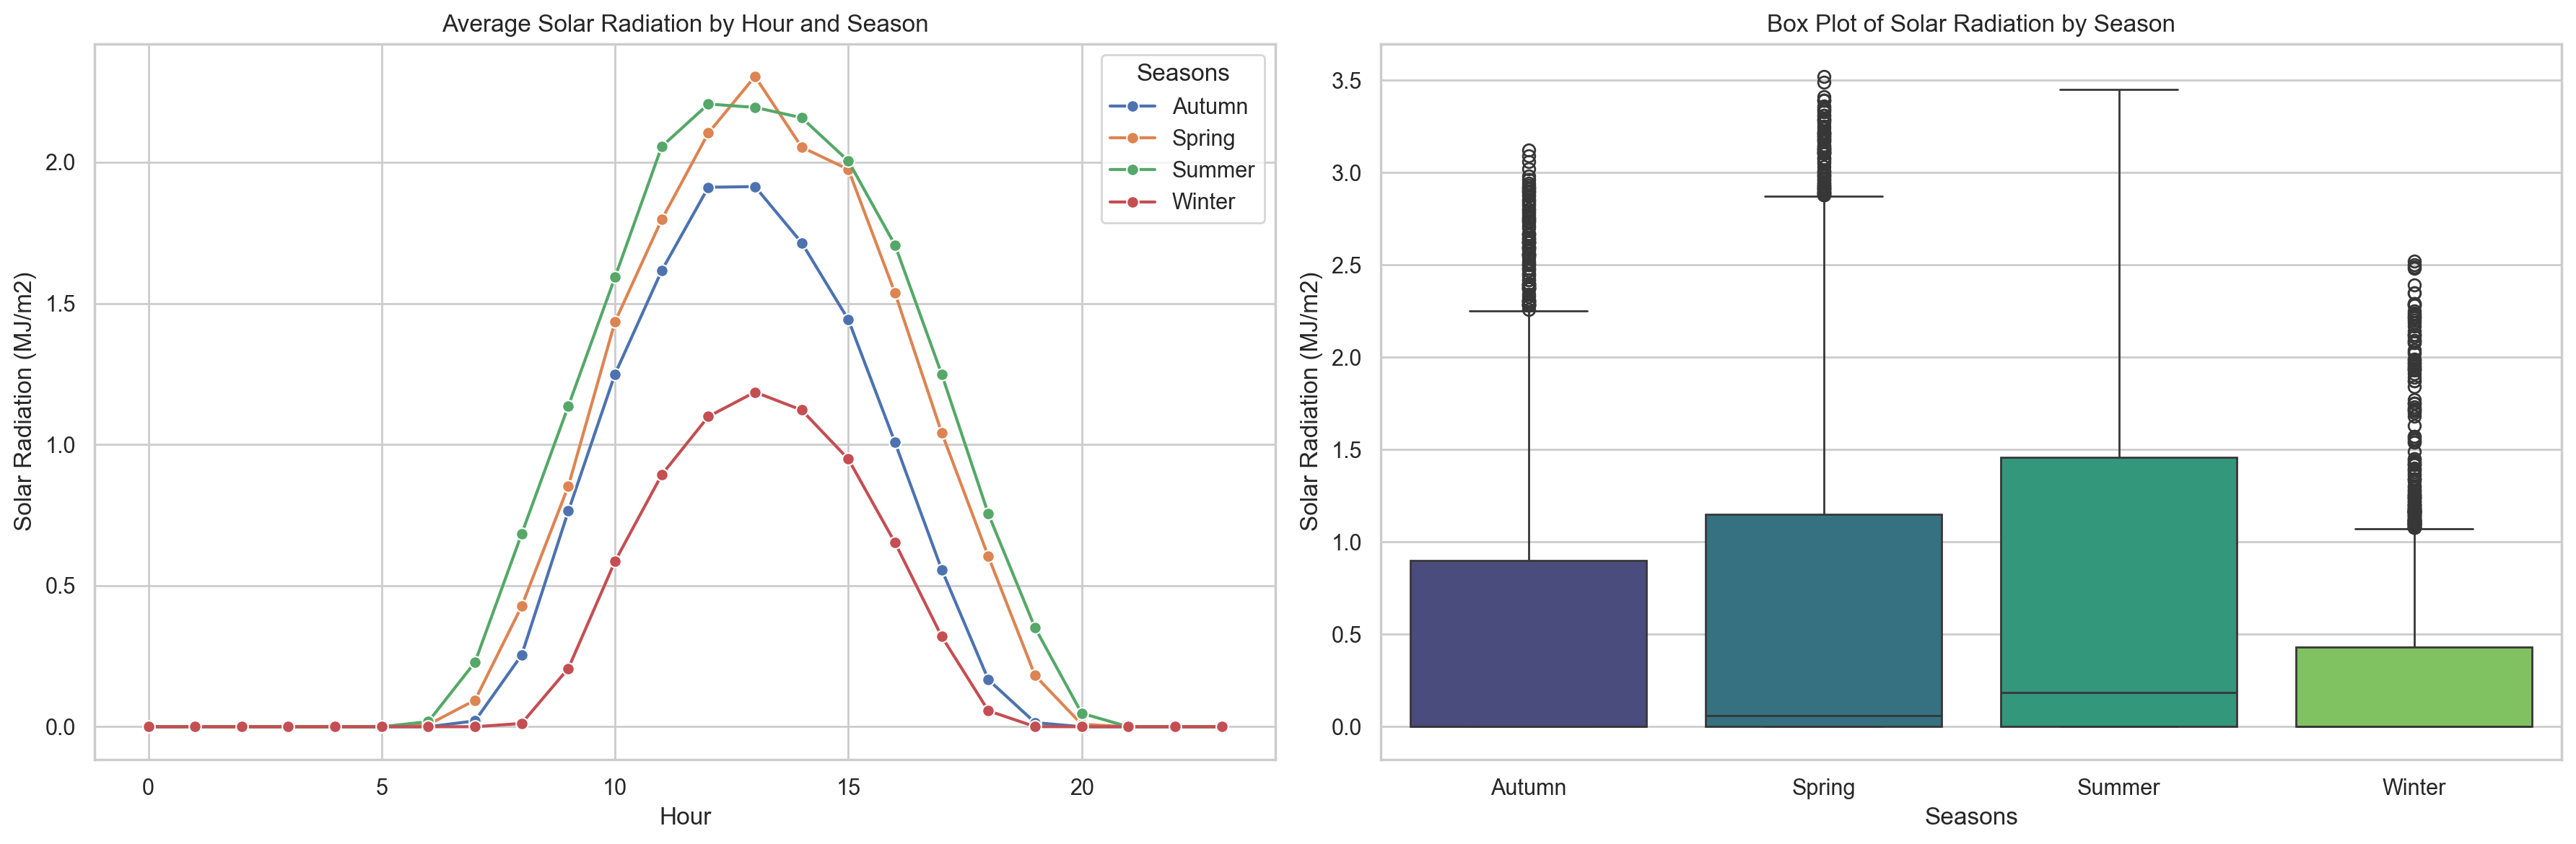

In [112]:
# 시간대별, 계절별 평균 Solar Radiation 계산
hourly_season_avg = df4.groupby(['Seasons', 'Hour'])['Solar Radiation (MJ/m2)'].mean().reset_index()

# 시각화 스타일 설정
sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))

# 라인 차트 (시간대별 평균을 계절별로 시각화)
plt.subplot(1, 2, 1)
sns.lineplot(x='Hour', y='Solar Radiation (MJ/m2)', hue='Seasons', data=hourly_season_avg, marker='o')
plt.title('Average Solar Radiation by Hour and Season')
plt.xlabel('Hour')
plt.ylabel('Solar Radiation (MJ/m2)')

# 박스 플롯 (계절별 분포 시각화)
plt.subplot(1, 2, 2)
sns.boxplot(x='Seasons', y='Solar Radiation (MJ/m2)', data=df4, palette='viridis')
plt.title('Box Plot of Solar Radiation by Season')
plt.xlabel('Seasons')
plt.ylabel('Solar Radiation (MJ/m2)')

plt.tight_layout()
plt.show()

주로 오전과 오후에 편차가 있는 점과 계절별로 시각화 했을 때 변화가 확연히 드러나는 점을 미루어 봤을 때, 단순한 이상치로 처리할 수 없음. 계절별로 드러나는 당연한 변화임을 알 수 있음.

### 1 - (8) Rainfall(mm), Snowfall (cm) 변수 EDA
- 두 변수는 비슷한 히스토그램 형태이나, 함께 내리는 날은 많지 않음

<Axes: ylabel='Rainfall(mm)'>

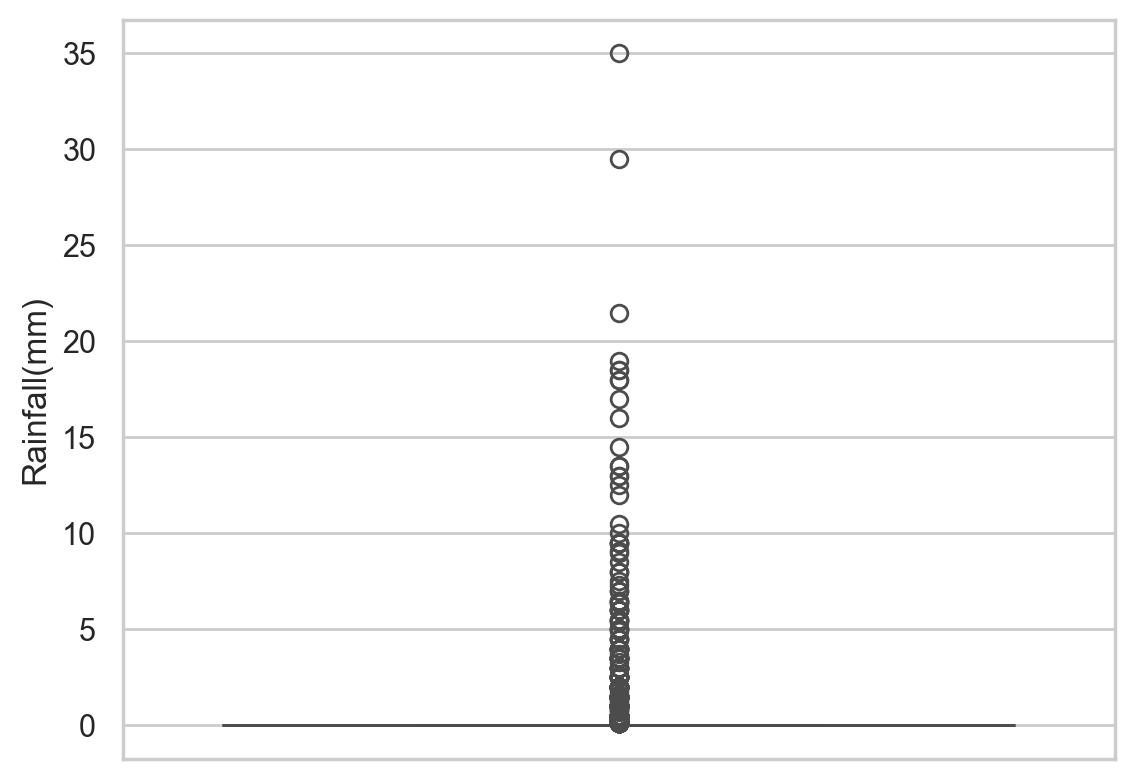

In [114]:
sns.boxplot(df4['Rainfall(mm)'])

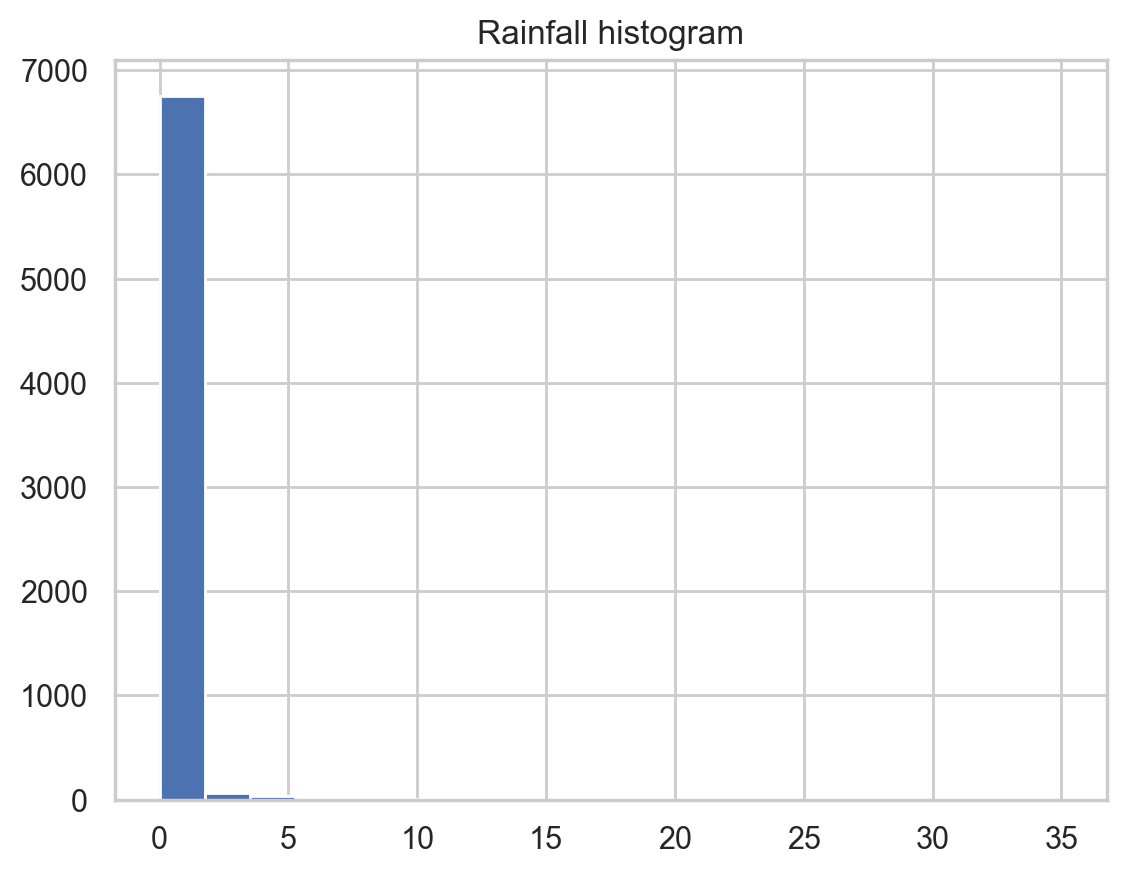

In [118]:
plt.hist(df4['Rainfall(mm)'],bins=20)
plt.title('Rainfall histogram',fontsize=12)
plt.show()

비는 내리지 않은 날이 대부분이라 박스플롯으로는 이상치가 많아보이나, 이상치는 아님.

<Axes: ylabel='Snowfall (cm)'>

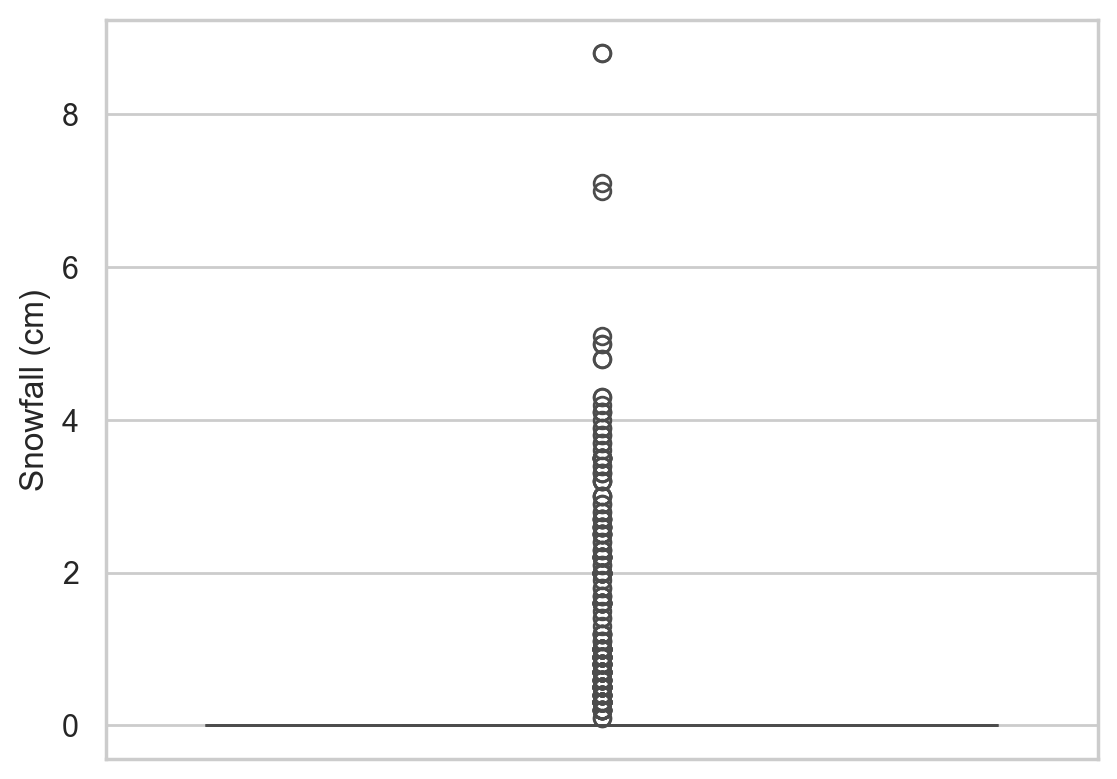

In [119]:
sns.boxplot(df4['Snowfall (cm)'])

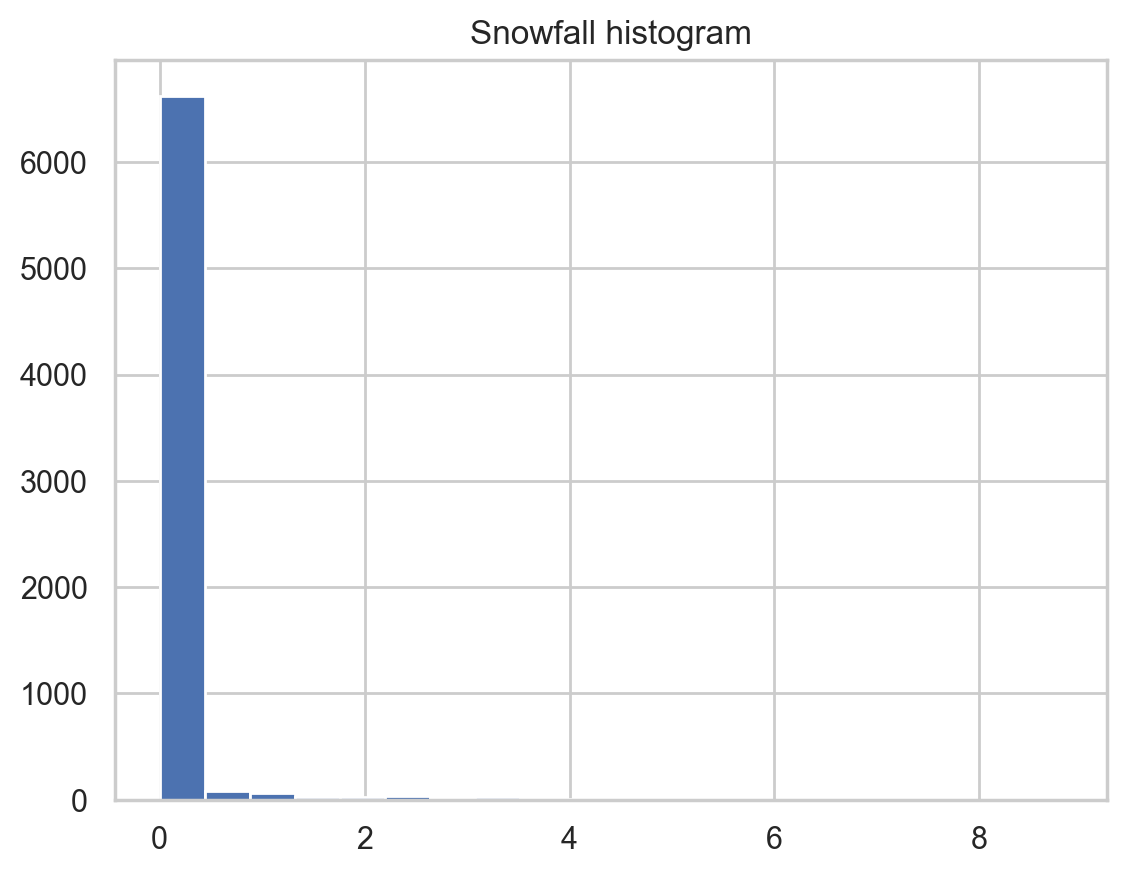

In [120]:
plt.hist(df4['Snowfall (cm)'],bins=20)
plt.title('Snowfall histogram',fontsize=12)
plt.show()

Snowfall (cm) 변수도 위와 비슷한 양상을 보임.

In [122]:
rain=df4[(df4['Rainfall(mm)'] > 0)]
snow=df4[(df4['Snowfall (cm)'] > 0)]
both=df4[(df4['Rainfall(mm)'] > 0) & (df4['Snowfall (cm)'] > 0)]
num1=rain.shape[0]
num2=snow.shape[0]
num3=both.shape[0]

print(f"비 : {num1}, 눈 : {num2}, 비와 눈 : {num3}")

비 : 418, 눈 : 345, 비와 눈 : 24


두 변수는 히스토그램에서는 비슷한 양상을 보이지만 함께 내린 날은 별로 없음.

### 1 - (9) Seasons 변수 EDA
- 겨울에는 자전거 비치 수를 줄이고 고장난 부품을 고치는 등의 재정비를 하는 편이 효율적일 수 있다.

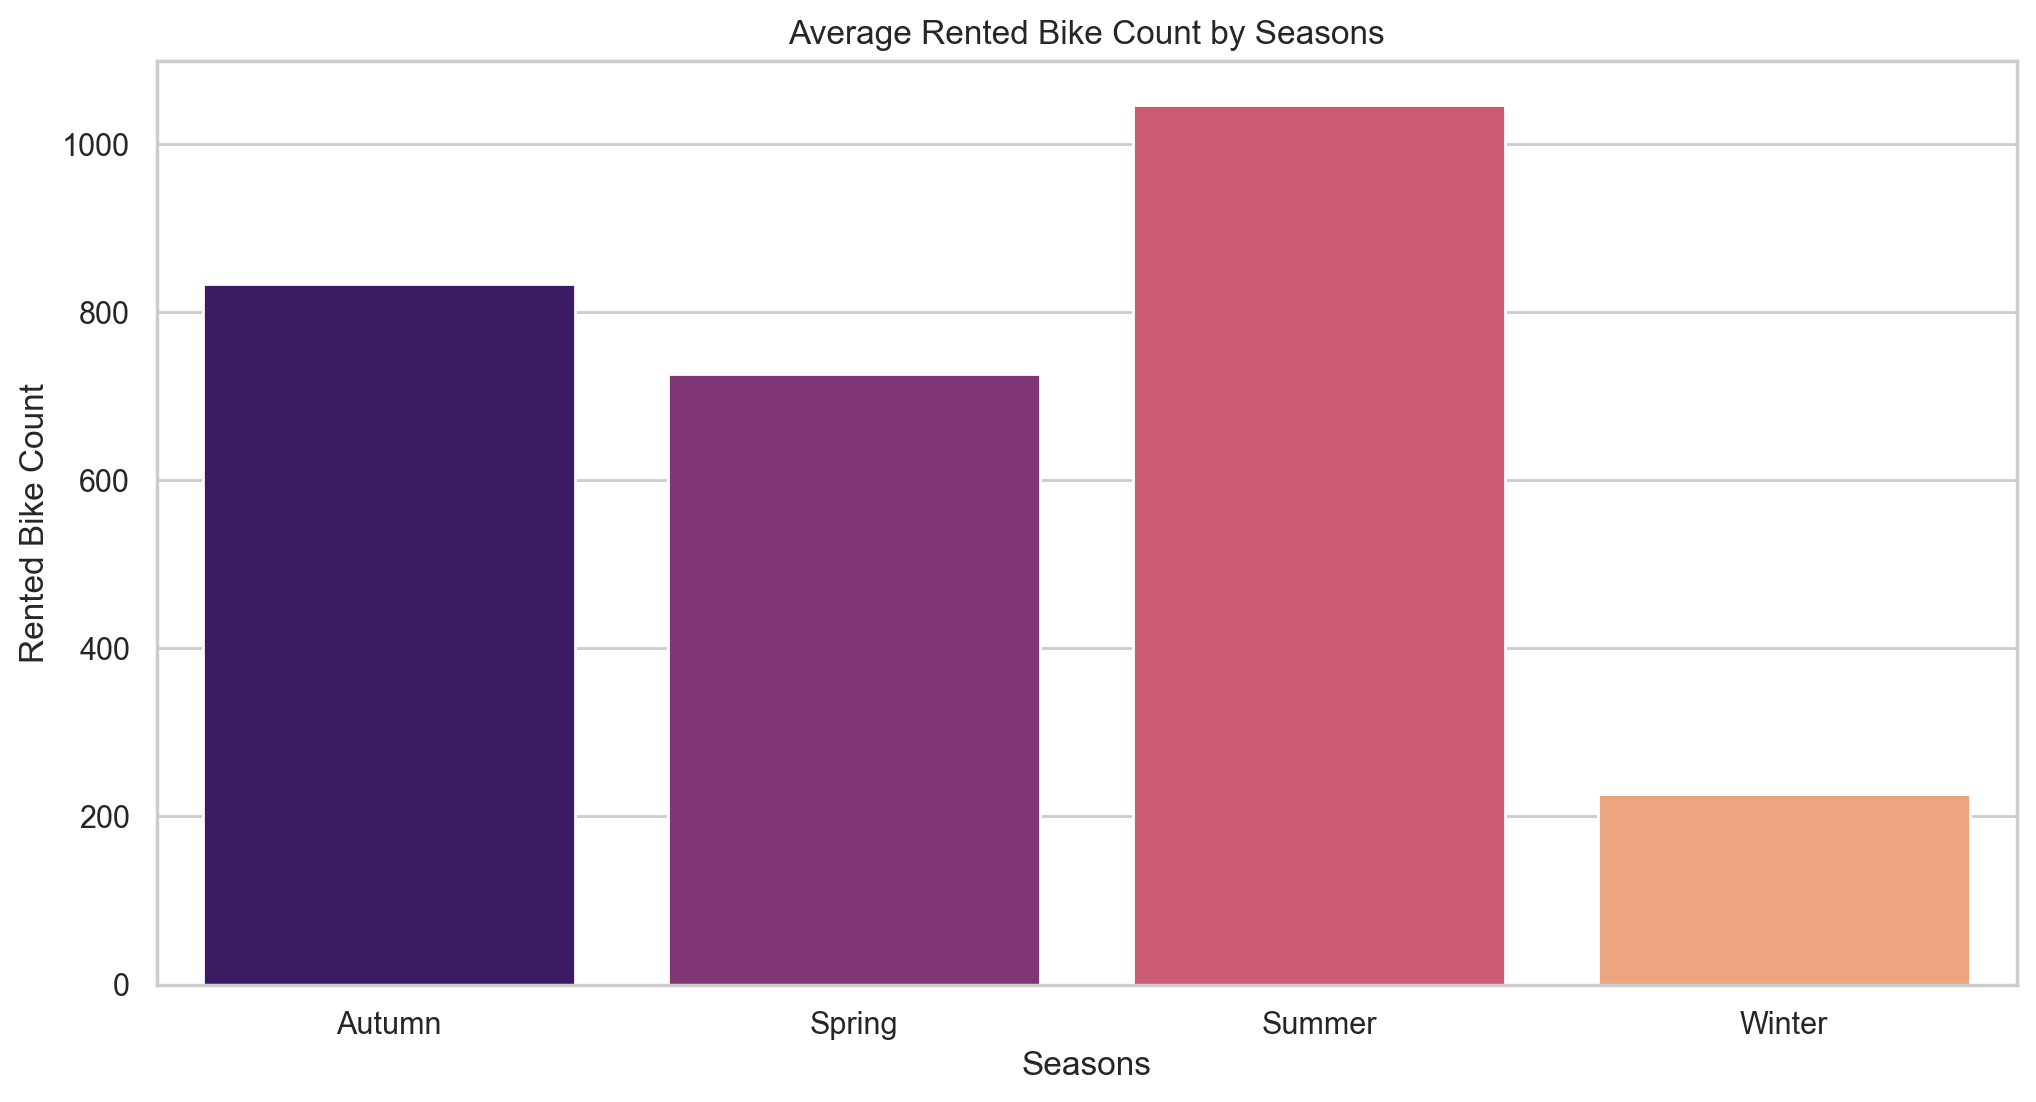

In [127]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# 계절별 자전거 대여 횟수 평균 시각화
seasonal_avg = df4.groupby('Seasons')['Rented Bike Count'].mean().reset_index()
sns.barplot(x='Seasons', y='Rented Bike Count', data=seasonal_avg, palette='magma')
plt.title('Average Rented Bike Count by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')

plt.show()

결측치를 전부 채운 후에 다시 바 차트를 그려봤다. 이는 자전거 대여량이 폭염보다는 한파에 더 큰 영향을 받는다는 확실한 근거로 쓰일 수 있다. 이를 통해, 겨울에는 자전거를 대량 수거해 재정비를 하는 편이 효율적이라는 판단을 할 수 있다.

### 1 - (10) Holiday 변수 EDA
- 공휴일에는 여가생활로 자전거를 타러 나올 수 있기 떄문에 자전거 대여 수도 더 많을 수 있다고 예측함

Holiday
No Holiday    6590
Holiday        319
Name: count, dtype: int64


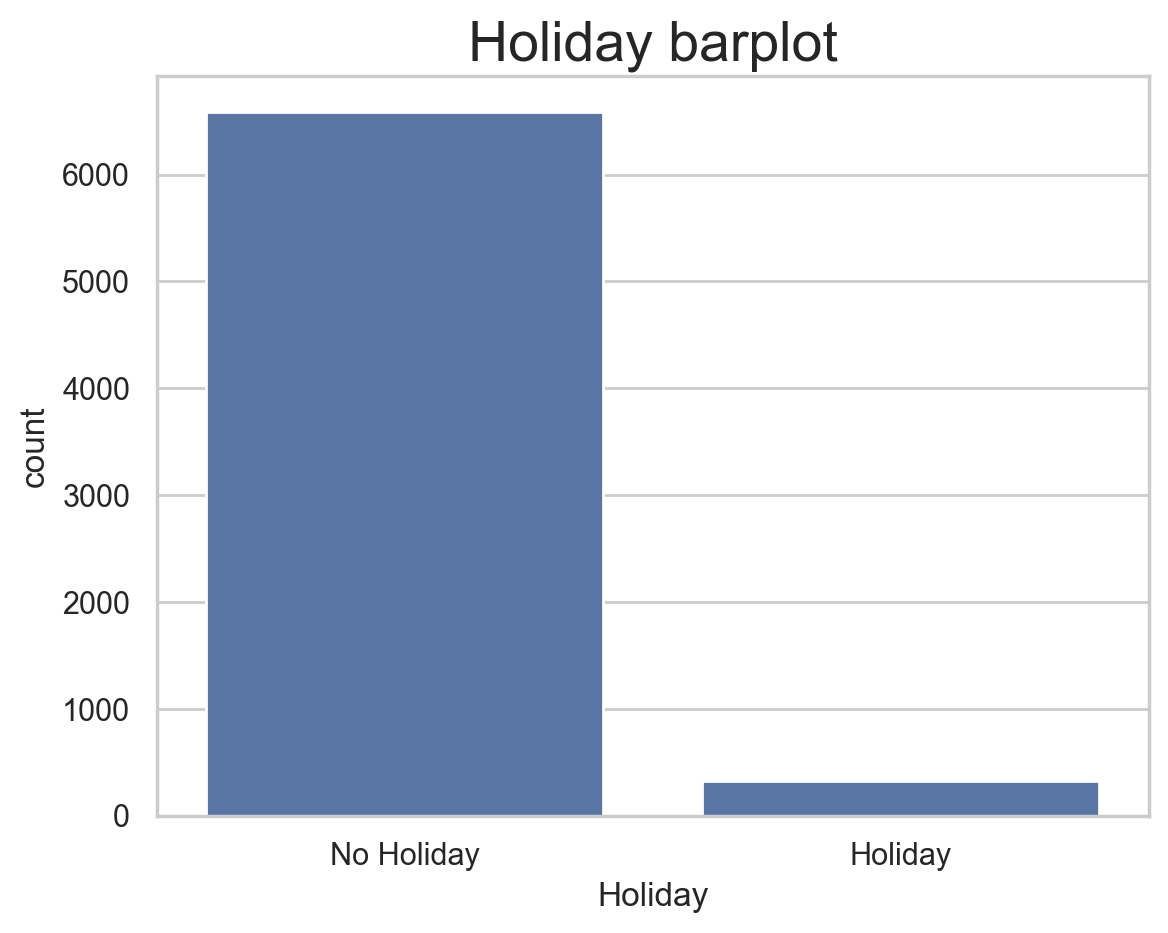

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

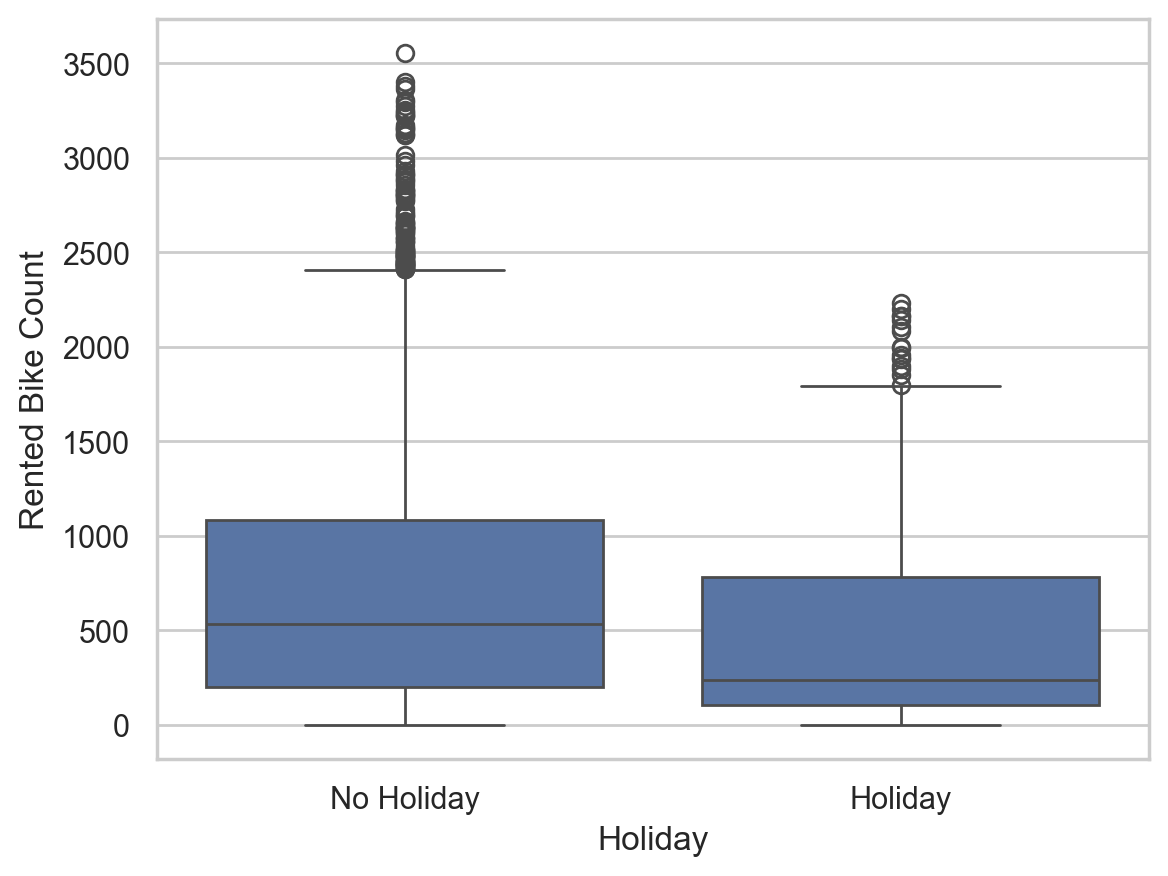

In [130]:
print(df4['Holiday'].value_counts())
#시각화
sns.countplot(x='Holiday',data=df4)
plt.title('Holiday barplot',fontsize=20)
plt.show()

#Rented Bike Count와의 관계 살펴보기
sns.boxplot(x='Holiday',y='Rented Bike Count',data=df4)

확실히, 집계된 데이터들이 공휴일이 아닌 날이 압도적으로 많은 것에 비하면 둘의 중위수가 큰 차이가 나지 않는다.

### 1 - (11) Functioning Day 변수 EDA
- Holiday 변수는 Functioning Day 변수와 유의미한 상관 관계가 있을 것이라 예측함
- 공휴일에는 자전거 대여도 중단할 수 있기 떄문
- 운영하지 않는 날은 계절별로 고르게 분포할 것이라고 예상함

Functioning Day
Yes    6673
No      236
Name: count, dtype: int64


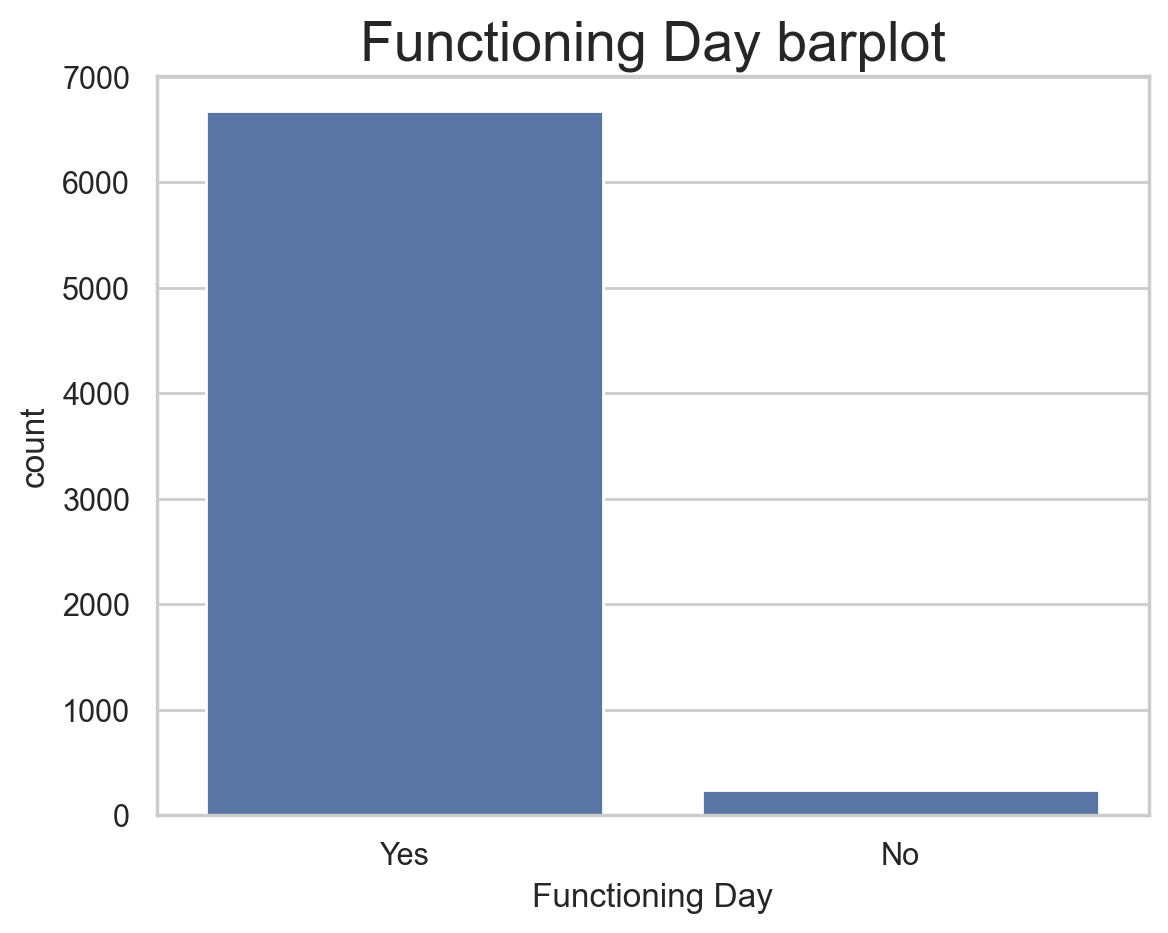

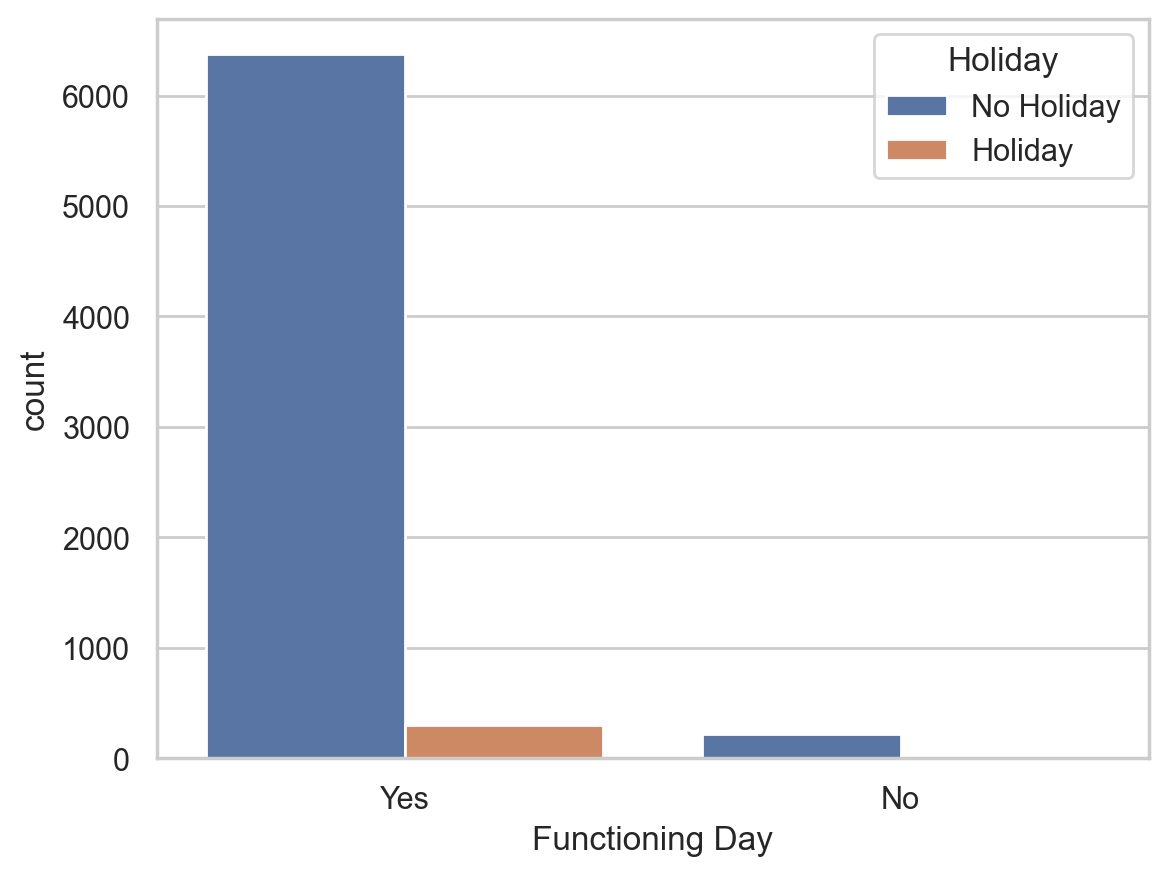

Functioning Day  Holiday   
Yes              No Holiday    6462
                 Holiday        310
No               No Holiday     217
                 Holiday         19
Name: count, dtype: int64


In [132]:
print(df4['Functioning Day'].value_counts())
#시각화
sns.countplot(x='Functioning Day',data=df4)
plt.title('Functioning Day barplot',fontsize=20)
plt.show()
#공휴일과 관련이 있는지 살펴보기
sns.countplot(x='Functioning Day', hue='Holiday', data=df4)
plt.show()
print(data[['Functioning Day','Holiday']].value_counts())

예상과 달리, 공휴일은 운영하지 않는 날과 크게 관련이 없음. 

<Axes: xlabel='Seasons', ylabel='count'>

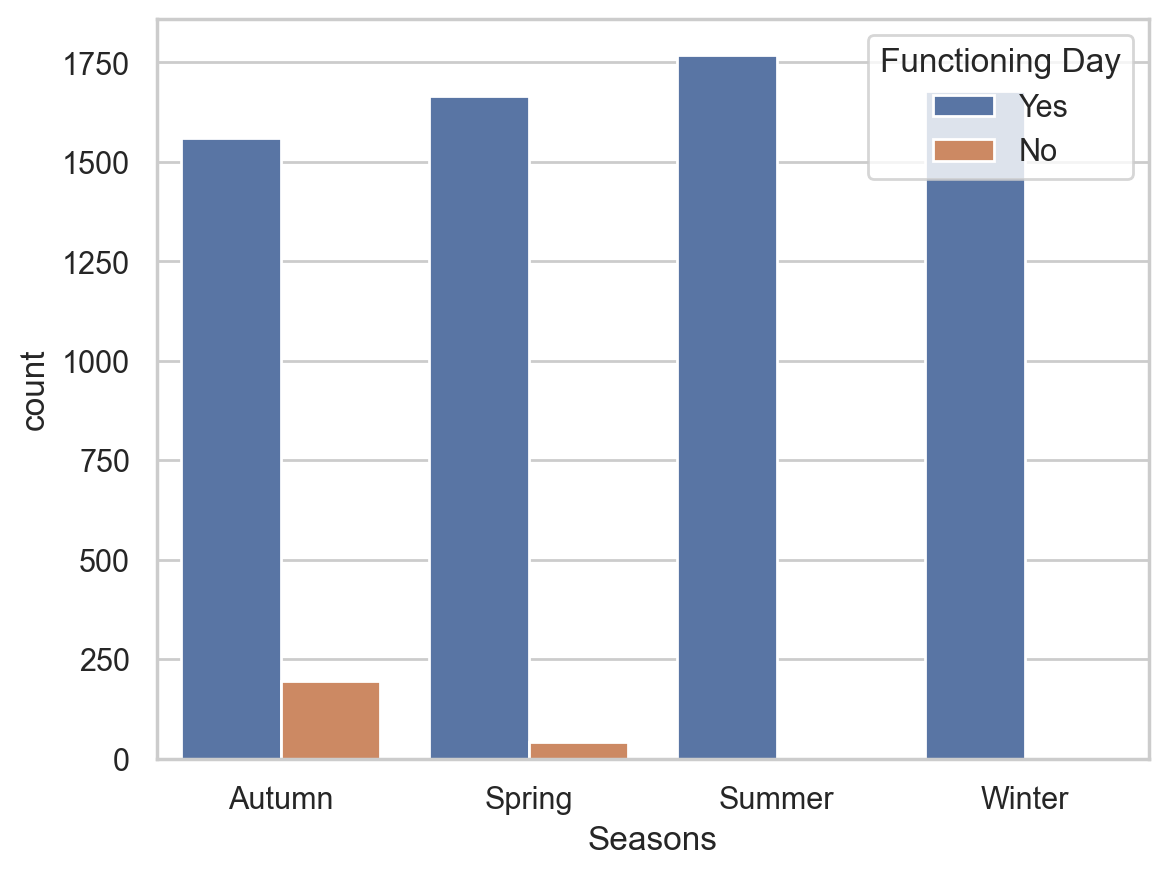

In [133]:
sns.countplot(x='Seasons',hue='Functioning Day',data=df4)
#봄과 가을만 운영하지 않는 날이 있고, 특히 가을에 많음

예상과 달리, 운영하지 않는 날은 계절별로 고르게 분포하지 않음. 봄과 가을에만 분포되어있고, 특히 가을에 많음.

**이로써 피드백을 최대한 반영해 모든 변수 EDA와 1차 전처리 과제를 다시 완성했다. 이제 모델링을 위한 2차 전처리를 해보겠다.**

1차 전처리가 완료된 데이터 저장

In [138]:
import os

user_name= os.getlogin()
desktop_path= f"C:/Users/조현서/Desktop"
csv_file = os.path.join(desktop_path, "train_1.csv")
df4.to_csv(csv_file, index=False)

# 2. 모델링을 위한 2차 전처리

## 선형 회귀 모델

선형 회귀 모델에서는 산점도가 선형성을 띨때 가장 데이터의 경향성에 유사한 선을 찾는다
이 모델을 y= ax+b 라고 둔다

x1이라는 독립변수를 대입하여 y'1 라는 예측값을 구한다.

x1의 원래 데이터 값 y1과 y'1과의 error를 줄인다

[장점] : 데이터가 많은 모델도 학습 속도와 예측이 빠름, 데이터에 비해 특성이 많을 때 학습이 잘됨.

[단점] : 데이터셋의 특성이 서로 연관되어 있으면 계수 분석이 어려울 수 있음.

통상적으로는 표준화를 통해 이상치를 제거하고, 그 다음 데이터를 정규화 해 상대적 크기에 대한 영향력을 줄인 다음 분석을 시작한다.

**변수설명**
- ~Date : 날짜(년,월,일)~
- Year_Month : 년도와 월만 결합한 날짜
- Rented Bike Count : 자전거 대여량
- Hour : 대여한 시각(0시는 24시)
- Temperature(°C) : 기온
- Humidity(%) : 상대습도
- Wind speed (m/s) : 풍속
- Visibility (10m) : 가시거리
- Dew point temperature(°C) : 이슬점
- Solar Radiation (MJ/m2) : 일사량
- Rainfall(mm) : 강우량
- Snowfall (cm) : 강설량
- Seasons : 계절
- Holiday : 공휴일
- Functioning Day : 운영일

* Rainfall(mm), Snowfall (cm), Holiday, Functioning Day 변수들은 빈도가 낮긴 하지만, 섣불리 제외하긴 힘들다고 판단함.
* Date변수는 원-핫 인코딩 과정에서 문제가 생겨, 이는 모델링에 사용하지 않고, 년도와 월만 결합한 날짜변수로 새로 만든 Year_Month변수를 사용함.

### 라이브러리 설치

In [139]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

### 데이터 불러오기

In [175]:
data=pd.read_csv("train_1.csv")
data

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     2018-10-24               1492    16        -6.856467           42   
1     2018-05-01               1536    14        23.000000           64   
2     2018-11-14                327     2         6.200000           59   
3     2018-08-31                170     4        23.200000           83   
4     2018-06-26                 45     5        23.700000           64   
...          ...                ...   ...              ...          ...   
6904  2018-02-08                255     7        -9.600000           67   
6905  2018-03-28                104     4        10.600000           77   
6906  2018-04-30                569     0        14.700000           54   
6907  2018-05-29               2234     8        20.500000           66   
6908  2018-09-20               1290    17        19.300000           76   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  1.3              1976                        5.0   
1                  2.8               520                       15.8   
2                  0.6              1584                       -1.2   
3                  1.6              1102                       20.1   
4                  0.9               876                       16.4   
...                ...               ...                        ...   
6904               1.0              1503                      -14.5   
6905               0.9               422                        6.7   
6906               1.3               718                        5.4   
6907               1.7              1062                       13.9   
6908               2.1              2000                       14.9   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                        1.22           0.0            0.0  Autumn   
1                        1.59           0.0            0.0  Spring   
2                        0.00           0.0            0.0  Autumn   
3                        0.00           0.0            0.0  Summer   
4                        0.00           0.1            0.0  Summer   
...                       ...           ...            ...     ...   
6904                     0.00           0.0            0.0  Winter   
6905                     0.00           0.0            0.0  Spring   
6906                     0.00           0.0            0.0  Spring   
6907                     0.34           0.0            0.0  Spring   
6908                     0.21           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1        Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
6904  No Holiday             Yes  
6905  No Holiday             Yes  
6906  No Holiday             Yes  
6907  No Holiday             Yes  
6908  No Holiday             Yes  

[6909 rows x 14 columns]

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6909 entries, 0 to 6908
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       6909 non-null   object 
 1   Rented Bike Count          6909 non-null   int64  
 2   Hour                       6909 non-null   int64  
 3   Temperature(°C)            6909 non-null   float64
 4   Humidity(%)                6909 non-null   int64  
 5   Wind speed (m/s)           6909 non-null   float64
 6   Visibility (10m)           6909 non-null   int64  
 7   Dew point temperature(°C)  6909 non-null   float64
 8   Solar Radiation (MJ/m2)    6909 non-null   float64
 9   Rainfall(mm)               6909 non-null   float64
 10  Snowfall (cm)              6909 non-null   float64
 11  Seasons                    6909 non-null   object 
 12  Holiday                    6909 non-null   object 
 13  Functioning Day            6909 non-null   objec

## 범주형 데이터 수치화
- 명목형 변수 : Date, Seasons, Holiday, Functioning Day
- 순서형 변수 : X

해당 데이터에는 순서형 변수가 존재하지 않는다. 따라서 명목형 변수를 수치화할 때 사용하는 One-Hot Encoding을 사용한다.

In [145]:
#Date, Seasons, Holiday, Functioning Day 변수를 더미변수화
df_dummy = pd.get_dummies(data[["Date", "Seasons", "Holiday", "Functioning Day"]])
df_dummy=df_dummy.astype(int)
df_dummy

Date_2017-12-01  Date_2017-12-02  Date_2017-12-03  Date_2017-12-04  \
0                   0                0                0                0   
1                   0                0                0                0   
2                   0                0                0                0   
3                   0                0                0                0   
4                   0                0                0                0   
...               ...              ...              ...              ...   
6904                0                0                0                0   
6905                0                0                0                0   
6906                0                0                0                0   
6907                0                0                0                0   
6908                0                0                0                0   

      Date_2017-12-05  Date_2017-12-06  Date_2017-12-07  Date_2017-12-08  \
0                   0                0                0                0   
1                   0                0                0                0   
2                   0                0                0                0   
3                   0                0                0                0   
4                   0                0                0                0   
...               ...              ...              ...              ...   
6904                0                0                0                0   
6905                0                0                0                0   
6906                0                0                0                0   
6907                0                0                0                0   
6908                0                0                0                0   

      Date_2017-12-09  Date_2017-12-10  ...  Date_2018-11-29  Date_2018-11-30  \
0                   0                0  ...                0                0   
1                   0                0  ...                0                0   
2                   0                0  ...                0                0   
3                   0                0  ...                0                0   
4                   0                0  ...                0                0   
...               ...              ...  ...              ...              ...   
6904                0                0  ...                0                0   
6905                0                0  ...                0                0   
6906                0                0  ...                0                0   
6907                0                0  ...                0                0   
6908                0                0  ...                0                0   

      Seasons_Autumn  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0                  1               0               0               0   
1                  0               1               0               0   
2                  1               0               0               0   
3                  0               0               1               0   
4                  0               0               1               0   
...              ...             ...             ...             ...   
6904               0               0               0               1   
6905               0               1               0               0   
6906               0               1               0               0   
6907               0               1               0               0   
6908               1               0               0               0   

      Holiday_Holiday  Holiday_No Holiday  Functioning Day_No  \
0                   0                   1                   0   
1                   1                   0                   0   
2                   0                   1                   0   
3                   0                   1                   0   
4                

우선 원-핫 인코딩을 통해 더미변수를 생성해봤는데, Date변수 때문에 너무 많은 열이 생성됐다.

데이터의 차원이 증가하면 모델의 복잡도가 증가하고, 성능이 저하될 수 있기 때문에, Date변수에서 년도와 월만을 결합해 새로운 파생 변수를 만들겠다.

In [176]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year_Month'] = data['Date'].dt.strftime('%Y-%m')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6909 entries, 0 to 6908
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       6909 non-null   datetime64[ns]
 1   Rented Bike Count          6909 non-null   int64         
 2   Hour                       6909 non-null   int64         
 3   Temperature(°C)            6909 non-null   float64       
 4   Humidity(%)                6909 non-null   int64         
 5   Wind speed (m/s)           6909 non-null   float64       
 6   Visibility (10m)           6909 non-null   int64         
 7   Dew point temperature(°C)  6909 non-null   float64       
 8   Solar Radiation (MJ/m2)    6909 non-null   float64       
 9   Rainfall(mm)               6909 non-null   float64       
 10  Snowfall (cm)              6909 non-null   float64       
 11  Seasons                    6909 non-null   object        
 12  Holida

다시 인코딩

In [177]:
ohe = OneHotEncoder(sparse_output=False) 

result_ohe = ohe.fit_transform(data[["Year_Month", "Seasons", "Holiday", "Functioning Day"]])
result_ohe


array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [178]:
#각 변수들의 카테고리가 학습된 것을 확인
ohe.categories_

[array(['2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05',
        '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11'],
       dtype=object),
 array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object),
 array(['Holiday', 'No Holiday'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [179]:
#result_ohe을 데이터프레임으로 변환
df_ohe = pd.DataFrame(result_ohe, columns=ohe.get_feature_names_out(["Year_Month", "Seasons", "Holiday", "Functioning Day"]))
df_ohe = df_ohe.astype('uint8')
df_ohe

Year_Month_2017-12  Year_Month_2018-01  Year_Month_2018-02  \
0                      0                   0                   0   
1                      0                   0                   0   
2                      0                   0                   0   
3                      0                   0                   0   
4                      0                   0                   0   
...                  ...                 ...                 ...   
6904                   0                   0                   1   
6905                   0                   0                   0   
6906                   0                   0                   0   
6907                   0                   0                   0   
6908                   0                   0                   0   

      Year_Month_2018-03  Year_Month_2018-04  Year_Month_2018-05  \
0                      0                   0                   0   
1                      0                   0                   1   
2                      0                   0                   0   
3                      0                   0                   0   
4                      0                   0                   0   
...                  ...                 ...                 ...   
6904                   0                   0                   0   
6905                   1                   0                   0   
6906                   0                   1                   0   
6907                   0                   0                   1   
6908                   0                   0                   0   

      Year_Month_2018-06  Year_Month_2018-07  Year_Month_2018-08  \
0                      0                   0                   0   
1                      0                   0                   0   
2                      0                   0                   0   
3                      0                   0                   1   
4                      1                   0                   0   
...                  ...                 ...                 ...   
6904                   0                   0                   0   
6905                   0                   0                   0   
6906                   0                   0                   0   
6907                   0                   0                   0   
6908                   0                   0                   0   

      Year_Month_2018-09  Year_Month_2018-10  Year_Month_2018-11  \
0                      0                   1                   0   
1                      0                   0                   0   
2                      0                   0                   1   
3                      0                   0                   0   
4                      0                   0                   0   
...                  ...                 ...                 ...   
6904                   0                   0                   0   
6905                   0                   0                   0   
6906                   0                   0                   0   
6907                   0                   0                   0   
6908                   1                   0                   0   

      Seasons_Autumn  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0                  1               0               0               0   
1                  0               1               0               0   
2                  1               0               0               0   
3                  0               0               1               0   
4                  0               0               1               0   
...              ...             ...             ...             ...   
6904               0               0               0               1   
6905               0               1               0               0   
6906               0               1               0               0   
6907              

In [180]:
data_v1 = data.copy()

data_v1 = pd.concat([data_v1, df_ohe], axis=1)
data_v1

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2018-10-24               1492    16        -6.856467           42   
1    2018-05-01               1536    14        23.000000           64   
2    2018-11-14                327     2         6.200000           59   
3    2018-08-31                170     4        23.200000           83   
4    2018-06-26                 45     5        23.700000           64   
...         ...                ...   ...              ...          ...   
6904 2018-02-08                255     7        -9.600000           67   
6905 2018-03-28                104     4        10.600000           77   
6906 2018-04-30                569     0        14.700000           54   
6907 2018-05-29               2234     8        20.500000           66   
6908 2018-09-20               1290    17        19.300000           76   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  1.3              1976                        5.0   
1                  2.8               520                       15.8   
2                  0.6              1584                       -1.2   
3                  1.6              1102                       20.1   
4                  0.9               876                       16.4   
...                ...               ...                        ...   
6904               1.0              1503                      -14.5   
6905               0.9               422                        6.7   
6906               1.3               718                        5.4   
6907               1.7              1062                       13.9   
6908               2.1              2000                       14.9   

      Solar Radiation (MJ/m2)  Rainfall(mm)  ...  Year_Month_2018-10  \
0                        1.22           0.0  ...                   1   
1                        1.59           0.0  ...                   0   
2                        0.00           0.0  ...                   0   
3                        0.00           0.0  ...                   0   
4                        0.00           0.1  ...                   0   
...                       ...           ...  ...                 ...   
6904                     0.00           0.0  ...                   0   
6905                     0.00           0.0  ...                   0   
6906                     0.00           0.0  ...                   0   
6907                     0.34           0.0  ...                   0   
6908                     0.21           0.0  ...                   0   

     Year_Month_2018-11 Seasons_Autumn Seasons_Spring Seasons_Summer  \
0                     0              1              0              0   
1                     0              0              1              0   
2                     1              1              0              0   
3                     0              0              0              1   
4                     0              0              0              1   
...                 ...            ...            ...            ...   
6904                  0              0              0              0   
6905                  0              0              1              0   
6906                  0              0              1              0   
6907                  0              0              1              0   
6908                  0              1              0              0   

      Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  Functioning Day_No  \
0                  0                0                   1                   0   
1                  0                1                   0                   0   
2                  0                0                   1                   0   
3                  0                0                   1                   0   
4                  0                0                   1                   0   
...              ...              ...                

In [181]:
#Date 열 제거
data_final = data_v1.drop(["Date","Year_Month","Seasons","Holiday","Functioning Day"], axis=1)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6909 entries, 0 to 6908
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          6909 non-null   int64  
 1   Hour                       6909 non-null   int64  
 2   Temperature(°C)            6909 non-null   float64
 3   Humidity(%)                6909 non-null   int64  
 4   Wind speed (m/s)           6909 non-null   float64
 5   Visibility (10m)           6909 non-null   int64  
 6   Dew point temperature(°C)  6909 non-null   float64
 7   Solar Radiation (MJ/m2)    6909 non-null   float64
 8   Rainfall(mm)               6909 non-null   float64
 9   Snowfall (cm)              6909 non-null   float64
 10  Year_Month_2017-12         6909 non-null   uint8  
 11  Year_Month_2018-01         6909 non-null   uint8  
 12  Year_Month_2018-02         6909 non-null   uint8  
 13  Year_Month_2018-03         6909 non-null   uint8

### train, valid 셋 분리
- test셋 파일은 따로 있으므로, train_test_split을 한 번 진행함.
- 해당 작업을 통해 시간대별 자전거 대여 수를 예측해볼 수 있기 때문에 종속변수(y)는 Hour로 설정함.

In [191]:
#X(독립변수), y(종속변수)
X = data_final.drop("Hour", axis=1)
y = data_final["Hour"]

In [192]:
#train과 valid 셋 분리, 차원 확인
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, stratify=y, random_state=100)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(5527, 29) (1382, 29) (5527,) (1382,)


### 변수 스케일링

**Standard Scaler**

In [193]:
#객체 생성
ss = StandardScaler()

#학습 및 변환
X_train_ss = ss.fit_transform(X_train)
X_val_ss = ss.transform(X_val)

print("<train 셋>")
print(f'평균: {X_train_ss.mean()}\n분산: {X_train_ss.std()}')
print("<valid 셋>")
print(f'평균: {X_val_ss.mean()}\n분산: {X_val_ss.std()}')

<train 셋>
평균: -1.196923807610458e-17
분산: 0.9999999999999999
<valid 셋>
평균: 0.0025576228888031806
분산: 0.996232250294958


**MinMax Scaler**

In [184]:
#객체 생성
mms = MinMaxScaler()

#학습 및 변환
X_train_mms = mms.fit_transform(X_train)
X_val_mms = mms.transform(X_val)

print("<train 셋>")
print(f'최대: {X_train_mms.max()}\n최소: {X_train_mms.min()}')
print("<valid 셋>")
print(f'최대: {X_val_mms.max()}\n최소: {X_val_mms.min()}')

<train 셋>
최대: 1.0000000000000002
최소: 0.0
<valid 셋>
최대: 1.0000000000000002
최소: -0.023255813953488372


**MaxAbs Scaler**

In [187]:
#객체 생성
mas = MaxAbsScaler()

#학습 및 변환
X_train_mas = mas.fit_transform(X_train)
X_val_mas = mas.transform(X_val)

print("<train 셋>")
print(f'최대: {X_train_mas.max()}\n최소: {X_train_mas.min()}')
print("<valid 셋>")
print(f'최대: {X_val_mas.max()}\n최소: {X_val_mas.min()}')

<train 셋>
최대: 1.0
최소: -1.0
<valid 셋>
최대: 1.0
최소: -0.9967320261437908


**Robust Scaler**

In [190]:
#객체 생성
rs = RobustScaler()

#학습 및 변환
X_train_rs = rs.fit_transform(X_train)
X_val_rs = rs.transform(X_val)
#X_test_rs = rs.transform(X_test) #test셋이 있는 경우

print("<train 셋>")
print(f'평균: {X_train_rs.mean()}\n분산: {X_train_rs.std()}')
print("<valid 셋>")
print(f'평균: {X_val_rs.mean()}\n분산: {X_val_rs.std()}')

<train 셋>
평균: 0.09864920470442035
분산: 0.5108872513036643
<valid 셋>
평균: 0.100314198965849
분산: 0.5152238456645813


전부 스케일링 해봤다.

그러나 본 조는 선형회귀 모델을 이용할 것이기 때문에 변수들이 정규성을 띠게 만들어야 한다. 따라서 Standard Scaler을 이용해 데이터를 정규화 해, 상대적 크기에 대한 영향력을 줄인 다음 분석을 시작한다.

Min-Max Scaler과 Max Abs Sclaer는 정규성을 맞춰주는 것이 아닌  범위를 좁혀주는 것이기 때문에 정규성을 보장하지 않아 적합하지 않다.